<a href="https://colab.research.google.com/github/CRISTIANJULIOCESAR/2022-1-iimas-deep/blob/main/dann_cv_shaps_global_FINNAL%2012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import glob

def clear_previous_features(directory):
    # Eliminar todos los archivos .pkl en el directorio especificado
    files = glob.glob(os.path.join(directory, '*.pkl'))
    for f in files:
        try:
            os.remove(f)
            print(f'Eliminado: {f}')
        except Exception as e:
            print(f'No se pudo eliminar {f}. Error: {str(e)}')

# Directorio donde guardas las características
save_dir = "/content/drive/MyDrive/PANCANCER FINAL"

# Llamada a la función para limpiar los archivos previos
clear_previous_features(save_dir)


Eliminado: /content/drive/MyDrive/PANCANCER FINAL/feature_extractor_fc1_epoch0_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/domain_classifier_fc2_epoch0_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/label_predictor_fc2_epoch0_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/feature_extractor_fc1_epoch1_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/domain_classifier_fc2_epoch1_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/label_predictor_fc2_epoch1_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/feature_extractor_fc1_epoch2_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/domain_classifier_fc2_epoch2_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/label_predictor_fc2_epoch2_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/feature_extractor_fc1_epoch3_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/domain_classifier_fc2_epoch3_iter64.pkl
Eliminado: /cont

In [3]:
import os

# Obtener el número de núcleos
num_cores = os.cpu_count()
print(f"Número de núcleos de CPU: {num_cores}")


Número de núcleos de CPU: 12


In [4]:
import torch

if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU en uso: {gpu_name}")
    print(f"Memoria total de la GPU: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")
else:
    print("No se encontró una GPU disponible.")


GPU en uso: NVIDIA L4
Memoria total de la GPU: 22.17 GB


In [5]:
!pip install umap-learn shap
!pytorch-lamb

/bin/bash: line 1: pytorch-lamb: command not found


In [6]:
import pandas as pd
clinicos = pd.read_pickle('/content/drive/MyDrive/pan_cancer_diner/final/Pan Cancer/Validados/picklesnuevos/meta_sinFPPP.pkl')
clinicos

Unnamed: 0  \
file_id                                            
9fe7d0f4-866d-490f-b2cb-d9be7da889de        7001   
dd74434f-300f-4798-8342-aad31b192e12        8001   
07db9e9d-059d-4e6c-b483-81517a492b96        1001   
47ee860a-fd18-48f2-bfe7-4e19391950bd        2001   
e322b0e5-458a-4cbf-a64f-9b348e413939        5001   
...                                          ...   
62cb41b1-8960-4fa2-8f74-38dd174af004        3999   
673a85f3-ba5e-448a-acee-dfec77b5238e        8000   
3d93b2ae-7730-4914-af23-ff3554752922        9000   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b        4000   
a512642f-b720-4efb-a4e9-49b746980809       11000   

                                                           data_type  \
file_id                                                                
9fe7d0f4-866d-490f-b2cb-d9be7da889de  Gene Expression Quantification   
dd74434f-300f-4798-8342-aad31b192e12  Gene Expression Quantification   
07db9e9d-059d-4e6c-b483-81517a492b96  Gene Expression Quantification   
47ee860a-fd18-48f2-bfe7-4e19391950bd  Gene Expression Quantification   
e322b0e5-458a-4cbf-a64f-9b348e413939  Gene Expression Quantification   
...                                                              ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  Gene Expression Quantification   
673a85f3-ba5e-448a-acee-dfec77b5238e  Gene Expression Quantification   
3d93b2ae-7730-4914-af23-ff3554752922  Gene Expression Quantification   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  Gene Expression Quantification   
a512642f-b720-4efb-a4e9-49b746980809  Gene Expression Quantification   

                                                      updated_datetime  \
file_id                                                                  
9fe7d0f4-866d-490f-b2cb-d9be7da889de  2016-05-26T20:51:28.753650-05:00   
dd74434f-300f-4798-8342-aad31b192e12  2016-05-26T21:04:47.187859-05:00   
07db9e9d-059d-4e6c-b483-81517a492b96  2016-05-26T21:04:48.015693-05:00   
47ee860a-fd18-48f2-bfe7-4e19391950bd  2016-05-26T21:04:48.692729-05:00   
e322b0e5-458a-4cbf-a64f-9b348e413939  2016-05-26T21:04:49.266949-05:00   
...                                                                ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  2016-06-01T23:31:30.205560-05:00   
673a85f3-ba5e-448a-acee-dfec77b5238e  2016-06-01T23:31:30.867514-05:00   
3d93b2ae-7730-4914-af23-ff3554752922  2016-06-01T23:31:31.468195-05:00   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  2016-06-01T23:31:32.108278-05:00   
a512642f-b720-4efb-a4e9-49b746980809  2016-06-01T23:31:32.780942-05:00   

                                                                              file_name  \
file_id                                                                                   
9fe7d0f4-866d-490f-b2cb-d9be7da889de  1db2cfc5-346d-4398-9dd4-8b92435059fd.htseq.cou...   
dd74434f-300f-4798-8342-aad31b192e12  5f4cf592-e135-43ff-9c11-bcba462626d3.htseq.cou...   
07db9e9d-059d-4e6c-b483-81517a492b96  aa4a76e4-5348-479c-8beb-3e4e34e18ce9.htseq.cou...   
47ee860a-fd18-48f2-bfe7-4e19391950bd  0c172934-64ff-44dc-bdba-4c738f5692ea.htseq.cou...   
e322b0e5-458a-4cbf-a64f-9b348e413939  3025ad45-1d29-4c05-b90f-3d4a348c82c6.htseq.cou...   
...                                                                                 ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  1ef78255-1b5c-42af-aa81-128c1b009114.htseq.cou...   
673a85f3-ba5e-448a-acee-dfec77b5238e  d07c7238-807f-48b1-bf06-deaa6200f4aa.htseq.cou...   
3d93b2ae-7730-4914-af23-ff3554752922  3c5b65ad-998a-4124-814f-760de89f05d0.htseq.cou...   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  9146cb7b-e388-41b4-aa5f-a9a571abdc40.htseq.cou...   
a512642f-b720-4efb-a4e9-49b746980809  4690efed-5d11-4191-addb-8d290ddc063a.htseq.cou...   

                                                                md5sum  \
file_id                                                                  
9fe7d0f4-866d-490f-b2cb-d9be7da889de  bff9318f04ad067bccc0fbd2d31b45f1   
dd74434f-300f-4798-8342-aad31b192e12  92cf7b5b7f0a0f5df

In [7]:
df = pd.read_pickle('/content/drive/MyDrive/pan_cancer_diner/final/Pan Cancer/Validados/picklesnuevos/df_sinFPPP_2.pkl')
df

0                                     5S_rRNA  5_8S_rRNA   7SK   A1BG  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de        0          0    79   1055   
dd74434f-300f-4798-8342-aad31b192e12        1          0  1250      8   
07db9e9d-059d-4e6c-b483-81517a492b96        0          0    41      2   
47ee860a-fd18-48f2-bfe7-4e19391950bd        0          0   111  16482   
e322b0e5-458a-4cbf-a64f-9b348e413939        2          0    22      2   
...                                       ...        ...   ...    ...   
62cb41b1-8960-4fa2-8f74-38dd174af004        3          0    52     14   
673a85f3-ba5e-448a-acee-dfec77b5238e        3          0   169     40   
3d93b2ae-7730-4914-af23-ff3554752922        0          1  3961     10   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b        9          1  1003     90   
a512642f-b720-4efb-a4e9-49b746980809        2          0    98     41   

0                                     A1BG-AS1   A1CF     A2M  A2M-AS1  A2ML1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de        12   3291    6614       11      0   
dd74434f-300f-4798-8342-aad31b192e12        51      3   24510       55    120   
07db9e9d-059d-4e6c-b483-81517a492b96        35   1618   21227       29      1   
47ee860a-fd18-48f2-bfe7-4e19391950bd       328  10632  159168      124      1   
e322b0e5-458a-4cbf-a64f-9b348e413939         0      2    7488       18   1714   
...                                        ...    ...     ...      ...    ...   
62cb41b1-8960-4fa2-8f74-38dd174af004        76   2971  111008       92      6   
673a85f3-ba5e-448a-acee-dfec77b5238e       142      4   25243       27    277   
3d93b2ae-7730-4914-af23-ff3554752922        54      3   32550       26    289   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b       272      0     331       96     55   
a512642f-b720-4efb-a4e9-49b746980809       154      1   36537      107     18   

0                                     A2ML1-AS1  ...  ZYG11A  ZYG11AP1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de          0  ...       5         0   
dd74434f-300f-4798-8342-aad31b192e12          0  ...      73         0   
07db9e9d-059d-4e6c-b483-81517a492b96          0  ...       5         0   
47ee860a-fd18-48f2-bfe7-4e19391950bd          0  ...      66         0   
e322b0e5-458a-4cbf-a64f-9b348e413939          0  ...      52         0   
...                                         ...  ...     ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004          0  ...      28         0   
673a85f3-ba5e-448a-acee-dfec77b5238e          0  ...     172         0   
3d93b2ae-7730-4914-af23-ff3554752922          1  ...       2         0   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b          0  ...      10         0   
a512642f-b720-4efb-a4e9-49b746980809          0  ...     210         0   

0                                     ZYG11B    ZYX  ZYXP1  ZZEF1  ZZZ3  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de     557   3130      0    314   469   
dd74434f-300f-4798-8342-aad31b192e12     963  10619      0   1656  1146   
07db9e9d-059d-4e6c-b483-81517a492b96    2136  13793      0   3667  2641   
47ee860a-fd18-48f2-bfe7-4e19391950bd    3417    887      0   1822  1891   
e322b0e5-458a-4cbf-a64f-9b348e413939    2155  13427      0   1404  2215   
...                                      ...    ...    ...    ...   ...   
62cb41b1-8960-4fa2-8f74-38dd174af004    3969  11102      0   4381  2584   
673a85f3-ba5e-448a-acee-dfec77b5238e    2717  14657      0   1090  2165   
3d93b2ae-7730-4914-af23-ff3554752922    2568   4216      0   3239   908   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b    1611  19604      0   7247  3970   
a512642f-b720-4efb-a4e9-49b746980809    4057   8229      0   5007  3273   

0                                     hsa-mir-1253  hsa-mir-423  snoZ196  
9fe7d0f4-866d-490f-b2cb-d9be7da889de             0            0        3  
dd74434f-300f-4798-8342-aad31b192e12             0            0        3  
07db9e9d-059d-4e6c-b483-81517a492b96             0            0        3  
47ee860a-fd18-48f2-bfe7-4e19391950bd             0          

In [8]:
clinicos = clinicos.dropna(subset=['vital'])
clinicos = clinicos.dropna(subset=['panel'])

In [9]:
df['vital'] = clinicos['vital']
df['panel'] = clinicos['panel']

In [10]:
df = df.dropna(subset=['vital'])
df = df.dropna(subset=['panel'])

In [11]:
clinicos['panel'].unique()

array(['LIHC', 'PRAD', 'READ', 'BLCA', 'LGG', 'BRCA', 'UCEC', 'SARC',
       'KIRC', 'PCPG', 'DLBC', 'MESO', 'THYM', 'LUSC', 'LUAD', 'STAD',
       'GBM', 'LAML', 'THCA', 'CESC', 'COAD', 'HNSC', 'UVM', 'SKCM',
       'PAAD', 'OV', 'TGCT', 'KICH', 'ESCA', 'KIRP', 'ACC', 'CHOL', 'UCS'],
      dtype=object)

In [12]:
df

0                                     5S_rRNA  5_8S_rRNA   7SK   A1BG  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de        0          0    79   1055   
dd74434f-300f-4798-8342-aad31b192e12        1          0  1250      8   
07db9e9d-059d-4e6c-b483-81517a492b96        0          0    41      2   
47ee860a-fd18-48f2-bfe7-4e19391950bd        0          0   111  16482   
e322b0e5-458a-4cbf-a64f-9b348e413939        2          0    22      2   
...                                       ...        ...   ...    ...   
62cb41b1-8960-4fa2-8f74-38dd174af004        3          0    52     14   
673a85f3-ba5e-448a-acee-dfec77b5238e        3          0   169     40   
3d93b2ae-7730-4914-af23-ff3554752922        0          1  3961     10   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b        9          1  1003     90   
a512642f-b720-4efb-a4e9-49b746980809        2          0    98     41   

0                                     A1BG-AS1   A1CF     A2M  A2M-AS1  A2ML1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de        12   3291    6614       11      0   
dd74434f-300f-4798-8342-aad31b192e12        51      3   24510       55    120   
07db9e9d-059d-4e6c-b483-81517a492b96        35   1618   21227       29      1   
47ee860a-fd18-48f2-bfe7-4e19391950bd       328  10632  159168      124      1   
e322b0e5-458a-4cbf-a64f-9b348e413939         0      2    7488       18   1714   
...                                        ...    ...     ...      ...    ...   
62cb41b1-8960-4fa2-8f74-38dd174af004        76   2971  111008       92      6   
673a85f3-ba5e-448a-acee-dfec77b5238e       142      4   25243       27    277   
3d93b2ae-7730-4914-af23-ff3554752922        54      3   32550       26    289   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b       272      0     331       96     55   
a512642f-b720-4efb-a4e9-49b746980809       154      1   36537      107     18   

0                                     A2ML1-AS1  ...  ZYG11B    ZYX  ZYXP1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de          0  ...     557   3130      0   
dd74434f-300f-4798-8342-aad31b192e12          0  ...     963  10619      0   
07db9e9d-059d-4e6c-b483-81517a492b96          0  ...    2136  13793      0   
47ee860a-fd18-48f2-bfe7-4e19391950bd          0  ...    3417    887      0   
e322b0e5-458a-4cbf-a64f-9b348e413939          0  ...    2155  13427      0   
...                                         ...  ...     ...    ...    ...   
62cb41b1-8960-4fa2-8f74-38dd174af004          0  ...    3969  11102      0   
673a85f3-ba5e-448a-acee-dfec77b5238e          0  ...    2717  14657      0   
3d93b2ae-7730-4914-af23-ff3554752922          1  ...    2568   4216      0   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b          0  ...    1611  19604      0   
a512642f-b720-4efb-a4e9-49b746980809          0  ...    4057   8229      0   

0                                     ZZEF1  ZZZ3  hsa-mir-1253  hsa-mir-423  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de    314   469             0            0   
dd74434f-300f-4798-8342-aad31b192e12   1656  1146             0            0   
07db9e9d-059d-4e6c-b483-81517a492b96   3667  2641             0            0   
47ee860a-fd18-48f2-bfe7-4e19391950bd   1822  1891             0            0   
e322b0e5-458a-4cbf-a64f-9b348e413939   1404  2215             0            0   
...                                     ...   ...           ...          ...   
62cb41b1-8960-4fa2-8f74-38dd174af004   4381  2584             0            0   
673a85f3-ba5e-448a-acee-dfec77b5238e   1090  2165             0            0   
3d93b2ae-7730-4914-af23-ff3554752922   3239   908             0            0   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b   7247  3970             0            0   
a512642f-b720-4efb-a4e9-49b746980809   5007  3273             0            0   

0                                     snoZ196  vital  panel  
9fe7d0f4-866d-490f-b2cb-d9be7da889de        3  Alive   LIHC  
dd74434f-300f-4798-8342-aad31b192e12        3  Alive   PRAD  
07db9e9d-059d-4e6c-b483-81517a492b96        3   Dead   READ  
47ee

Usando dispositivo: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 5000]     199,900,000
       BatchNorm1d-2                 [-1, 5000]          10,000
           Dropout-3                 [-1, 5000]               0
  FeatureExtractor-4                 [-1, 5000]               0
            Linear-5                 [-1, 5000]      25,005,000
       BatchNorm1d-6                 [-1, 5000]          10,000
           Dropout-7                 [-1, 5000]               0
            Linear-8                 [-1, 5000]      25,005,000
       BatchNorm1d-9                 [-1, 5000]          10,000
          Dropout-10                 [-1, 5000]               0
           Linear-11                    [-1, 1]           5,001
   LabelPredictor-12                    [-1, 1]               0
           Linear-13                 [-1, 5000]      25,005,000
      BatchNor

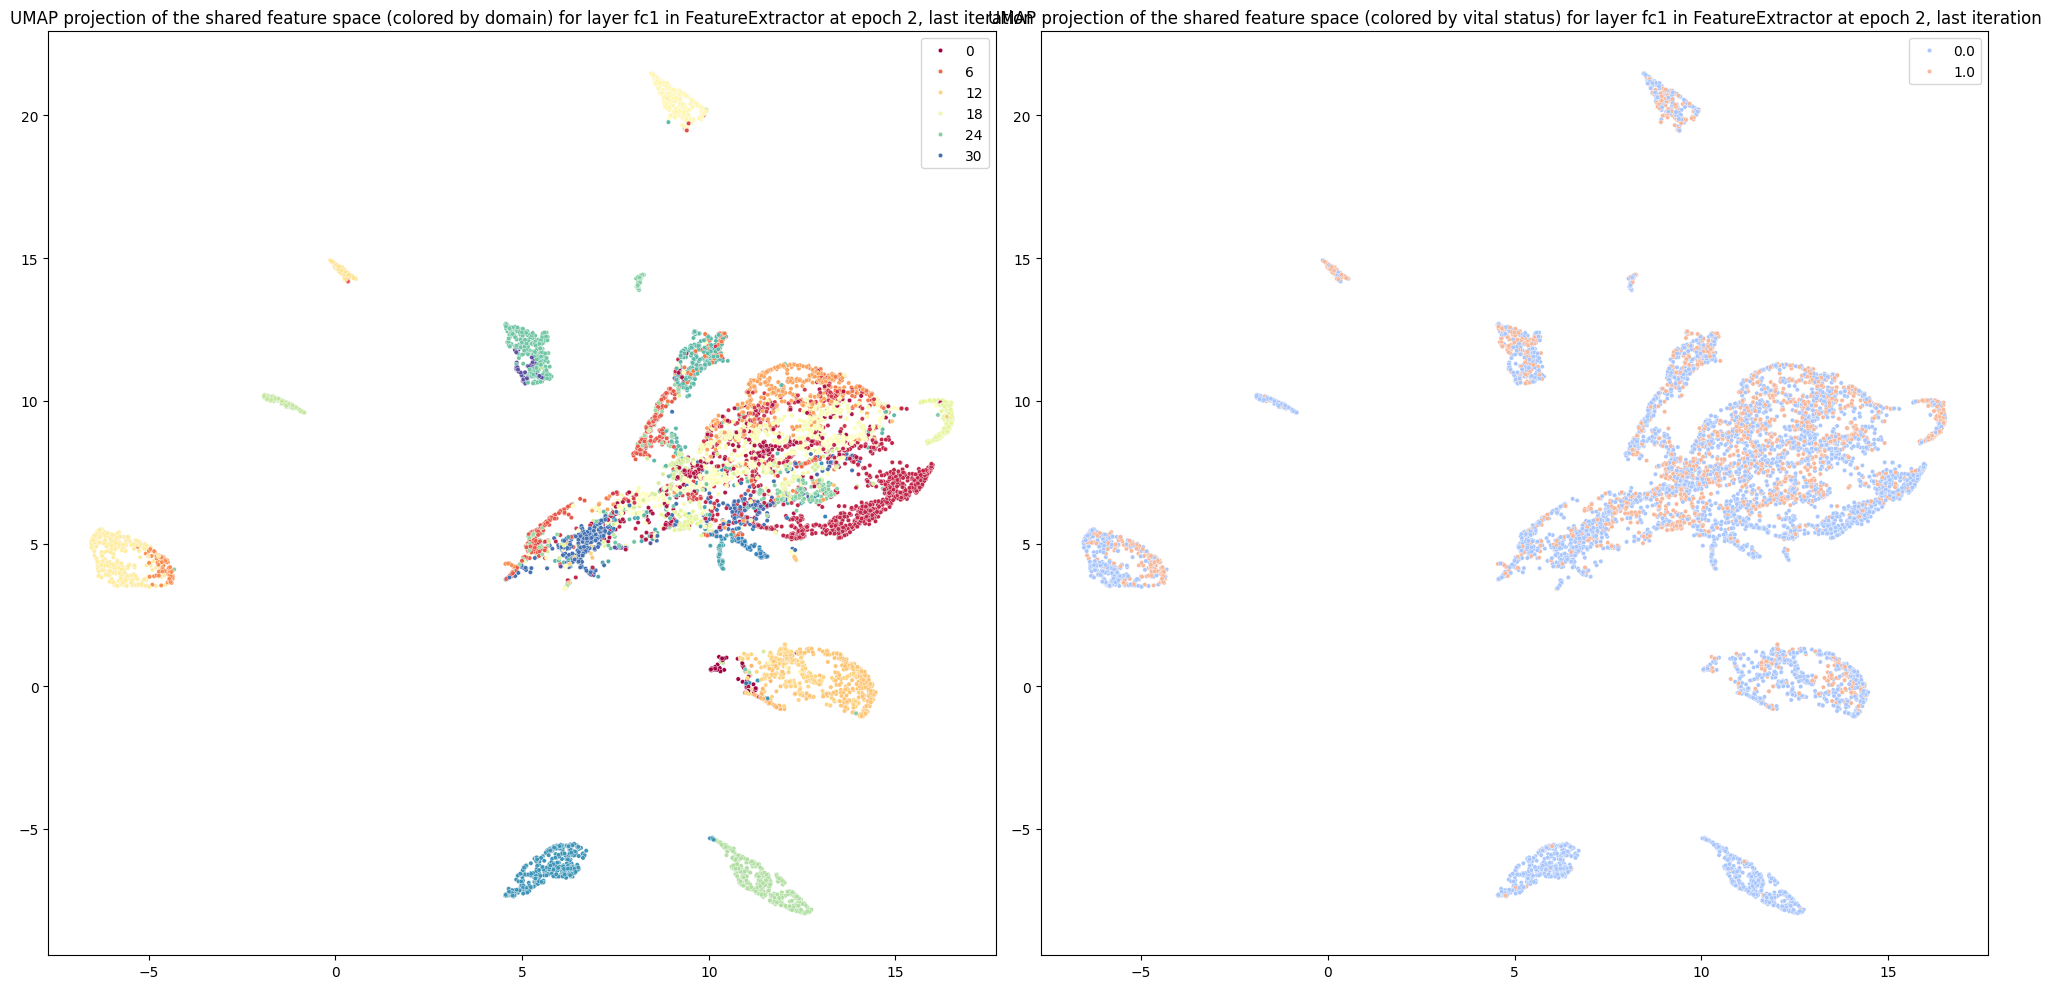

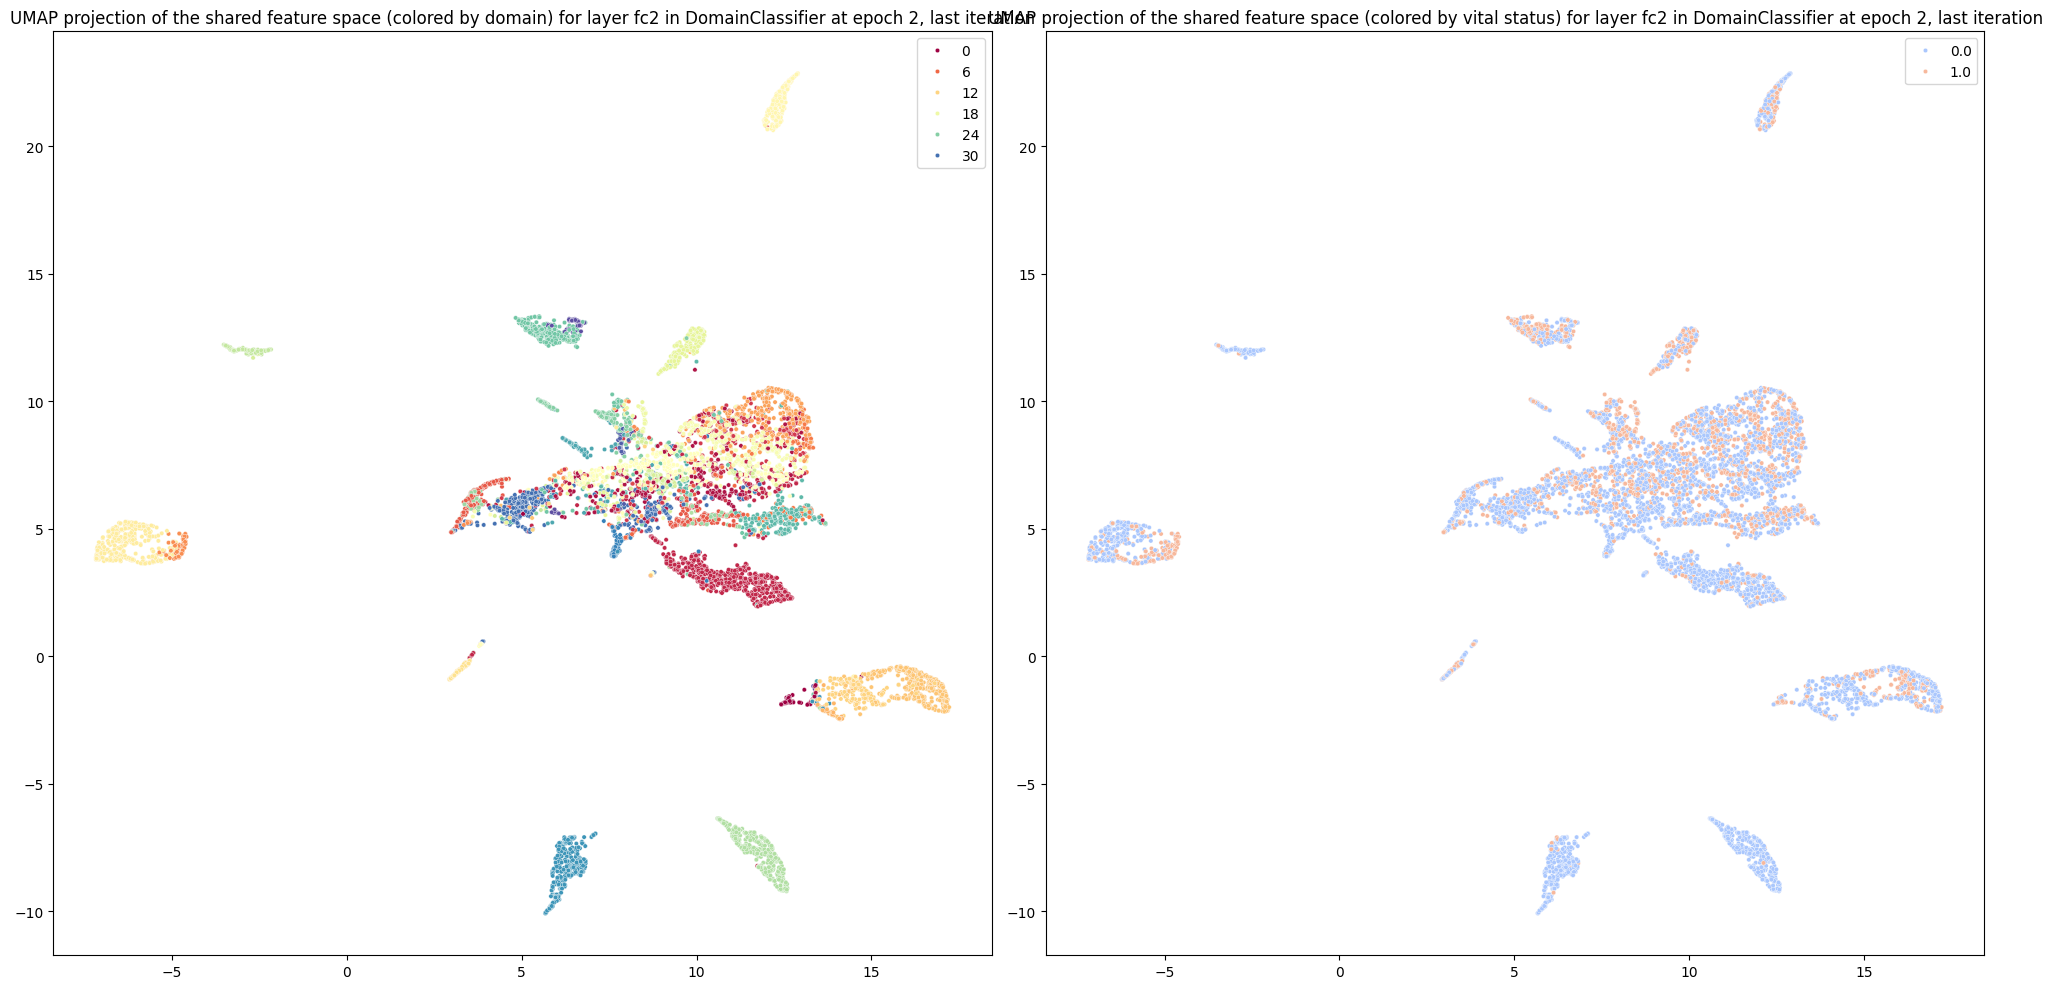

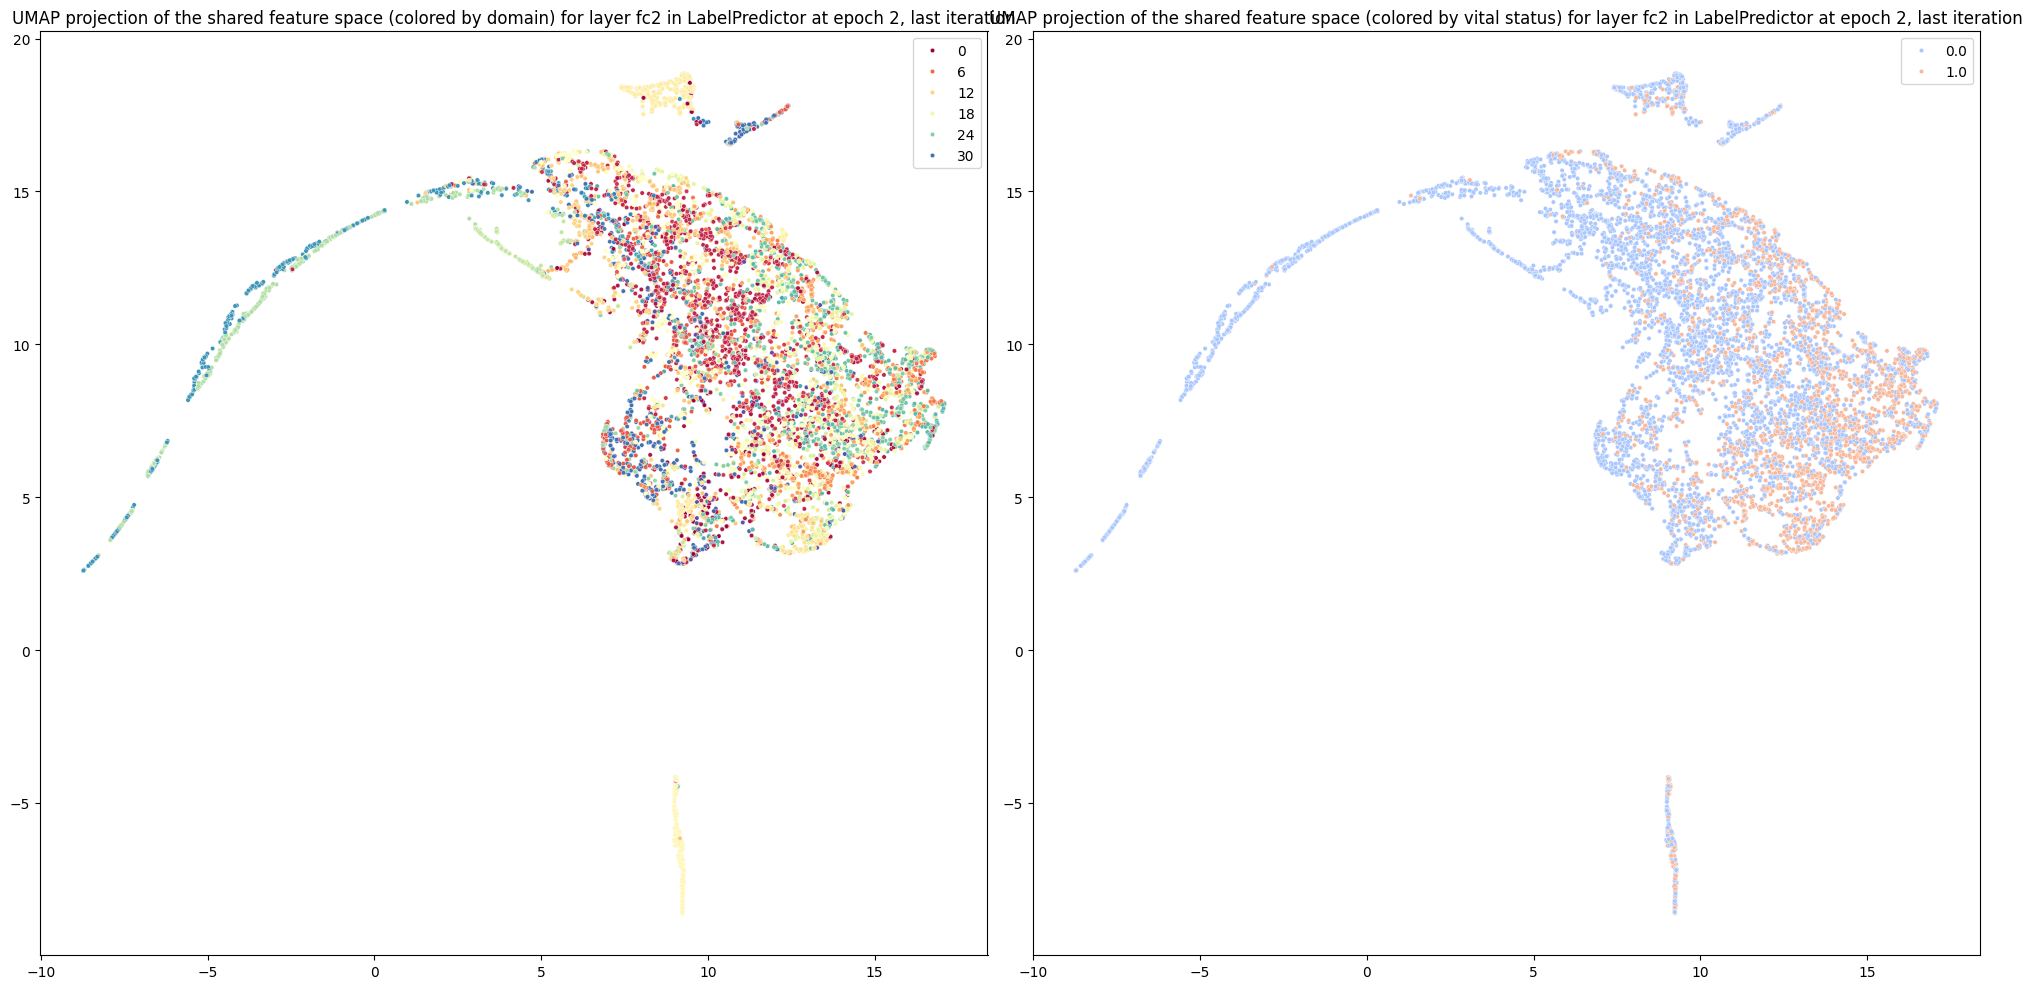

In [13]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import umap
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from torchsummary import summary  # Importar torchsummary para imprimir el resumen del modelo

# Configurar el dispositivo para GPU si está disponible, de lo contrario, usar CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%) de forma estratificada
X_train, X_test, Y_train, Y_test, panels_train, panels_test = train_test_split(
    X, Y, panels, test_size=0.2, stratify=Y, random_state=42
)

# Sobrescribir X y Y con los datos de entrenamiento
X = X_train
Y = Y_train
panels = panels_train


# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Codificar las etiquetas de dominio (paneles)
label_encoder_panel = LabelEncoder()
panels = label_encoder_panel.fit_transform(panels)

# Convertir los datos a tensores y moverlos al dispositivo
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)
panels_tensor = torch.tensor(panels, dtype=torch.long).to(device)

# Crear datasets y dataloaders
batch_size = 128
dataset = TensorDataset(X_tensor, Y_tensor, panels_tensor)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Definición del modelo DANN mejorado
class FeatureExtractor(nn.Module):
    def __init__(self, input_dim):
        super(FeatureExtractor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 5000)  # Capa única con 10,000 neuronas
        self.bn1 = nn.BatchNorm1d(5000)
        self.dropout1 = nn.Dropout(0.3)  # Dropout moderado

        # Aplicar inicialización He a la capa
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')

    def forward(self, x, lambda_=1.0):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        return x

class LabelPredictor(nn.Module):
    def __init__(self, input_dim):
        super(LabelPredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 5000)
        self.bn1 = nn.BatchNorm1d(5000)
        self.dropout1 = nn.Dropout(0.3)  # Dropout moderado
        self.fc2 = nn.Linear(5000, 5000)
        self.bn2 = nn.BatchNorm1d(5000)
        self.dropout2 = nn.Dropout(0.3)  # Dropout moderado
        self.fc3 = nn.Linear(5000, 1)

        # Aplicar inicialización He a las capas
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc3.weight, nonlinearity='leaky_relu')

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.leaky_relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc3(x))
        return x

class DomainClassifier(nn.Module):
    def __init__(self, input_dim, num_domains):
        super(DomainClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 5000)
        self.bn1 = nn.BatchNorm1d(5000)
        self.dropout1 = nn.Dropout(0.9)  # Dropout moderado
        self.fc2 = nn.Linear(5000, 5000)
        self.bn2 = nn.BatchNorm1d(5000)
        self.dropout2 = nn.Dropout(0.9)  # Dropout moderado
        self.fc3 = nn.Linear(5000, num_domains)

        # Aplicar inicialización He a las capas
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc3.weight, nonlinearity='leaky_relu')

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.leaky_relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

class DANN(nn.Module):
    def __init__(self, feature_dim, num_domains):
        super(DANN, self).__init__()
        self.feature_extractor = FeatureExtractor(feature_dim)
        self.label_predictor = LabelPredictor(5000)
        self.domain_classifier = DomainClassifier(5000, num_domains)

    def forward(self, x, lambda_=1.0):
        # Extracción de características
        features = self.feature_extractor(x)

        # Inversión de gradiente con lambda
        reverse_features = ReverseLayerF.apply(features, lambda_)

        # Predicción de etiquetas
        label_output = self.label_predictor(features)

        # Clasificación de dominio
        domain_output = self.domain_classifier(reverse_features)

        return label_output, domain_output, features

class ReverseLayerF(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, lambda_):
        ctx.lambda_ = lambda_  # Guardamos lambda para usarla en la retropropagación
        return x.view_as(x)  # Devolvemos las características sin cambios

    @staticmethod
    def backward(ctx, grad_output):
        # Invertimos los gradientes y los escalamos por lambda
        output = grad_output.neg() * ctx.lambda_
        return output, None  # Retornamos el gradiente invertido

# Función para listar las capas de un módulo
def list_module_layers(module, module_name):
    print(f"Capas disponibles en {module_name}:")
    for name, mod in module.named_children():
        print(f'Layer name: {name}, Module: {mod}')

# Función para extraer características de una capa específica de un módulo
def extract_layer_features(model, loader, module_name, layer_name, use_features=False):
    model.eval()
    features = []
    labels = []
    domains = []

    with torch.no_grad():
        for inputs, label, domain in loader:
            inputs, label, domain = inputs.to(device), label.to(device), domain.to(device)
            if use_features:
                x = model.feature_extractor(inputs)
            else:
                x = inputs
            module = getattr(model, module_name)
            for name, mod in module.named_children():
                x = mod(x)
                if name == layer_name:
                    break
            features.append(x.cpu().numpy())
            labels.append(label.cpu().numpy())
            domains.append(domain.cpu().numpy())

    features = np.concatenate(features, axis=0)
    labels = np.concatenate(labels, axis=0).flatten()
    domains = np.concatenate(domains, axis=0).flatten()
    return features, labels, domains

# Función para guardar características de una capa específica de un módulo en disco
def save_layer_features_to_disk(epoch_iter, model, loader, module_name, layer_name, use_features=False):
    features, labels, domains = extract_layer_features(model, loader, module_name, layer_name, use_features)

    # Crear un directorio para guardar las características si no existe
    save_dir = "/content/drive/MyDrive/PANCANCER FINAL"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Guardar las características en disco
    file_name = f"{save_dir}/{module_name}_{layer_name}_epoch{epoch_iter[0]}_iter{epoch_iter[1]}.pkl"
    with open(file_name, 'wb') as f:
        pickle.dump((features, labels, domains), f)

# Función para cargar características desde disco
def load_layer_features_from_disk(epoch, iteration, module_name, layer_name):
    file_name = f"/content/drive/MyDrive/PANCANCER FINAL/{module_name}_{layer_name}_epoch{epoch}_iter{iteration}.pkl"
    if os.path.exists(file_name):
        with open(file_name, 'rb') as f:
            features, labels, domains = pickle.load(f)
        return features, labels, domains
    else:
        print(f"No features found for epoch {epoch}, iteration {iteration}, module {module_name}, layer {layer_name}")
        return None, None, None

# Función para visualizar UMAP
def plot_umap(embedding, labels, domains, title_suffix=''):
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=domains, palette='Spectral', s=10)
    plt.title(f'UMAP projection of the shared feature space (colored by domain) {title_suffix}')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, palette='coolwarm', s=10)
    plt.title(f'UMAP projection of the shared feature space (colored by vital status) {title_suffix}')

    plt.tight_layout()
    torch.cuda.synchronize()
    plt.show()

# Función para visualizar UMAP de una capa específica en una época e iteración específica
def visualize_layer_umap(epoch, iteration, module_name, layer_name, title_suffix=''):
    features, labels, domains = load_layer_features_from_disk(epoch, iteration, module_name, layer_name)
    if features is not None:
        reducer = umap.UMAP(n_components=2)
        embedding = reducer.fit_transform(features)
        plot_umap(embedding, labels, domains, title_suffix)

# Parámetros
input_dim = X.shape[1]
num_domains = len(label_encoder_panel.classes_)
num_epochs = 10

# Crear el modelo
model = DANN(input_dim, num_domains).to(device)

# Imprimir el resumen de la arquitectura del modelo usando torchsummary
summary(model, input_size=(input_dim,))

# Después de llamar a summary, puedes ajustar el lambda_ durante el entrenamiento
lambda_ = 0.2 # Valor ajustado por el usuario

# Definir el optimizador AdamW
optimizer = optim.AdamW(
    model.parameters(),
    lr=0.01,  # Tasa de aprendizaje
    betas=(0.9, 0.99),  # Coeficientes beta
    eps=1e-8,  # Valor pequeño para estabilidad numérica
    weight_decay=0.01,  # Regularización L2
    amsgrad=False  # Si deseas usar la variante AMSGrad
)

# Definir las funciones de pérdida
criterion_label = nn.BCELoss().to(device)
criterion_domain = nn.CrossEntropyLoss().to(device)

# Listas para guardar las precisiones
label_accuracies = []
domain_accuracies = []


class ModelSaver:
    def __init__(self):
        self.models = []

    def save_model(self, model, iteration):
        # Hacer una copia del estado del modelo
        model_copy = {k: v.clone() for k, v in model.state_dict().items()}
        self.models.append((iteration, model_copy))

    def get_models(self):
        return self.models
# Crear instancia de ModelSaver
model_saver = ModelSaver()



# Entrenamiento y guardado de características
for epoch in range(num_epochs):
    model.train()
    correct_label = 0
    correct_domain = 0
    total = 0

    for i, (inputs, labels, domains) in enumerate(loader):
        inputs, labels, domains = inputs.to(device), labels.to(device), domains.to(device)

        # Forward pass: obtiene las predicciones para etiquetas y dominios
        label_preds, domain_preds, features = model(inputs, lambda_)  # El valor de lambda_ es proporcionado aquí

        # Cálculo de pérdidas
        loss_label = criterion_label(label_preds, labels)  # Pérdida de predicción de etiquetas (L_y)
        loss_domain = criterion_domain(domain_preds, domains)  # Pérdida de predicción de dominios (L_d)

        # Reseteo de gradientes acumulados
        optimizer.zero_grad()

        # Suma de las pérdidas de ambas tareas
        loss = loss_label #+ loss_domain

        # Retropropagación de gradientes (aquí es donde ocurren ambas retropropagaciones)
        loss.backward()

        # Clip gradients to prevent explosion
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        # Actualización de los parámetros del modelo
        optimizer.step()

        predicted_label = (label_preds > 0.5).float()
        correct_label += (predicted_label == labels).sum().item()

        _, predicted_domain = torch.max(domain_preds, 1)
        correct_domain += (predicted_domain == domains).sum().item()

        total += labels.size(0)

        # Guardar características solo para la última iteración dentro de cada época
        if i == len(loader) - 1:  # Solo para la última iteración
            save_layer_features_to_disk((epoch, i), model, loader, 'feature_extractor', 'fc1')
            save_layer_features_to_disk((epoch, i), model, loader, 'domain_classifier', 'fc2', use_features=True)
            save_layer_features_to_disk((epoch, i), model, loader, 'label_predictor', 'fc2', use_features=True)



            # Guardar el modelo después de cada iteración (en este caso la ulitima iteración)
            model_saver.save_model(model, (epoch, i))



    label_accuracy = correct_label / total
    domain_accuracy = correct_domain / total

    label_accuracies.append(label_accuracy)
    domain_accuracies.append(domain_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Label Accuracy: {label_accuracy:.4f}, Domain Accuracy: {domain_accuracy:.4f}')

# Visualización de UMAP de la última iteración de la segunda época (indexada como epoch 1)
visualize_layer_umap(epoch=1, iteration=len(loader) - 1, module_name='feature_extractor', layer_name='fc1', title_suffix='for layer fc1 in FeatureExtractor at epoch 2, last iteration')
visualize_layer_umap(epoch=1, iteration=len(loader) - 1, module_name='domain_classifier', layer_name='fc2', title_suffix='for layer fc2 in DomainClassifier at epoch 2, last iteration')
visualize_layer_umap(epoch=1, iteration=len(loader) - 1, module_name='label_predictor', layer_name='fc2', title_suffix='for layer fc2 in LabelPredictor at epoch 2, last iteration')


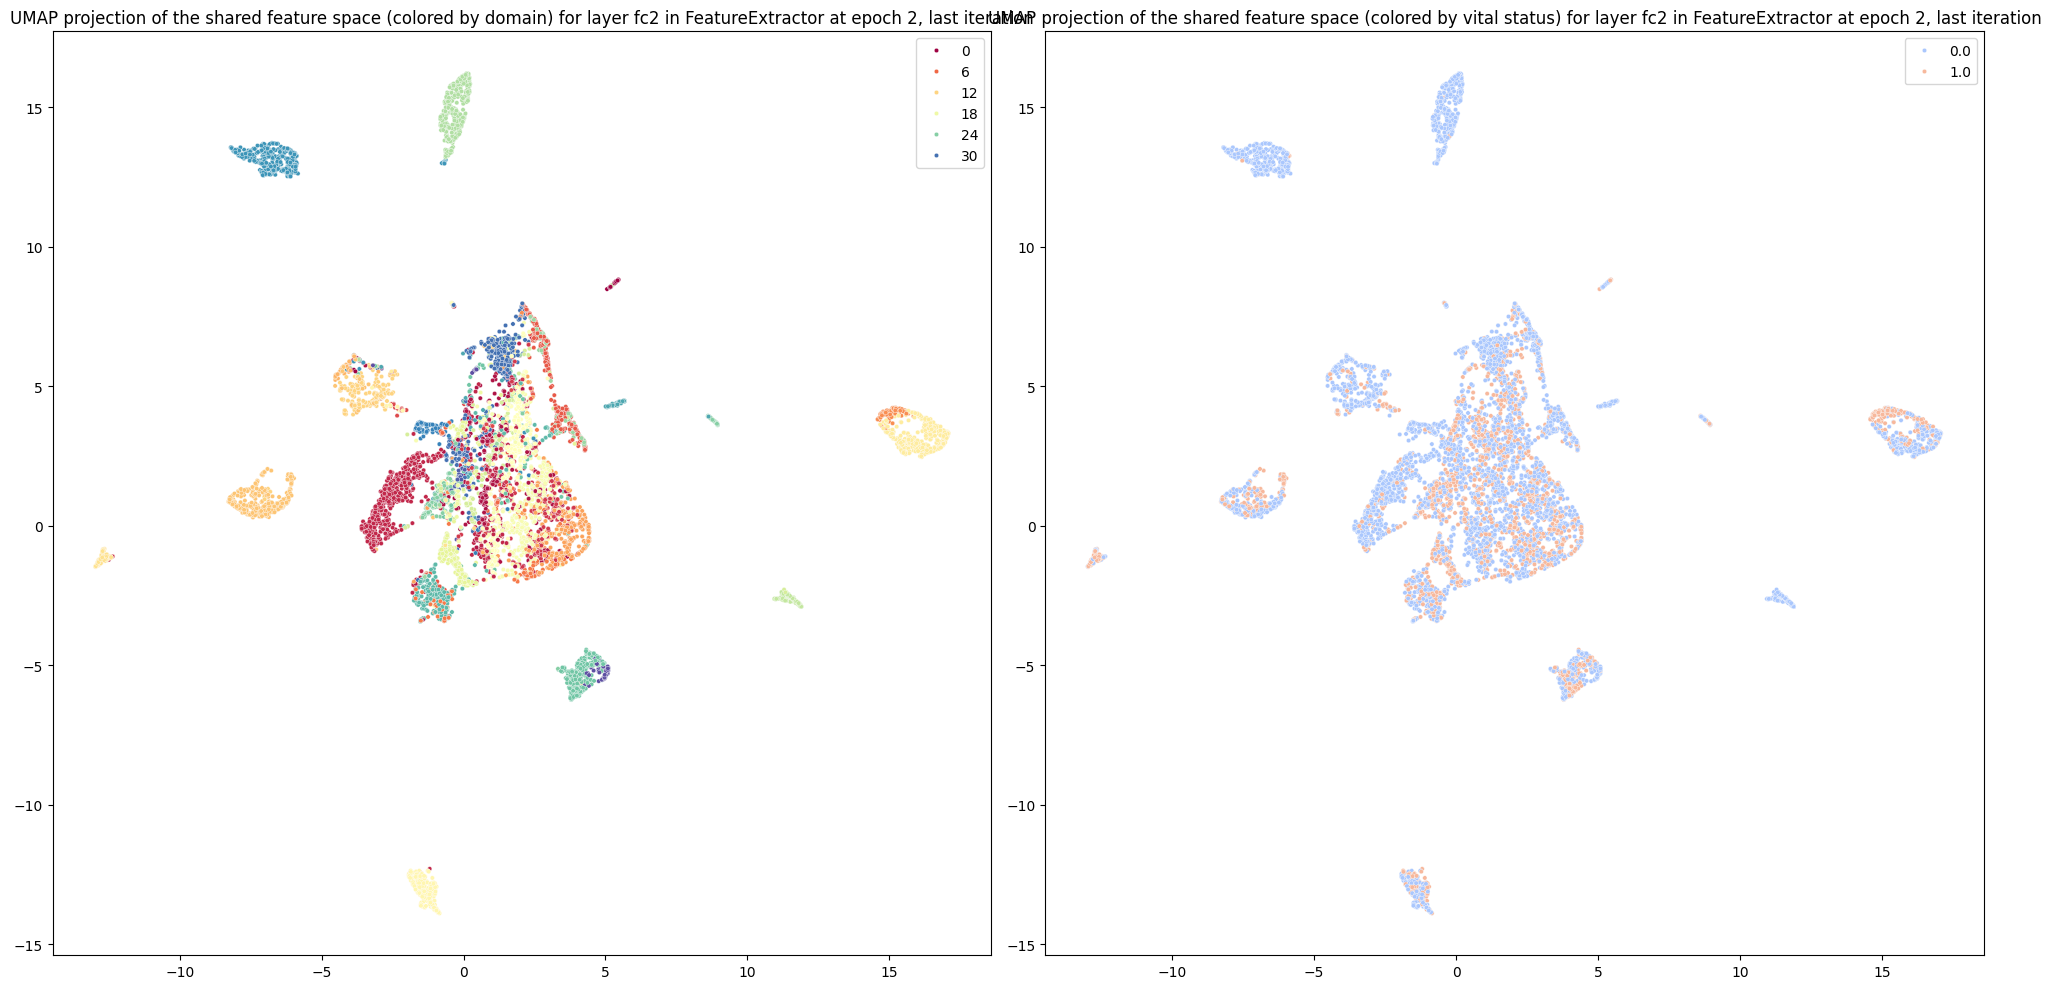

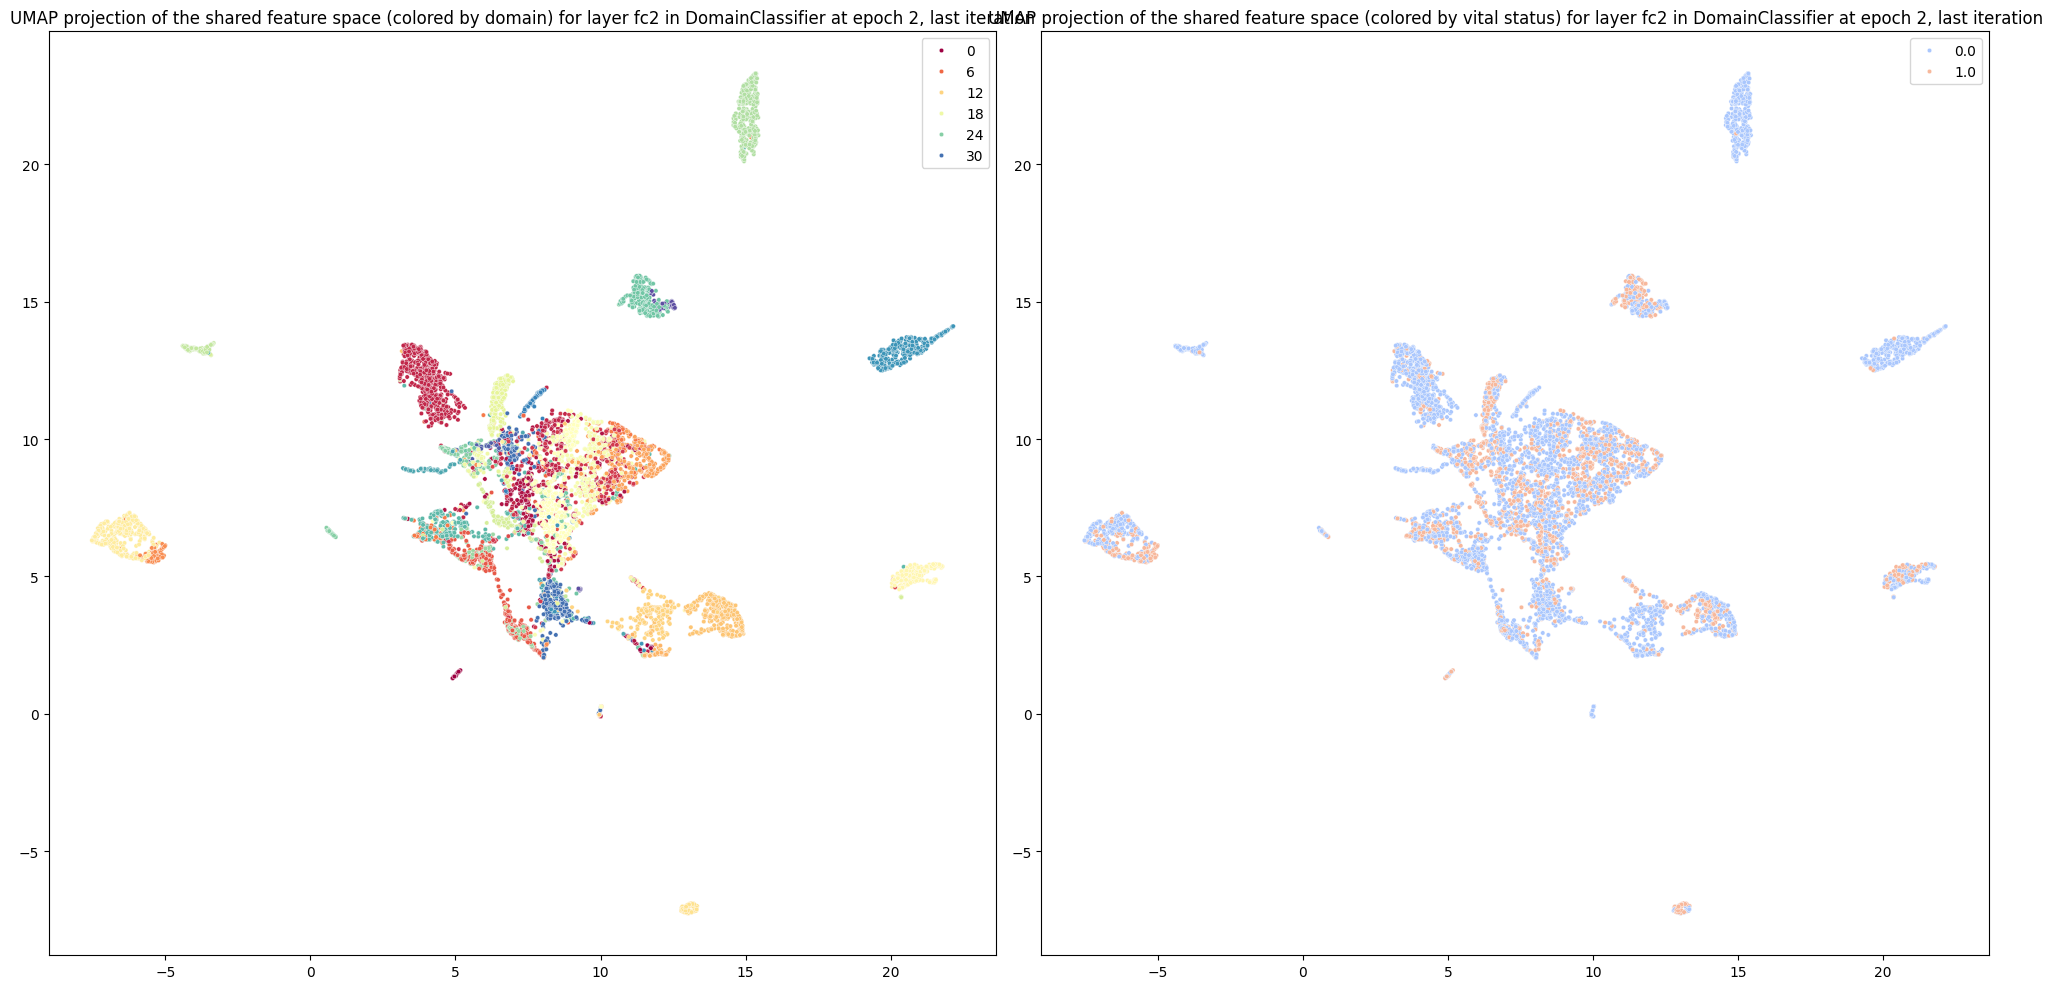

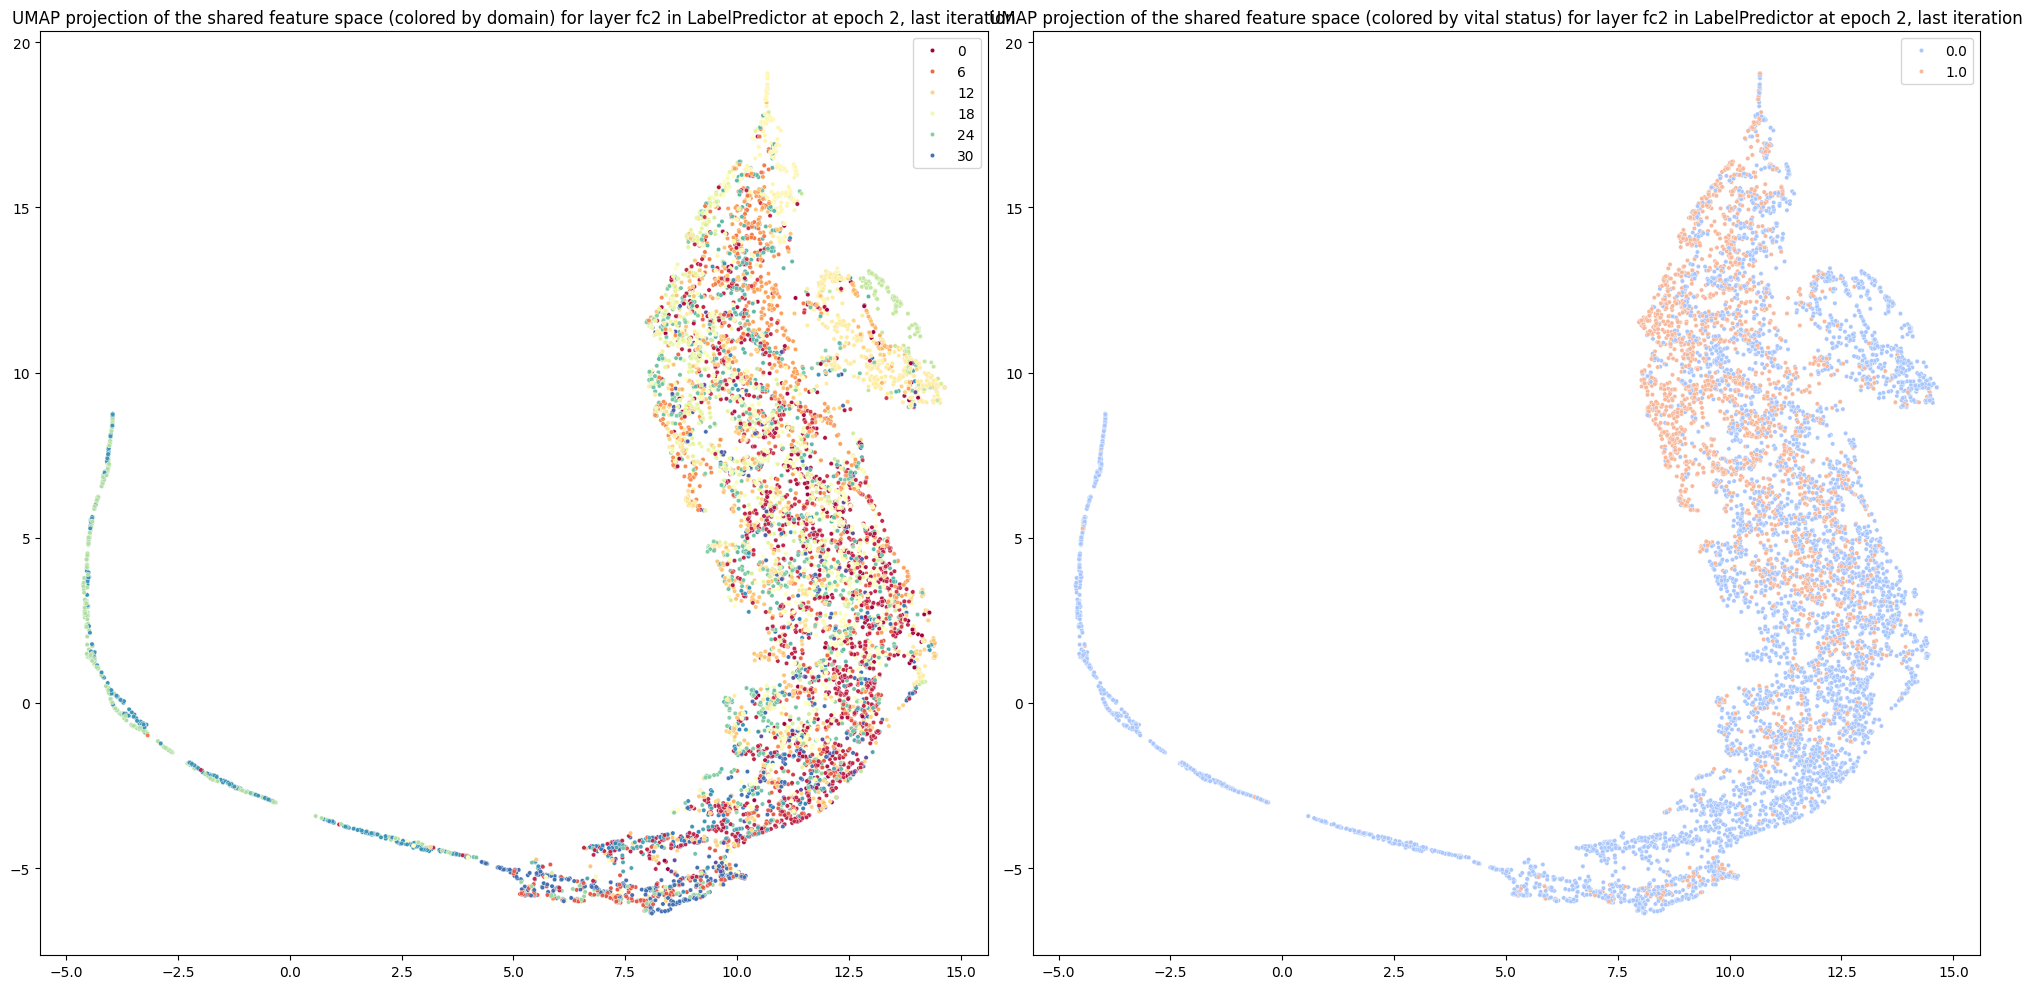

In [14]:
# Visualización de UMAP de la última iteración de la segunda época (indexada como epoch 1)
visualize_layer_umap(epoch=4, iteration=len(loader) - 1, module_name='feature_extractor', layer_name='fc1', title_suffix='for layer fc2 in FeatureExtractor at epoch 2, last iteration')
visualize_layer_umap(epoch=4, iteration=len(loader) - 1, module_name='domain_classifier', layer_name='fc2', title_suffix='for layer fc2 in DomainClassifier at epoch 2, last iteration')
visualize_layer_umap(epoch=4, iteration=len(loader) - 1, module_name='label_predictor', layer_name='fc2', title_suffix='for layer fc2 in LabelPredictor at epoch 2, last iteration')


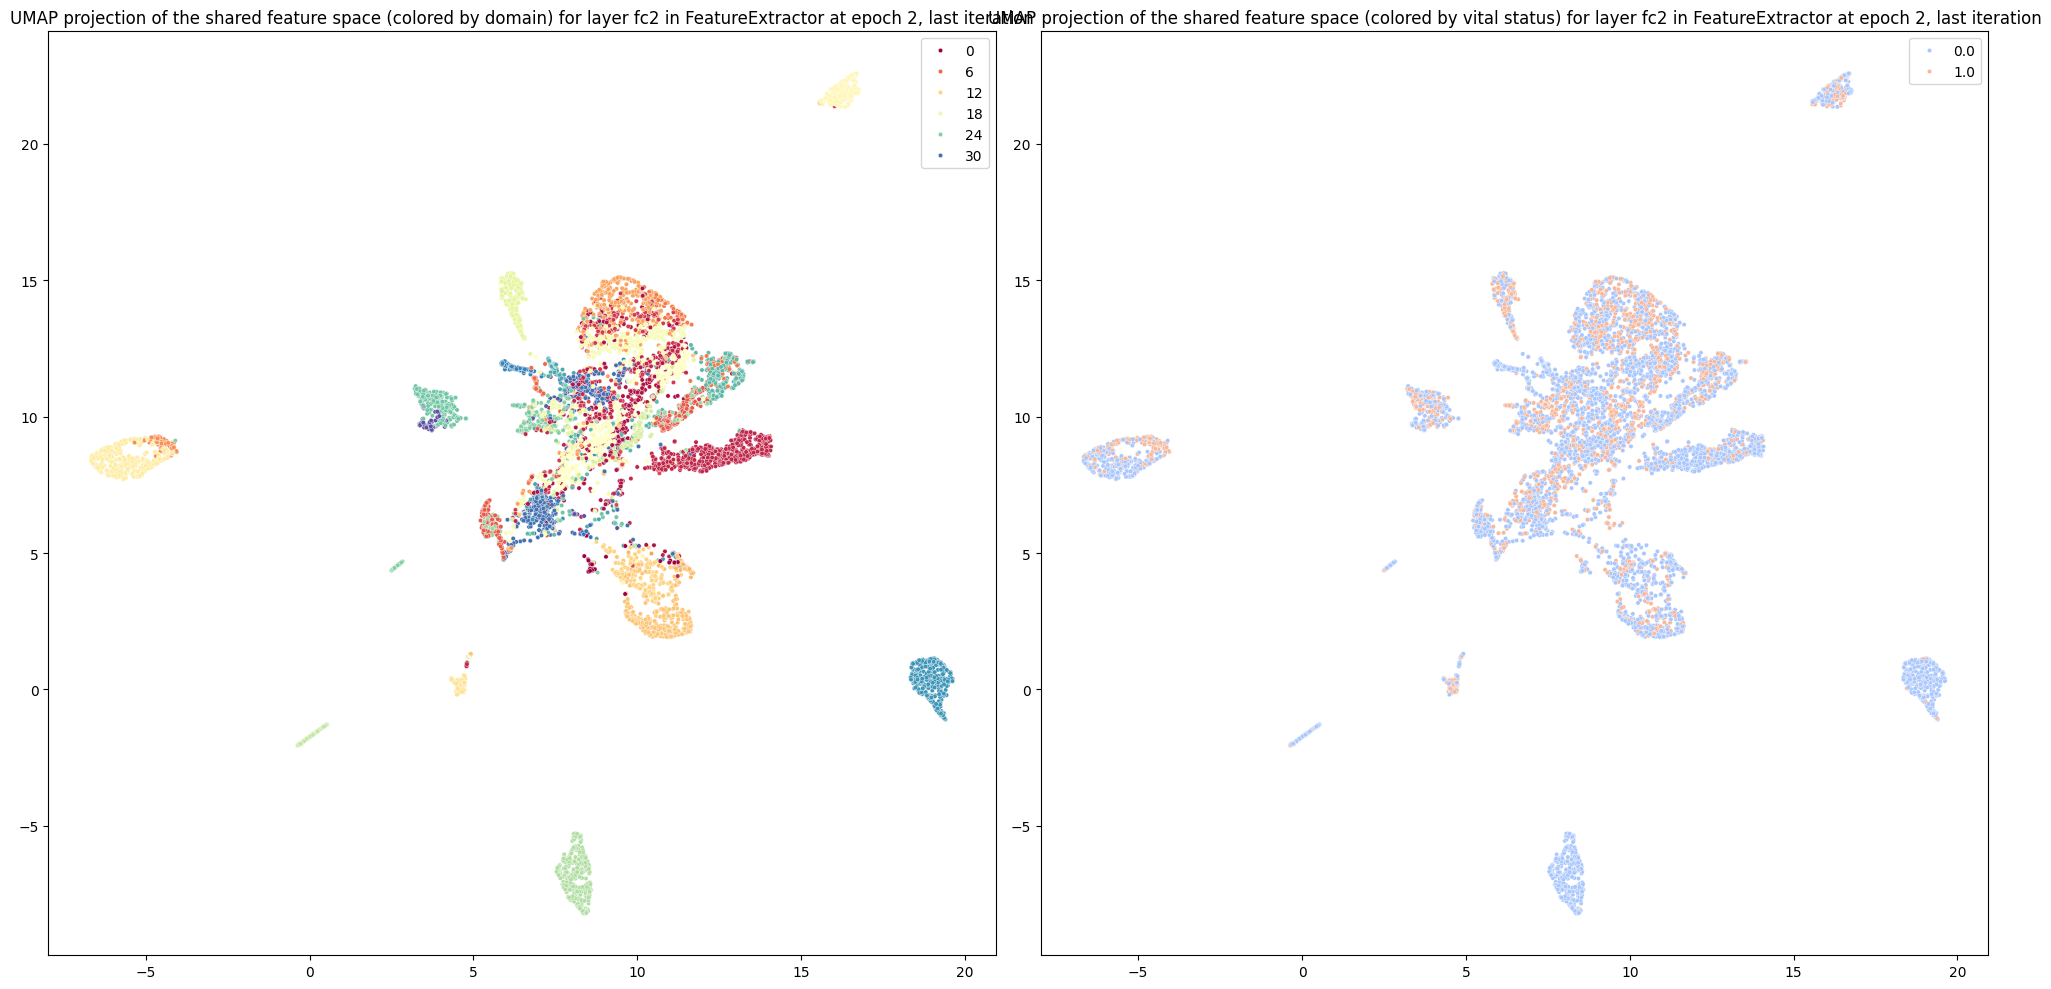

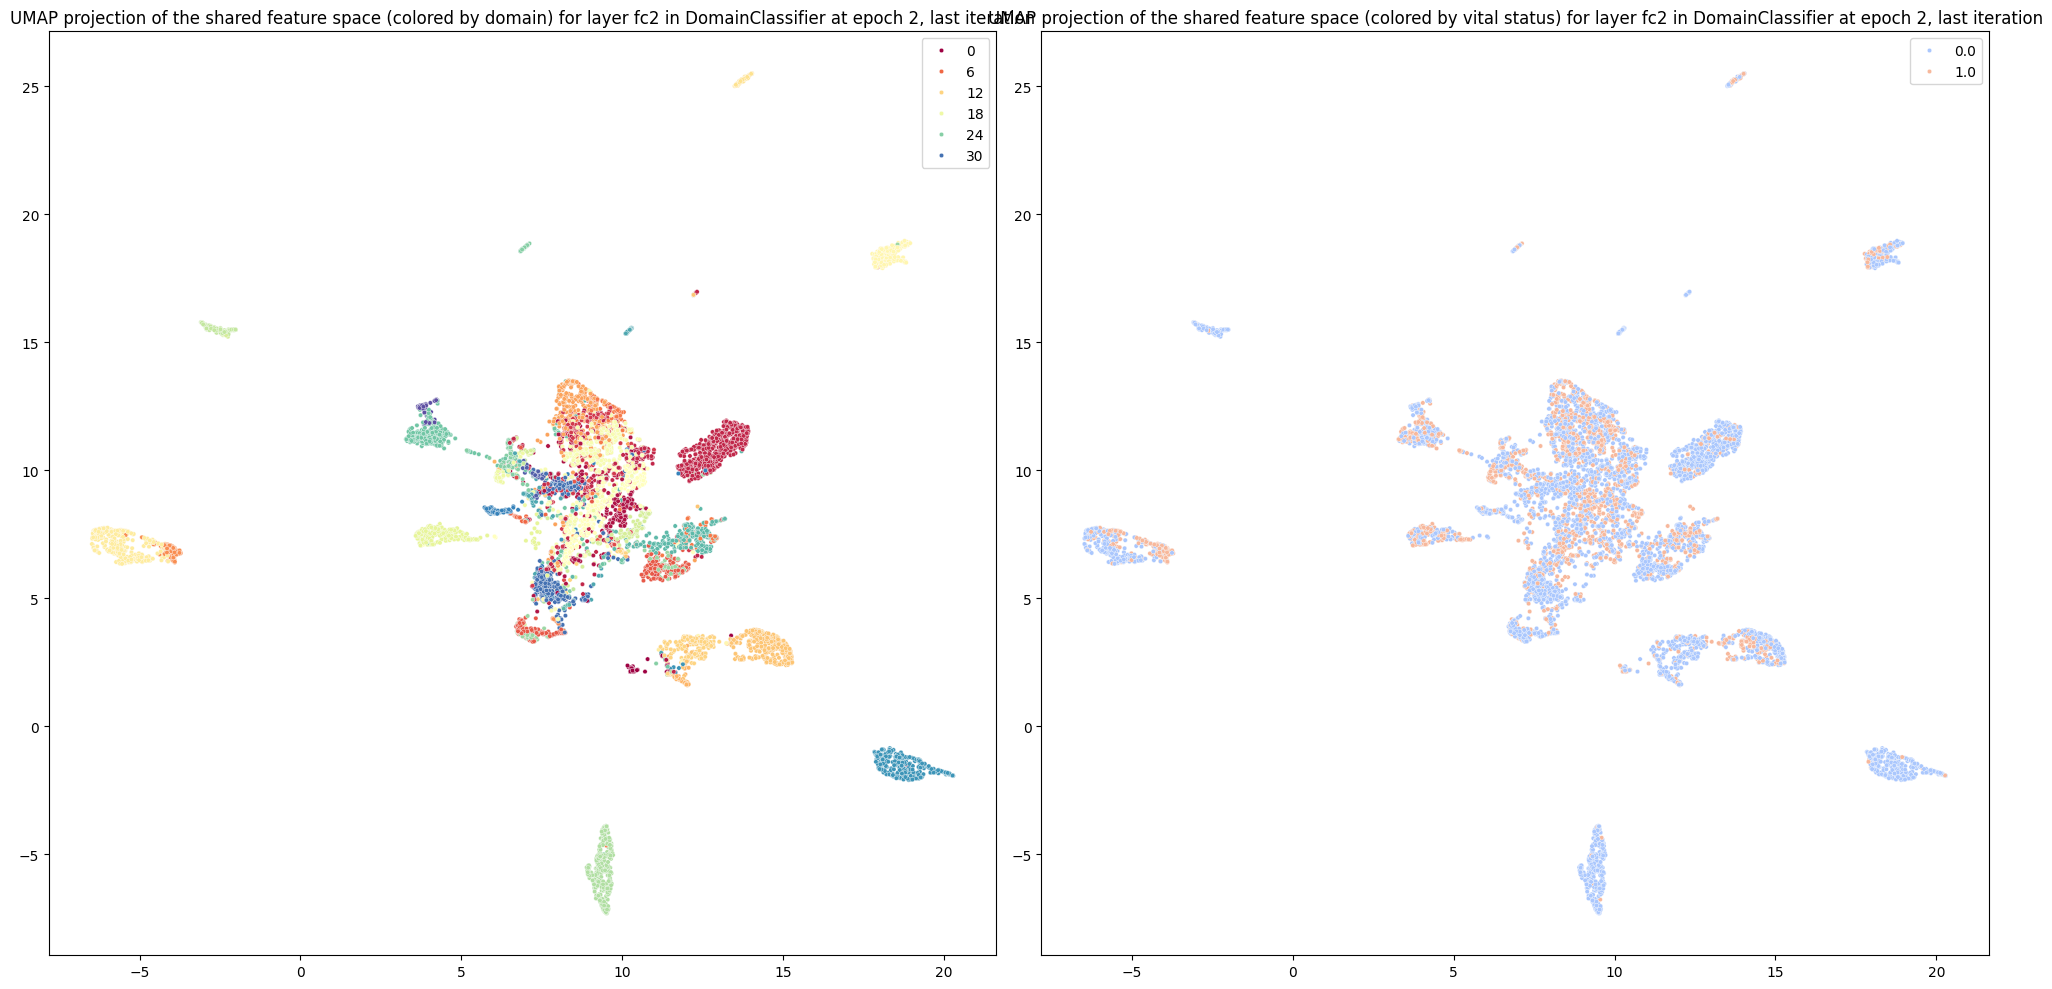

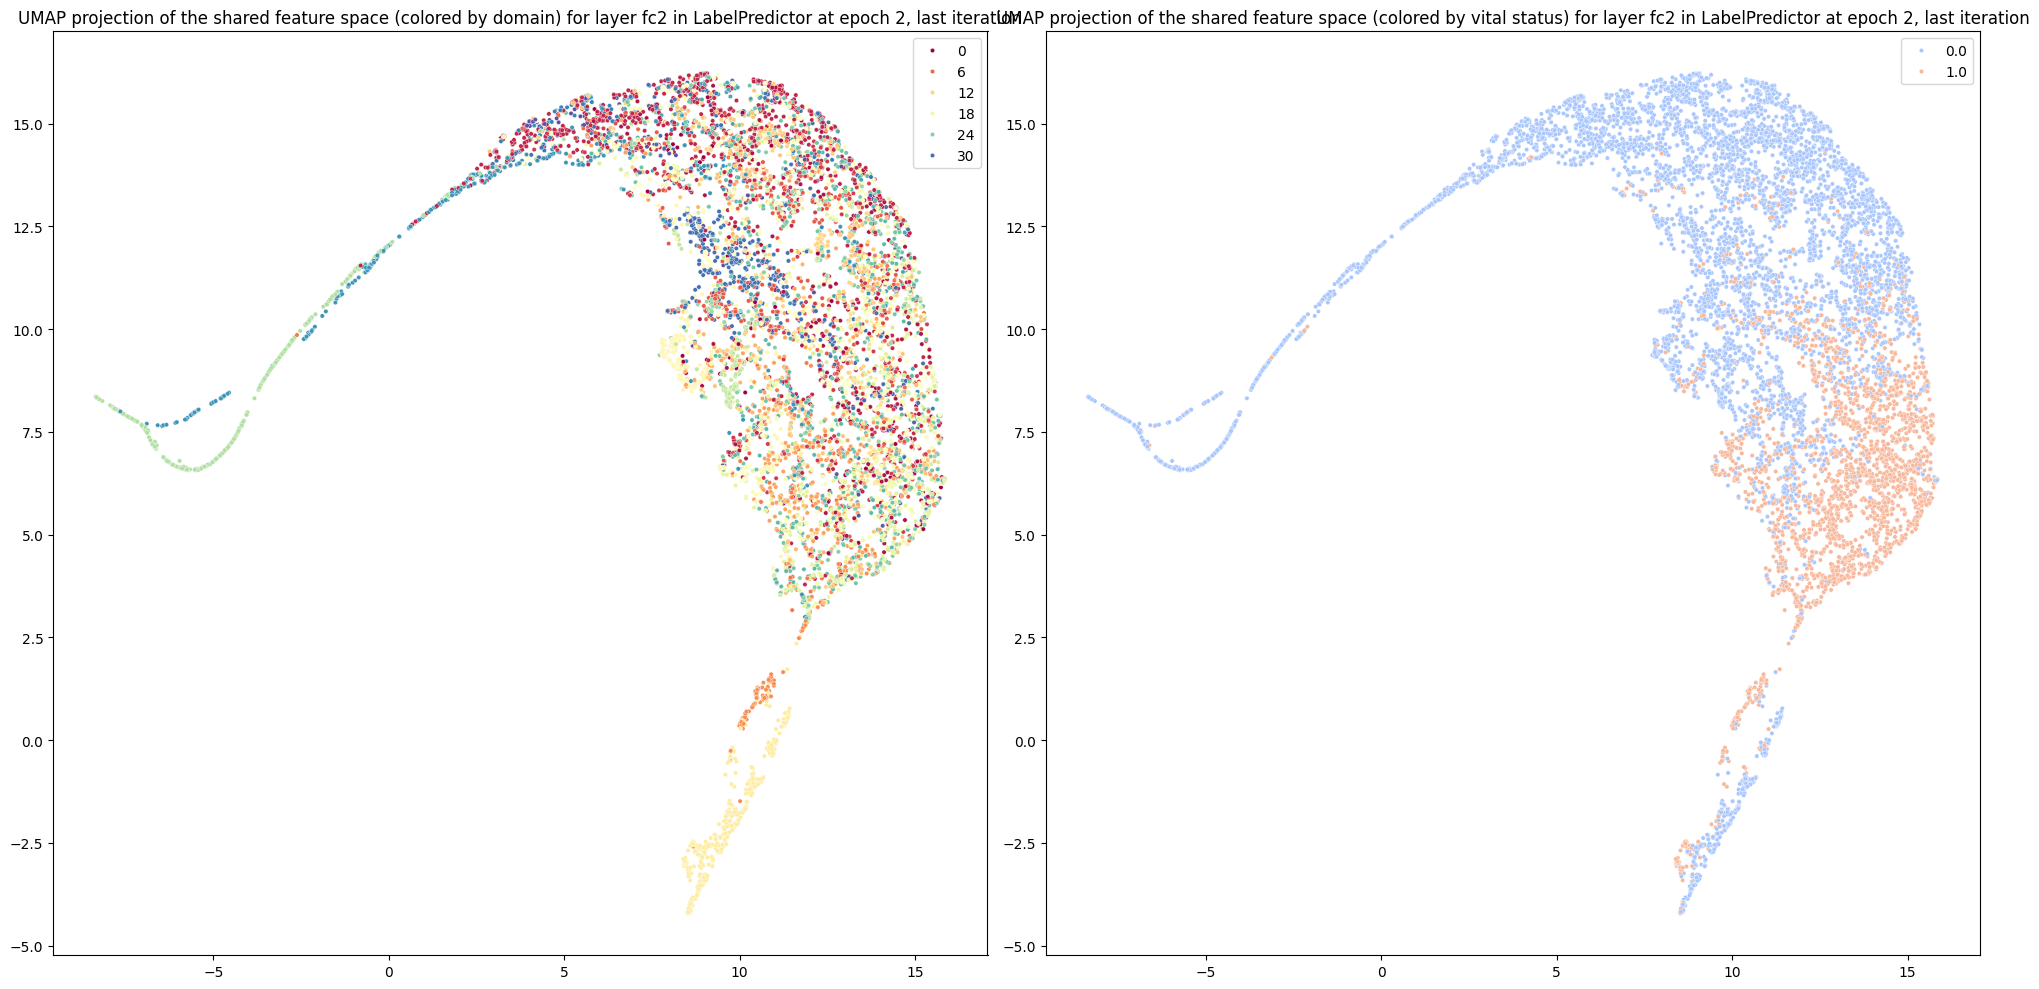

In [15]:
# Visualización de UMAP de la última iteración de la segunda época (indexada como epoch 1)
visualize_layer_umap(epoch=9, iteration=len(loader) - 1, module_name='feature_extractor', layer_name='fc1', title_suffix='for layer fc2 in FeatureExtractor at epoch 2, last iteration')
visualize_layer_umap(epoch=9, iteration=len(loader) - 1, module_name='domain_classifier', layer_name='fc2', title_suffix='for layer fc2 in DomainClassifier at epoch 2, last iteration')
visualize_layer_umap(epoch=9, iteration=len(loader) - 1, module_name='label_predictor', layer_name='fc2', title_suffix='for layer fc2 in LabelPredictor at epoch 2, last iteration')


In [16]:
# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 5 es epoch 4

# Obtener el modelo guardado al final de la época 5
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)


Modelo guardado al final de la época 10, iteración 65


<All keys matched successfully>

SHAP values for instance 9663: [[[-8.72064475e-09]
  [-3.19347988e-06]
  [ 3.55539326e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.33765424e-08]]]


Calculando valores SHAP:  94%|█████████▍| 9665/10286 [33:17<02:10,  4.75it/s]

SHAP values for instance 9664: [[[ 6.74949545e-08]
  [-1.06174840e-06]
  [-1.81095216e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.44296184e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9666/10286 [33:17<02:09,  4.79it/s]

SHAP values for instance 9665: [[[-2.58806643e-08]
  [-7.10975335e-06]
  [ 1.86402801e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.96383524e-08]]]


Calculando valores SHAP:  94%|█████████▍| 9667/10286 [33:17<02:08,  4.81it/s]

SHAP values for instance 9666: [[[ 2.86884382e-08]
  [-3.01418252e-06]
  [ 5.40863429e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.65459330e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9668/10286 [33:17<02:10,  4.75it/s]

SHAP values for instance 9667: [[[ 1.99745225e-08]
  [-1.00208328e-07]
  [ 4.90493678e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.12773134e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9669/10286 [33:17<02:09,  4.78it/s]

SHAP values for instance 9668: [[[-1.52144457e-08]
  [-1.53507341e-06]
  [ 1.96131812e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.51271798e-06]]]


Calculando valores SHAP:  94%|█████████▍| 9670/10286 [33:18<02:08,  4.80it/s]

SHAP values for instance 9669: [[[-3.92499414e-09]
  [-6.06242928e-07]
  [-3.50464624e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.45214220e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9671/10286 [33:18<02:07,  4.82it/s]

SHAP values for instance 9670: [[[ 5.17802917e-08]
  [-7.86296195e-06]
  [ 4.40222146e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.73245018e-08]]]


Calculando valores SHAP:  94%|█████████▍| 9672/10286 [33:18<02:06,  4.84it/s]

SHAP values for instance 9671: [[[ 5.05981308e-08]
  [-6.04591572e-06]
  [ 9.55166617e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.40497635e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9673/10286 [33:18<02:08,  4.77it/s]

SHAP values for instance 9672: [[[-6.51254841e-08]
  [ 6.90843746e-07]
  [-1.32922315e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.93152927e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9674/10286 [33:19<02:07,  4.81it/s]

SHAP values for instance 9673: [[[-3.93642787e-08]
  [-1.04299109e-06]
  [ 3.05977885e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.52530266e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9675/10286 [33:19<02:06,  4.84it/s]

SHAP values for instance 9674: [[[ 2.69789647e-08]
  [-4.06313377e-05]
  [ 8.92616424e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.01123323e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9676/10286 [33:19<02:05,  4.85it/s]

SHAP values for instance 9675: [[[-5.48597127e-08]
  [-1.70345095e-07]
  [ 3.49488629e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.38988526e-08]]]


Calculando valores SHAP:  94%|█████████▍| 9677/10286 [33:19<02:05,  4.87it/s]

SHAP values for instance 9676: [[[ 3.03394241e-08]
  [-3.59855513e-06]
  [ 2.19525614e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.33151274e-08]]]


Calculando valores SHAP:  94%|█████████▍| 9678/10286 [33:19<02:04,  4.87it/s]

SHAP values for instance 9677: [[[-2.16232228e-08]
  [-7.81466978e-07]
  [ 1.10274579e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.96779830e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9679/10286 [33:20<02:04,  4.86it/s]

SHAP values for instance 9678: [[[ 3.20175235e-08]
  [-1.05206024e-06]
  [ 2.57070091e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.89443342e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9680/10286 [33:20<02:04,  4.86it/s]

SHAP values for instance 9679: [[[-4.90769212e-08]
  [-3.22345320e-05]
  [ 1.30137733e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.79797469e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9681/10286 [33:20<02:05,  4.82it/s]

SHAP values for instance 9680: [[[ 1.69916138e-08]
  [-2.04282548e-05]
  [ 4.99744344e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.91392670e-08]]]


Calculando valores SHAP:  94%|█████████▍| 9682/10286 [33:20<02:06,  4.77it/s]

SHAP values for instance 9681: [[[ 3.11004103e-09]
  [-8.36572585e-07]
  [ 3.00457472e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.62467590e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9683/10286 [33:20<02:05,  4.81it/s]

SHAP values for instance 9682: [[[ 1.91133916e-08]
  [-7.15552066e-08]
  [-1.96644715e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.02763716e-08]]]


Calculando valores SHAP:  94%|█████████▍| 9684/10286 [33:21<02:04,  4.83it/s]

SHAP values for instance 9683: [[[ 2.54979551e-08]
  [-1.31431706e-06]
  [ 1.59219766e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.55331064e-08]]]


Calculando valores SHAP:  94%|█████████▍| 9685/10286 [33:21<02:05,  4.80it/s]

SHAP values for instance 9684: [[[ 1.50906046e-09]
  [-3.23890814e-08]
  [ 5.74758021e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.51008950e-09]]]


Calculando valores SHAP:  94%|█████████▍| 9686/10286 [33:21<02:04,  4.82it/s]

SHAP values for instance 9685: [[[-8.91947846e-08]
  [-2.95769561e-07]
  [ 1.87106685e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.33513796e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9687/10286 [33:21<02:04,  4.81it/s]

SHAP values for instance 9686: [[[ 4.63591008e-08]
  [-2.76167368e-06]
  [ 3.98617326e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.01744161e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9688/10286 [33:21<02:03,  4.83it/s]

SHAP values for instance 9687: [[[-6.09356288e-08]
  [-7.19607838e-07]
  [ 1.38968652e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.27679308e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9689/10286 [33:22<02:02,  4.85it/s]

SHAP values for instance 9688: [[[ 1.54290908e-09]
  [-1.33389272e-06]
  [ 2.05491307e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.01897844e-09]]]


Calculando valores SHAP:  94%|█████████▍| 9690/10286 [33:22<02:02,  4.87it/s]

SHAP values for instance 9689: [[[-9.60486333e-08]
  [-1.08690068e-06]
  [ 4.11951274e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.51335116e-08]]]


Calculando valores SHAP:  94%|█████████▍| 9691/10286 [33:22<02:02,  4.88it/s]

SHAP values for instance 9690: [[[ 3.99328645e-08]
  [-2.26560891e-06]
  [ 2.70517653e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.79253661e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9692/10286 [33:22<02:01,  4.88it/s]

SHAP values for instance 9691: [[[ 2.05624105e-08]
  [-1.58968976e-06]
  [ 1.13960388e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.12877488e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9693/10286 [33:22<02:01,  4.87it/s]

SHAP values for instance 9692: [[[ 2.17105967e-09]
  [-4.61350828e-08]
  [ 7.75894879e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.18745860e-08]]]


Calculando valores SHAP:  94%|█████████▍| 9694/10286 [33:23<02:01,  4.86it/s]

SHAP values for instance 9693: [[[ 2.57676087e-08]
  [-2.07828277e-06]
  [ 1.03075216e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.95020467e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9695/10286 [33:23<02:02,  4.81it/s]

SHAP values for instance 9694: [[[ 4.11425519e-10]
  [-3.61629660e-06]
  [ 6.95051269e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.41338250e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9696/10286 [33:23<02:03,  4.79it/s]

SHAP values for instance 9695: [[[-2.04697701e-08]
  [-1.47657269e-06]
  [-9.18800831e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.09474037e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9697/10286 [33:23<02:02,  4.79it/s]

SHAP values for instance 9696: [[[ 8.52025839e-09]
  [-1.07585564e-07]
  [ 2.71455842e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.32613461e-08]]]


Calculando valores SHAP:  94%|█████████▍| 9698/10286 [33:23<02:02,  4.79it/s]

SHAP values for instance 9697: [[[ 7.90969880e-09]
  [-2.15393804e-05]
  [ 2.78848213e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.65714914e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9699/10286 [33:24<02:02,  4.79it/s]

SHAP values for instance 9698: [[[ 4.30999041e-09]
  [-1.72275537e-06]
  [ 2.75575716e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.07675643e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9700/10286 [33:24<02:01,  4.81it/s]

SHAP values for instance 9699: [[[-2.86159029e-08]
  [-8.58443116e-07]
  [ 3.48870019e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.97506318e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9701/10286 [33:24<02:01,  4.83it/s]

SHAP values for instance 9700: [[[ 4.98383925e-08]
  [-5.96442715e-07]
  [ 4.16144608e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.27861772e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9702/10286 [33:24<02:00,  4.83it/s]

SHAP values for instance 9701: [[[-6.00268598e-08]
  [-5.31484156e-06]
  [ 1.94979331e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.33702126e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9704/10286 [33:25<02:00,  4.84it/s]

SHAP values for instance 9702: [[[ 5.95808889e-09]
  [-1.29746166e-06]
  [ 1.61982691e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.24519868e-06]]]
SHAP values for instance 9703: [[[-1.20796487e-08]
  [-1.52215269e-06]
  [ 1.55805415e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.67035806e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9705/10286 [33:25<01:59,  4.87it/s]

SHAP values for instance 9704: [[[ 1.18330967e-08]
  [-3.26382770e-07]
  [ 4.88322704e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.16815678e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9706/10286 [33:25<01:58,  4.89it/s]

SHAP values for instance 9705: [[[ 6.99029717e-08]
  [-1.51094585e-06]
  [ 3.07391434e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.16485843e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9707/10286 [33:25<01:59,  4.85it/s]

SHAP values for instance 9706: [[[ 2.06563468e-08]
  [-3.41091618e-07]
  [ 7.95234202e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.96927366e-08]]]


Calculando valores SHAP:  94%|█████████▍| 9708/10286 [33:26<01:58,  4.86it/s]

SHAP values for instance 9707: [[[-1.25760696e-09]
  [-1.87419218e-07]
  [ 2.75335308e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.16752517e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9709/10286 [33:26<01:58,  4.86it/s]

SHAP values for instance 9708: [[[ 2.02156047e-08]
  [-1.40969731e-06]
  [ 1.44670631e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.33450648e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9710/10286 [33:26<01:58,  4.85it/s]

SHAP values for instance 9709: [[[-2.97113543e-08]
  [-5.26754932e-06]
  [ 2.73654169e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.53646259e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9711/10286 [33:26<01:58,  4.87it/s]

SHAP values for instance 9710: [[[ 3.44020449e-08]
  [-1.42983707e-06]
  [ 2.19320402e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.37839767e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9712/10286 [33:26<01:57,  4.88it/s]

SHAP values for instance 9711: [[[ 4.90496206e-09]
  [-3.11382937e-07]
  [ 6.12571485e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.59952361e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9713/10286 [33:27<01:58,  4.83it/s]

SHAP values for instance 9712: [[[ 2.87946097e-08]
  [-8.16051166e-06]
  [ 1.99345229e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.14682369e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9714/10286 [33:27<01:58,  4.84it/s]

SHAP values for instance 9713: [[[ 3.02579463e-08]
  [-2.19985943e-06]
  [ 8.97517118e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.05088617e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9715/10286 [33:27<01:57,  4.86it/s]

SHAP values for instance 9714: [[[ 3.75582651e-08]
  [-4.19354436e-07]
  [ 2.03754405e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.42418781e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9716/10286 [33:27<01:57,  4.86it/s]

SHAP values for instance 9715: [[[-2.27552119e-08]
  [-8.62242817e-07]
  [ 4.13360480e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22526697e-07]]]


Calculando valores SHAP:  94%|█████████▍| 9717/10286 [33:27<01:56,  4.86it/s]

SHAP values for instance 9716: [[[ 1.62067998e-08]
  [-7.73613159e-07]
  [ 1.86183996e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.15039422e-08]]]


Calculando valores SHAP:  94%|█████████▍| 9719/10286 [33:28<01:55,  4.90it/s]

SHAP values for instance 9717: [[[-3.18514980e-08]
  [-4.54287244e-07]
  [-1.51055635e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.52483137e-07]]]
SHAP values for instance 9718: [[[-9.40741935e-09]
  [-3.81473087e-07]
  [ 1.01736744e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.68906734e-08]]]


Calculando valores SHAP:  94%|█████████▍| 9720/10286 [33:28<01:56,  4.85it/s]

SHAP values for instance 9719: [[[ 2.01284972e-08]
  [-1.72948137e-07]
  [ 4.53947638e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.09265939e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9721/10286 [33:28<01:55,  4.87it/s]

SHAP values for instance 9720: [[[-9.09893943e-08]
  [-8.98904573e-07]
  [ 4.01378238e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.32173939e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9722/10286 [33:28<01:56,  4.84it/s]

SHAP values for instance 9721: [[[-1.69482606e-07]
  [-1.35852661e-07]
  [ 8.01834108e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.41105794e-08]]]


Calculando valores SHAP:  95%|█████████▍| 9723/10286 [33:29<01:56,  4.85it/s]

SHAP values for instance 9722: [[[-5.77906466e-09]
  [-3.00885786e-07]
  [ 2.42762849e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.99840702e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9724/10286 [33:29<01:55,  4.86it/s]

SHAP values for instance 9723: [[[ 1.56854914e-08]
  [-2.52612704e-06]
  [ 1.10942986e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.39400585e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9725/10286 [33:29<01:55,  4.86it/s]

SHAP values for instance 9724: [[[ 7.19110241e-09]
  [-5.15329234e-07]
  [ 8.38419114e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.29144674e-08]]]


Calculando valores SHAP:  95%|█████████▍| 9726/10286 [33:29<01:55,  4.86it/s]

SHAP values for instance 9725: [[[ 1.26771197e-08]
  [-2.61762841e-08]
  [ 3.36904671e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.72941255e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9727/10286 [33:29<01:56,  4.81it/s]

SHAP values for instance 9726: [[[ 9.03849765e-09]
  [-7.72697161e-06]
  [ 1.03372317e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.52053902e-08]]]


Calculando valores SHAP:  95%|█████████▍| 9728/10286 [33:30<01:57,  4.76it/s]

SHAP values for instance 9727: [[[ 3.29386474e-09]
  [-2.45133496e-07]
  [ 4.29880431e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.99529978e-08]]]


Calculando valores SHAP:  95%|█████████▍| 9729/10286 [33:30<01:56,  4.79it/s]

SHAP values for instance 9728: [[[ 2.28308248e-09]
  [-1.01368331e-06]
  [ 1.45269912e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.50829265e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9730/10286 [33:30<01:55,  4.81it/s]

SHAP values for instance 9729: [[[ 1.26520155e-08]
  [-1.21518508e-07]
  [ 1.13728067e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.80527676e-08]]]


Calculando valores SHAP:  95%|█████████▍| 9731/10286 [33:30<01:54,  4.85it/s]

SHAP values for instance 9730: [[[ 4.51344048e-08]
  [-7.53641878e-06]
  [ 1.35175356e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.54802792e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9732/10286 [33:30<01:53,  4.86it/s]

SHAP values for instance 9731: [[[ 6.35551762e-08]
  [ 8.79016327e-08]
  [ 1.17373065e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.18301385e-08]]]


Calculando valores SHAP:  95%|█████████▍| 9733/10286 [33:31<01:55,  4.78it/s]

SHAP values for instance 9732: [[[ 4.07553217e-08]
  [-5.55374816e-07]
  [ 1.54661706e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.26536388e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9734/10286 [33:31<01:54,  4.81it/s]

SHAP values for instance 9733: [[[ 1.12745344e-08]
  [-1.72352034e-06]
  [ 3.24018870e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.35860288e-08]]]


Calculando valores SHAP:  95%|█████████▍| 9735/10286 [33:31<01:56,  4.73it/s]

SHAP values for instance 9734: [[[-7.00883782e-08]
  [-1.83853241e-06]
  [-4.04623071e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58463773e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9736/10286 [33:31<01:55,  4.76it/s]

SHAP values for instance 9735: [[[ 4.54616230e-08]
  [-2.38572291e-06]
  [ 1.31118416e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.05760161e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9737/10286 [33:32<01:55,  4.76it/s]

SHAP values for instance 9736: [[[ 1.55822915e-09]
  [-8.63731057e-06]
  [ 3.44864730e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.82821817e-08]]]


Calculando valores SHAP:  95%|█████████▍| 9738/10286 [33:32<01:54,  4.79it/s]

SHAP values for instance 9737: [[[-7.19706364e-08]
  [-4.39584470e-07]
  [-5.61599215e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.41128873e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9739/10286 [33:32<01:54,  4.79it/s]

SHAP values for instance 9738: [[[-1.07770479e-08]
  [-2.39440893e-06]
  [ 5.97365305e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.93069739e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9740/10286 [33:32<01:53,  4.79it/s]

SHAP values for instance 9739: [[[ 2.62170637e-08]
  [-6.69202374e-06]
  [ 6.55301715e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.07727317e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9741/10286 [33:32<01:53,  4.80it/s]

SHAP values for instance 9740: [[[-4.08373349e-08]
  [-1.02304328e-06]
  [ 5.72254462e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.30723685e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9742/10286 [33:33<01:53,  4.81it/s]

SHAP values for instance 9741: [[[ 5.00932257e-08]
  [-4.04928156e-07]
  [ 2.46120330e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.56677154e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9743/10286 [33:33<01:53,  4.79it/s]

SHAP values for instance 9742: [[[ 4.42858187e-08]
  [-4.86648740e-07]
  [ 1.83551881e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.40338448e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9744/10286 [33:33<01:53,  4.78it/s]

SHAP values for instance 9743: [[[ 6.04335760e-09]
  [-4.76086086e-07]
  [ 1.83712118e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.59304734e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9745/10286 [33:33<01:52,  4.79it/s]

SHAP values for instance 9744: [[[ 8.23169120e-09]
  [-2.22562094e-06]
  [ 3.08644139e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.62269058e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9746/10286 [33:33<01:53,  4.77it/s]

SHAP values for instance 9745: [[[ 1.81553173e-08]
  [-7.55623852e-07]
  [ 1.51699270e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.15568331e-08]]]


Calculando valores SHAP:  95%|█████████▍| 9747/10286 [33:34<01:52,  4.78it/s]

SHAP values for instance 9746: [[[-4.86959309e-08]
  [-2.43539115e-07]
  [-3.94046166e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06728858e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9748/10286 [33:34<01:53,  4.74it/s]

SHAP values for instance 9747: [[[ 1.01641712e-08]
  [-8.98400783e-07]
  [ 2.76483572e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.30607514e-08]]]


Calculando valores SHAP:  95%|█████████▍| 9749/10286 [33:34<01:56,  4.59it/s]

SHAP values for instance 9748: [[[ 6.67826917e-08]
  [-3.79548264e-07]
  [ 1.37458336e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.71865201e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9750/10286 [33:34<01:56,  4.61it/s]

SHAP values for instance 9749: [[[ 6.51354416e-08]
  [-8.71884381e-08]
  [ 4.20908674e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.96645654e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9751/10286 [33:35<01:55,  4.63it/s]

SHAP values for instance 9750: [[[ 2.99310857e-08]
  [-7.30812188e-06]
  [ 5.60795046e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.60876236e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9752/10286 [33:35<01:53,  4.71it/s]

SHAP values for instance 9751: [[[ 5.80800506e-08]
  [-1.12732349e-05]
  [ 8.36616684e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.87121846e-06]]]


Calculando valores SHAP:  95%|█████████▍| 9754/10286 [33:35<01:49,  4.84it/s]

SHAP values for instance 9752: [[[-3.59710861e-08]
  [-3.16401943e-07]
  [ 3.85777131e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.71063535e-08]]]
SHAP values for instance 9753: [[[ 9.73659286e-09]
  [-1.45308497e-06]
  [ 1.29679953e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.87333420e-08]]]


Calculando valores SHAP:  95%|█████████▍| 9755/10286 [33:35<01:49,  4.86it/s]

SHAP values for instance 9754: [[[ 1.18227407e-08]
  [-2.20912104e-06]
  [ 1.56443468e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.91308131e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9756/10286 [33:36<01:48,  4.87it/s]

SHAP values for instance 9755: [[[ 2.72772830e-08]
  [-7.68402223e-06]
  [ 2.11668594e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.33284107e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9757/10286 [33:36<01:48,  4.87it/s]

SHAP values for instance 9756: [[[-6.10984873e-08]
  [ 9.17017474e-05]
  [-2.40906929e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.91404725e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9758/10286 [33:36<01:48,  4.87it/s]

SHAP values for instance 9757: [[[-2.70275946e-08]
  [-8.73789800e-08]
  [ 1.41743091e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.19480433e-08]]]


Calculando valores SHAP:  95%|█████████▍| 9759/10286 [33:36<01:48,  4.85it/s]

SHAP values for instance 9758: [[[ 4.64221330e-08]
  [-4.66050699e-06]
  [ 1.63082157e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.23558517e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9760/10286 [33:36<01:48,  4.85it/s]

SHAP values for instance 9759: [[[ 2.03768228e-08]
  [-1.53160267e-06]
  [ 2.78571226e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.88033418e-06]]]


Calculando valores SHAP:  95%|█████████▍| 9762/10286 [33:37<01:46,  4.90it/s]

SHAP values for instance 9760: [[[ 5.09856952e-08]
  [-1.28871555e-06]
  [ 9.66921695e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.07977041e-07]]]
SHAP values for instance 9761: [[[-2.26093761e-08]
  [-1.67340296e-07]
  [ 5.36734227e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.69357783e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9763/10286 [33:37<01:47,  4.85it/s]

SHAP values for instance 9762: [[[ 4.21815854e-08]
  [-9.70561794e-07]
  [ 1.04485069e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.08987054e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9765/10286 [33:37<01:46,  4.90it/s]

SHAP values for instance 9763: [[[-1.19115683e-09]
  [-2.26030407e-07]
  [ 9.27275716e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.49319523e-08]]]
SHAP values for instance 9764: [[[ 5.80937821e-08]
  [-3.87482500e-06]
  [ 4.16691279e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.79816176e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9766/10286 [33:38<01:45,  4.91it/s]

SHAP values for instance 9765: [[[ 2.57421785e-09]
  [-6.51649156e-07]
  [ 2.92821055e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.40721410e-08]]]


Calculando valores SHAP:  95%|█████████▍| 9767/10286 [33:38<01:46,  4.90it/s]

SHAP values for instance 9766: [[[ 8.44151575e-08]
  [-5.15180226e-06]
  [ 1.01378061e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.30975725e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9768/10286 [33:38<01:46,  4.87it/s]

SHAP values for instance 9767: [[[ 8.09572469e-10]
  [-2.17485643e-06]
  [ 1.44383557e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.70476016e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9769/10286 [33:38<01:46,  4.86it/s]

SHAP values for instance 9768: [[[ 4.17369578e-08]
  [-1.89184146e-06]
  [ 4.47061277e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.34395733e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9770/10286 [33:38<01:45,  4.87it/s]

SHAP values for instance 9769: [[[ 2.01274038e-08]
  [-8.60747350e-07]
  [ 1.29003115e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.31353753e-07]]]


Calculando valores SHAP:  95%|█████████▍| 9771/10286 [33:39<01:46,  4.82it/s]

SHAP values for instance 9770: [[[ 4.41157160e-08]
  [-1.00643976e-06]
  [ 5.29805068e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.69940598e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9773/10286 [33:39<01:45,  4.86it/s]

SHAP values for instance 9771: [[[ 1.17332880e-09]
  [ 1.24184241e-05]
  [-1.04906227e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.66612818e-08]]]
SHAP values for instance 9772: [[[ 4.62119769e-09]
  [-6.36474304e-06]
  [ 1.38233727e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.95995952e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9774/10286 [33:39<01:44,  4.90it/s]

SHAP values for instance 9773: [[[ 1.09499449e-08]
  [-1.93469543e-07]
  [ 3.29844016e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.77724722e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9776/10286 [33:40<01:44,  4.89it/s]

SHAP values for instance 9774: [[[ 6.63915932e-08]
  [-6.60674897e-07]
  [-4.89236818e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.44524648e-07]]]
SHAP values for instance 9775: [[[ 4.34752993e-08]
  [-1.08493476e-06]
  [ 1.09578051e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.07416086e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9778/10286 [33:40<01:43,  4.93it/s]

SHAP values for instance 9776: [[[ 6.24117570e-08]
  [ 2.74344871e-06]
  [-5.01725122e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.50441245e-07]]]
SHAP values for instance 9777: [[[-7.65824992e-09]
  [-1.29483503e-05]
  [ 1.06136650e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.80413262e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9780/10286 [33:40<01:42,  4.95it/s]

SHAP values for instance 9778: [[[ 7.19742874e-08]
  [-1.99187054e-06]
  [ 1.44659945e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.69702788e-07]]]
SHAP values for instance 9779: [[[-4.38501221e-08]
  [-4.58158714e-06]
  [ 1.21907707e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.86220231e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9781/10286 [33:41<01:42,  4.93it/s]

SHAP values for instance 9780: [[[ 3.61929461e-08]
  [-1.38140094e-06]
  [ 9.71810922e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.32597557e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9783/10286 [33:41<01:41,  4.94it/s]

SHAP values for instance 9781: [[[ 4.24711296e-08]
  [-9.58452345e-07]
  [ 2.65237355e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.18598928e-07]]]
SHAP values for instance 9782: [[[-7.08077129e-10]
  [-2.60595920e-06]
  [-4.57338841e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.67326502e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9784/10286 [33:41<01:41,  4.94it/s]

SHAP values for instance 9783: [[[ 5.18909983e-08]
  [-1.17078006e-06]
  [ 4.59089313e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.24164481e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9786/10286 [33:42<01:41,  4.95it/s]

SHAP values for instance 9784: [[[ 1.56536772e-08]
  [-8.75275513e-08]
  [ 5.56789622e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.07000999e-07]]]
SHAP values for instance 9785: [[[-1.16040413e-08]
  [-7.18300758e-07]
  [ 1.04436011e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.73242055e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9787/10286 [33:42<01:40,  4.95it/s]

SHAP values for instance 9786: [[[ 8.30033185e-09]
  [-4.18384879e-08]
  [ 6.35336893e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06461679e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9788/10286 [33:42<01:40,  4.95it/s]

SHAP values for instance 9787: [[[ 3.78808826e-08]
  [-3.74148711e-07]
  [ 1.91782191e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.55498645e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9789/10286 [33:42<01:41,  4.91it/s]

SHAP values for instance 9788: [[[ 4.69256247e-08]
  [-7.04581019e-07]
  [ 5.35912734e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.09413220e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9790/10286 [33:42<01:42,  4.85it/s]

SHAP values for instance 9789: [[[-7.69902585e-07]
  [-4.73143257e-07]
  [ 1.07816221e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.65271947e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9791/10286 [33:43<01:44,  4.76it/s]

SHAP values for instance 9790: [[[ 6.20238601e-09]
  [-2.45861577e-07]
  [ 1.33079905e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.67537804e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9793/10286 [33:43<01:41,  4.86it/s]

SHAP values for instance 9791: [[[ 1.07117215e-08]
  [-3.29135856e-06]
  [ 8.94478521e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.09664397e-08]]]
SHAP values for instance 9792: [[[ 1.55420734e-08]
  [-1.04687170e-07]
  [ 9.07808458e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.24455980e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9794/10286 [33:43<01:40,  4.88it/s]

SHAP values for instance 9793: [[[ 5.21494974e-08]
  [-3.72408859e-06]
  [ 1.03392080e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.93584387e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9795/10286 [33:44<01:41,  4.83it/s]

SHAP values for instance 9794: [[[ 6.45465953e-08]
  [-2.23067939e-07]
  [ 5.66284408e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.09727337e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9796/10286 [33:44<01:41,  4.84it/s]

SHAP values for instance 9795: [[[ 1.22655977e-07]
  [-5.82540979e-07]
  [ 2.61450830e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.65158089e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9797/10286 [33:44<01:42,  4.77it/s]

SHAP values for instance 9796: [[[-5.14950605e-08]
  [-6.48475736e-07]
  [ 5.29154629e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.10209782e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9798/10286 [33:44<01:41,  4.79it/s]

SHAP values for instance 9797: [[[ 1.20266188e-08]
  [-2.25504144e-07]
  [-6.72544559e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.03537108e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9799/10286 [33:44<01:41,  4.81it/s]

SHAP values for instance 9798: [[[-1.98286035e-06]
  [-2.16815391e-06]
  [-5.60315815e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.99720933e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9800/10286 [33:45<01:40,  4.83it/s]

SHAP values for instance 9799: [[[ 7.34313375e-08]
  [-7.90863098e-06]
  [ 9.30067077e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.09328051e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9801/10286 [33:45<01:40,  4.81it/s]

SHAP values for instance 9800: [[[ 5.21057386e-08]
  [-9.37952011e-07]
  [ 1.32683741e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.62597724e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9802/10286 [33:45<01:40,  4.84it/s]

SHAP values for instance 9801: [[[ 7.11842633e-08]
  [-6.99161299e-07]
  [ 4.53799248e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.11325148e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9803/10286 [33:45<01:39,  4.85it/s]

SHAP values for instance 9802: [[[ 1.43149968e-08]
  [-6.90077319e-07]
  [ 3.58430123e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.04850192e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9804/10286 [33:45<01:39,  4.86it/s]

SHAP values for instance 9803: [[[ 2.44692788e-08]
  [-7.84082852e-07]
  [ 4.81045227e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.00173531e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9805/10286 [33:46<01:40,  4.78it/s]

SHAP values for instance 9804: [[[ 1.66070491e-08]
  [-6.38952420e-07]
  [ 1.70601470e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.28699383e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9806/10286 [33:46<01:39,  4.81it/s]

SHAP values for instance 9805: [[[ 3.86332843e-09]
  [-1.67942100e-06]
  [ 2.54983127e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.51344454e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9808/10286 [33:46<01:38,  4.85it/s]

SHAP values for instance 9806: [[[ 5.48823944e-08]
  [-1.32818604e-06]
  [ 1.57634660e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.78630514e-07]]]
SHAP values for instance 9807: [[[ 4.19106180e-08]
  [-1.41938335e-07]
  [ 1.02627990e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.11942620e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9809/10286 [33:46<01:38,  4.84it/s]

SHAP values for instance 9808: [[[ 2.01678677e-08]
  [-7.95457775e-07]
  [ 1.02787557e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.73000001e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9810/10286 [33:47<01:38,  4.85it/s]

SHAP values for instance 9809: [[[ 3.57914737e-08]
  [-1.45804071e-06]
  [ 1.21319005e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.43327619e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9811/10286 [33:47<01:37,  4.86it/s]

SHAP values for instance 9810: [[[-6.27616839e-08]
  [-5.90320645e-06]
  [ 1.35623236e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.21310561e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9812/10286 [33:47<01:37,  4.87it/s]

SHAP values for instance 9811: [[[-2.94096055e-08]
  [-1.92011408e-06]
  [ 9.78397703e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.20309491e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9813/10286 [33:47<01:37,  4.88it/s]

SHAP values for instance 9812: [[[ 7.76166237e-10]
  [-6.21046724e-07]
  [ 8.06967477e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.08892012e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9814/10286 [33:47<01:36,  4.87it/s]

SHAP values for instance 9813: [[[ 2.78169756e-08]
  [-1.42427972e-06]
  [ 1.40694424e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.45764349e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9815/10286 [33:48<01:36,  4.88it/s]

SHAP values for instance 9814: [[[ 5.50159238e-08]
  [-7.89600100e-07]
  [ 1.23370101e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.16223878e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9816/10286 [33:48<01:37,  4.83it/s]

SHAP values for instance 9815: [[[ 1.78707332e-08]
  [-3.38230363e-07]
  [ 9.38851127e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.01222291e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9817/10286 [33:48<01:36,  4.84it/s]

SHAP values for instance 9816: [[[ 2.93427856e-08]
  [-1.65414792e-06]
  [ 3.64036316e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.70285932e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9818/10286 [33:48<01:36,  4.86it/s]

SHAP values for instance 9817: [[[-2.80480222e-08]
  [-1.33056486e-06]
  [ 5.86320529e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.19563135e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9819/10286 [33:48<01:35,  4.88it/s]

SHAP values for instance 9818: [[[-1.12263556e-10]
  [-4.33565247e-07]
  [ 4.47365253e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.03754137e-08]]]


Calculando valores SHAP:  95%|█████████▌| 9820/10286 [33:49<01:35,  4.88it/s]

SHAP values for instance 9819: [[[ 1.02420685e-08]
  [-1.95067726e-06]
  [ 1.86853299e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.32654775e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9821/10286 [33:49<01:35,  4.86it/s]

SHAP values for instance 9820: [[[-1.67030069e-08]
  [-4.74506114e-06]
  [ 3.74392589e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.63495942e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9822/10286 [33:49<01:35,  4.86it/s]

SHAP values for instance 9821: [[[ 9.58230808e-09]
  [-2.26189078e-06]
  [ 1.44217367e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.31632950e-07]]]


Calculando valores SHAP:  95%|█████████▌| 9823/10286 [33:49<01:35,  4.84it/s]

SHAP values for instance 9822: [[[-8.53130713e-08]
  [-1.51103408e-06]
  [ 1.78705998e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.03395164e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9824/10286 [33:50<01:36,  4.77it/s]

SHAP values for instance 9823: [[[ 2.32326963e-08]
  [-1.21064461e-06]
  [ 5.47979842e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.71507072e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9825/10286 [33:50<01:37,  4.74it/s]

SHAP values for instance 9824: [[[ 2.47498027e-08]
  [-6.74255166e-06]
  [ 2.84234435e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.62902354e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9826/10286 [33:50<01:35,  4.79it/s]

SHAP values for instance 9825: [[[ 7.24905828e-09]
  [-5.41453944e-07]
  [ 4.12890961e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.94577539e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9827/10286 [33:50<01:35,  4.82it/s]

SHAP values for instance 9826: [[[ 3.99821836e-09]
  [-7.75205821e-07]
  [ 2.94043797e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.03186594e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9828/10286 [33:50<01:34,  4.86it/s]

SHAP values for instance 9827: [[[-7.84849293e-10]
  [-1.28345457e-05]
  [ 7.91895303e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.74906196e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9829/10286 [33:51<01:33,  4.86it/s]

SHAP values for instance 9828: [[[ 5.35736696e-10]
  [-8.78023833e-08]
  [ 4.88131827e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.91044262e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9830/10286 [33:51<01:34,  4.84it/s]

SHAP values for instance 9829: [[[-3.93363572e-08]
  [-1.41120815e-07]
  [ 2.80641110e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.05300300e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9832/10286 [33:51<01:32,  4.90it/s]

SHAP values for instance 9830: [[[-6.46734175e-09]
  [-1.48709432e-06]
  [ 3.10237383e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.34877914e-08]]]
SHAP values for instance 9831: [[[ 6.65658288e-08]
  [-2.50320689e-06]
  [ 6.21258474e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.71226450e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9833/10286 [33:51<01:32,  4.91it/s]

SHAP values for instance 9832: [[[-4.27750514e-09]
  [-4.78367324e-08]
  [ 5.13404807e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.92130098e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9834/10286 [33:52<01:31,  4.92it/s]

SHAP values for instance 9833: [[[ 3.47436619e-08]
  [-2.82936914e-07]
  [ 2.67222258e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.25987823e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9835/10286 [33:52<01:33,  4.83it/s]

SHAP values for instance 9834: [[[-5.51039838e-09]
  [-1.55584645e-07]
  [ 7.57618995e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.71989699e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9836/10286 [33:52<01:32,  4.86it/s]

SHAP values for instance 9835: [[[ 3.10070308e-08]
  [-4.28052034e-08]
  [ 8.40151548e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.08304489e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9837/10286 [33:52<01:32,  4.87it/s]

SHAP values for instance 9836: [[[ 3.77952521e-08]
  [-2.62552458e-06]
  [-2.12607798e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.44702506e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9838/10286 [33:52<01:32,  4.85it/s]

SHAP values for instance 9837: [[[ 1.85752614e-08]
  [-9.58197351e-07]
  [ 1.56248122e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.98648455e-09]]]


Calculando valores SHAP:  96%|█████████▌| 9839/10286 [33:53<01:31,  4.87it/s]

SHAP values for instance 9838: [[[ 1.55808186e-08]
  [-2.74928286e-08]
  [ 8.60774118e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.41030988e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9840/10286 [33:53<01:31,  4.88it/s]

SHAP values for instance 9839: [[[-1.36316724e-08]
  [ 2.14944364e-05]
  [-5.40084076e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.16803530e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9841/10286 [33:53<01:31,  4.87it/s]

SHAP values for instance 9840: [[[ 5.44932187e-08]
  [-1.35755661e-06]
  [ 8.82014798e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.22690921e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9842/10286 [33:53<01:30,  4.88it/s]

SHAP values for instance 9841: [[[ 2.80529315e-09]
  [-2.43799863e-07]
  [ 8.21981397e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.70228281e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9843/10286 [33:53<01:30,  4.89it/s]

SHAP values for instance 9842: [[[ 5.82083652e-09]
  [-1.82188313e-06]
  [ 2.30004648e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.00541865e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9844/10286 [33:54<01:30,  4.89it/s]

SHAP values for instance 9843: [[[-2.10434921e-08]
  [-8.71307129e-07]
  [ 2.04273990e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.58437647e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9845/10286 [33:54<01:30,  4.86it/s]

SHAP values for instance 9844: [[[ 1.82531018e-08]
  [-1.82246379e-07]
  [ 1.04734031e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.67209732e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9847/10286 [33:54<01:29,  4.91it/s]

SHAP values for instance 9845: [[[-2.74256197e-08]
  [ 9.02695894e-05]
  [-9.62570206e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.08250867e-07]]]
SHAP values for instance 9846: [[[ 8.76875279e-09]
  [-1.26432838e-06]
  [ 3.54747136e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.83352723e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9848/10286 [33:54<01:29,  4.88it/s]

SHAP values for instance 9847: [[[-3.70355903e-08]
  [-3.43907003e-07]
  [ 1.26427747e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.20234080e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9849/10286 [33:55<01:29,  4.87it/s]

SHAP values for instance 9848: [[[ 4.18823851e-08]
  [-3.15514856e-06]
  [ 9.57501644e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.83953920e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9851/10286 [33:55<01:28,  4.90it/s]

SHAP values for instance 9849: [[[ 5.26666552e-08]
  [-1.02002309e-06]
  [ 1.28842968e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.62358166e-07]]]
SHAP values for instance 9850: [[[ 2.07524359e-08]
  [-7.01532425e-06]
  [ 4.69153348e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.08173000e-09]]]


Calculando valores SHAP:  96%|█████████▌| 9853/10286 [33:55<01:27,  4.94it/s]

SHAP values for instance 9851: [[[-3.09454783e-08]
  [-1.09856968e-06]
  [ 4.75360025e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.63869050e-08]]]
SHAP values for instance 9852: [[[ 1.82752057e-08]
  [-5.96542427e-07]
  [ 1.79204991e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.91768746e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9855/10286 [33:56<01:27,  4.95it/s]

SHAP values for instance 9853: [[[-4.33792128e-08]
  [-4.53696501e-07]
  [ 6.71609019e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.66523609e-08]]]
SHAP values for instance 9854: [[[ 7.08417103e-09]
  [-2.64853608e-07]
  [ 4.53717228e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.43462232e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9857/10286 [33:56<01:26,  4.95it/s]

SHAP values for instance 9855: [[[ 3.20038860e-08]
  [-8.12729349e-07]
  [ 2.89506055e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.15537810e-07]]]
SHAP values for instance 9856: [[[-3.79866187e-08]
  [-1.51815539e-07]
  [ 9.87084276e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39580997e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9859/10286 [33:57<01:26,  4.93it/s]

SHAP values for instance 9857: [[[ 2.67736342e-08]
  [-1.61185175e-06]
  [ 9.14757871e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.54010323e-08]]]
SHAP values for instance 9858: [[[ 2.98687005e-08]
  [-1.56008022e-06]
  [ 9.67844231e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.45990126e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9861/10286 [33:57<01:25,  4.94it/s]

SHAP values for instance 9859: [[[-1.68669080e-08]
  [-3.87556557e-06]
  [ 5.31213779e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.51523603e-07]]]
SHAP values for instance 9860: [[[ 2.08930262e-09]
  [-8.69056926e-08]
  [ 7.25934874e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.66879634e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9862/10286 [33:57<01:26,  4.91it/s]

SHAP values for instance 9861: [[[-5.58727451e-08]
  [-1.53081648e-06]
  [ 5.22319859e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.69422932e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9863/10286 [33:57<01:26,  4.88it/s]

SHAP values for instance 9862: [[[-2.47399482e-08]
  [-1.68339783e-06]
  [ 3.07474469e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.66231517e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9864/10286 [33:58<01:26,  4.87it/s]

SHAP values for instance 9863: [[[ 6.28109263e-08]
  [-3.89029440e-07]
  [ 2.94723037e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.14214050e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9865/10286 [33:58<01:27,  4.83it/s]

SHAP values for instance 9864: [[[ 5.87880421e-08]
  [-6.83362223e-07]
  [ 2.96557035e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.40436417e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9866/10286 [33:58<01:27,  4.77it/s]

SHAP values for instance 9865: [[[-5.03476046e-08]
  [-6.57738137e-07]
  [ 3.49336386e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.43473708e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9867/10286 [33:58<01:27,  4.80it/s]

SHAP values for instance 9866: [[[ 2.64687584e-08]
  [-1.79888971e-06]
  [ 2.34098054e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.06957352e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9868/10286 [33:59<01:27,  4.80it/s]

SHAP values for instance 9867: [[[ 5.70731409e-08]
  [-8.09744228e-07]
  [ 3.37935325e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.26051721e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9869/10286 [33:59<01:26,  4.81it/s]

SHAP values for instance 9868: [[[ 4.87151239e-08]
  [ 1.29444341e-05]
  [-1.90921619e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.93327267e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9870/10286 [33:59<01:26,  4.82it/s]

SHAP values for instance 9869: [[[-5.41407396e-07]
  [-1.71004022e-06]
  [ 3.29338203e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.21357587e-06]]]


Calculando valores SHAP:  96%|█████████▌| 9871/10286 [33:59<01:26,  4.82it/s]

SHAP values for instance 9870: [[[ 1.07514793e-08]
  [-1.44073906e-06]
  [ 6.16249496e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.20810224e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9872/10286 [33:59<01:25,  4.83it/s]

SHAP values for instance 9871: [[[ 4.38591263e-09]
  [-2.12251574e-08]
  [ 3.83748797e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.31093666e-09]]]


Calculando valores SHAP:  96%|█████████▌| 9874/10286 [34:00<01:24,  4.88it/s]

SHAP values for instance 9872: [[[-1.58015667e-08]
  [-1.05100495e-06]
  [ 4.12997603e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.50339294e-07]]]
SHAP values for instance 9873: [[[ 6.79441147e-09]
  [-1.42822830e-07]
  [ 2.51517172e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.30223235e-09]]]


Calculando valores SHAP:  96%|█████████▌| 9875/10286 [34:00<01:23,  4.90it/s]

SHAP values for instance 9874: [[[ 8.19727178e-09]
  [-6.02029032e-07]
  [ 7.48973353e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.79832724e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9876/10286 [34:00<01:23,  4.90it/s]

SHAP values for instance 9875: [[[ 1.74957627e-09]
  [-2.96977354e-07]
  [ 5.48736531e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.26013238e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9877/10286 [34:00<01:23,  4.88it/s]

SHAP values for instance 9876: [[[ 4.92964086e-08]
  [-1.01943476e-06]
  [ 9.38757608e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.05068721e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9878/10286 [34:01<01:23,  4.87it/s]

SHAP values for instance 9877: [[[ 2.61223780e-08]
  [-8.87449149e-07]
  [ 2.70648828e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.71578226e-06]]]


Calculando valores SHAP:  96%|█████████▌| 9879/10286 [34:01<01:23,  4.87it/s]

SHAP values for instance 9878: [[[ 4.64401525e-08]
  [-1.44403148e-06]
  [ 8.33387431e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.28017936e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9881/10286 [34:01<01:22,  4.91it/s]

SHAP values for instance 9879: [[[ 1.72473115e-08]
  [-4.53590340e-06]
  [ 1.01939129e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.96470253e-08]]]
SHAP values for instance 9880: [[[-2.38667383e-08]
  [-1.54549817e-06]
  [ 1.80244799e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.18869172e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9883/10286 [34:02<01:21,  4.93it/s]

SHAP values for instance 9881: [[[ 1.91157237e-08]
  [-3.09990507e-07]
  [ 6.22698886e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.86889418e-08]]]
SHAP values for instance 9882: [[[ 2.74265482e-08]
  [-4.80620265e-07]
  [ 3.14196219e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.72971609e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9885/10286 [34:02<01:21,  4.94it/s]

SHAP values for instance 9883: [[[-2.68739785e-07]
  [-2.40033664e-06]
  [-7.91155924e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.04339575e-06]]]
SHAP values for instance 9884: [[[ 8.41286085e-09]
  [-7.62954498e-06]
  [ 2.11942665e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.58657051e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9887/10286 [34:02<01:20,  4.96it/s]

SHAP values for instance 9885: [[[ 5.83331925e-09]
  [-4.21160682e-07]
  [ 1.14691836e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.92311636e-08]]]
SHAP values for instance 9886: [[[ 4.41811541e-08]
  [-7.11973857e-07]
  [ 7.53133351e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.59789467e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9888/10286 [34:03<01:20,  4.93it/s]

SHAP values for instance 9887: [[[ 7.49974046e-09]
  [-6.54014539e-07]
  [ 1.35524344e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.33276901e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9889/10286 [34:03<01:20,  4.93it/s]

SHAP values for instance 9888: [[[ 3.36219509e-08]
  [-3.16348282e-05]
  [ 5.46690954e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.01575750e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9890/10286 [34:03<01:20,  4.91it/s]

SHAP values for instance 9889: [[[-5.14031024e-08]
  [-4.26282200e-07]
  [ 1.53594915e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.50433973e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9891/10286 [34:03<01:20,  4.91it/s]

SHAP values for instance 9890: [[[ 3.27546031e-08]
  [-4.35929899e-06]
  [ 1.53789331e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.88767569e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9892/10286 [34:03<01:20,  4.88it/s]

SHAP values for instance 9891: [[[ 3.78448373e-08]
  [-2.14441281e-06]
  [ 5.62565254e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.76745358e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9893/10286 [34:04<01:20,  4.90it/s]

SHAP values for instance 9892: [[[-1.02338992e-09]
  [-4.19716557e-08]
  [ 2.36719082e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.83756379e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9894/10286 [34:04<01:20,  4.89it/s]

SHAP values for instance 9893: [[[ 6.30420525e-08]
  [-1.65399610e-05]
  [ 1.00769322e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.25891474e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9896/10286 [34:04<01:19,  4.93it/s]

SHAP values for instance 9894: [[[-7.84644001e-08]
  [ 9.37462736e-06]
  [-6.25287858e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.41999493e-08]]]
SHAP values for instance 9895: [[[ 2.51299234e-09]
  [-6.88938539e-07]
  [ 2.57450760e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.89372254e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9897/10286 [34:04<01:19,  4.92it/s]

SHAP values for instance 9896: [[[ 1.71217186e-08]
  [-2.16158377e-07]
  [ 1.80321424e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.59076675e-08]]]


Calculando valores SHAP:  96%|█████████▌| 9898/10286 [34:05<01:19,  4.90it/s]

SHAP values for instance 9897: [[[ 1.01321413e-08]
  [-1.05308237e-06]
  [ 3.67598350e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.29459160e-07]]]


Calculando valores SHAP:  96%|█████████▌| 9899/10286 [34:05<01:18,  4.90it/s]

SHAP values for instance 9898: [[[ 3.73864712e-08]
  [-9.59253893e-06]
  [ 4.27712038e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.32252967e-08]]]


Calculando valores SHAP:  96%|█████████▋| 9901/10286 [34:05<01:17,  4.94it/s]

SHAP values for instance 9899: [[[ 7.03134103e-09]
  [-2.02735801e-07]
  [ 8.45721808e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.02125523e-07]]]
SHAP values for instance 9900: [[[-6.11990379e-07]
  [-7.32044456e-07]
  [ 9.86373759e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.77743840e-07]]]


Calculando valores SHAP:  96%|█████████▋| 9903/10286 [34:06<01:17,  4.96it/s]

SHAP values for instance 9901: [[[ 1.78660711e-08]
  [-7.75777051e-07]
  [ 8.16859483e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.16066618e-07]]]
SHAP values for instance 9902: [[[ 5.34380201e-08]
  [-9.19592237e-07]
  [ 4.20596728e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.53944228e-08]]]


Calculando valores SHAP:  96%|█████████▋| 9905/10286 [34:06<01:16,  4.95it/s]

SHAP values for instance 9903: [[[ 2.80009411e-08]
  [-7.94391654e-07]
  [ 3.00656661e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.67563608e-07]]]
SHAP values for instance 9904: [[[ 3.45484254e-09]
  [-2.96876943e-07]
  [ 1.41295374e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.05177661e-07]]]


Calculando valores SHAP:  96%|█████████▋| 9906/10286 [34:06<01:16,  4.96it/s]

SHAP values for instance 9905: [[[-1.37895453e-08]
  [-4.67482816e-08]
  [-5.29303685e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.55438975e-08]]]


Calculando valores SHAP:  96%|█████████▋| 9907/10286 [34:06<01:17,  4.91it/s]

SHAP values for instance 9906: [[[ 1.61965925e-09]
  [-4.54994916e-08]
  [ 6.64650053e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.88694374e-09]]]


Calculando valores SHAP:  96%|█████████▋| 9908/10286 [34:07<01:17,  4.90it/s]

SHAP values for instance 9907: [[[ 2.68647770e-08]
  [-5.46257915e-06]
  [ 4.01702498e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.04897566e-07]]]


Calculando valores SHAP:  96%|█████████▋| 9909/10286 [34:07<01:16,  4.90it/s]

SHAP values for instance 9908: [[[ 3.54591678e-08]
  [-1.00512417e-05]
  [ 2.83233430e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.58413225e-07]]]


Calculando valores SHAP:  96%|█████████▋| 9910/10286 [34:07<01:16,  4.91it/s]

SHAP values for instance 9909: [[[ 2.67276656e-08]
  [-9.10408743e-07]
  [ 5.81676178e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.41143262e-07]]]


Calculando valores SHAP:  96%|█████████▋| 9911/10286 [34:07<01:16,  4.91it/s]

SHAP values for instance 9910: [[[-4.01605597e-09]
  [-5.30652410e-07]
  [ 1.64096114e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.40441652e-07]]]


Calculando valores SHAP:  96%|█████████▋| 9912/10286 [34:08<01:17,  4.86it/s]

SHAP values for instance 9911: [[[ 6.00129049e-08]
  [-3.09559299e-06]
  [ 1.62316752e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.67746042e-07]]]


Calculando valores SHAP:  96%|█████████▋| 9913/10286 [34:08<01:16,  4.85it/s]

SHAP values for instance 9912: [[[-2.42306288e-08]
  [-1.29563165e-06]
  [-8.19000311e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.58733385e-08]]]


Calculando valores SHAP:  96%|█████████▋| 9914/10286 [34:08<01:16,  4.84it/s]

SHAP values for instance 9913: [[[ 3.49461616e-09]
  [-7.49682518e-08]
  [-9.14153910e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.55693162e-08]]]


Calculando valores SHAP:  96%|█████████▋| 9915/10286 [34:08<01:16,  4.85it/s]

SHAP values for instance 9914: [[[ 6.09993152e-10]
  [ 2.61320243e-06]
  [-2.97566803e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.30510645e-08]]]


Calculando valores SHAP:  96%|█████████▋| 9916/10286 [34:08<01:16,  4.82it/s]

SHAP values for instance 9915: [[[ 4.43174698e-09]
  [-6.10364175e-06]
  [ 1.06562855e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.70391500e-07]]]


Calculando valores SHAP:  96%|█████████▋| 9917/10286 [34:09<01:17,  4.78it/s]

SHAP values for instance 9916: [[[ 2.22805930e-08]
  [-6.29949428e-07]
  [ 2.05515282e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.19557180e-08]]]


Calculando valores SHAP:  96%|█████████▋| 9918/10286 [34:09<01:16,  4.80it/s]

SHAP values for instance 9917: [[[-8.22394225e-07]
  [-1.47915414e-06]
  [-1.28687930e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.55889801e-06]]]


Calculando valores SHAP:  96%|█████████▋| 9919/10286 [34:09<01:16,  4.81it/s]

SHAP values for instance 9918: [[[ 1.19322621e-08]
  [-2.80648754e-07]
  [ 9.15120930e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.27848250e-07]]]


Calculando valores SHAP:  96%|█████████▋| 9920/10286 [34:09<01:16,  4.82it/s]

SHAP values for instance 9919: [[[ 6.02118465e-08]
  [-1.37061521e-06]
  [ 3.98001568e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.64554324e-07]]]


Calculando valores SHAP:  96%|█████████▋| 9921/10286 [34:09<01:15,  4.80it/s]

SHAP values for instance 9920: [[[-2.30888141e-07]
  [-2.43878212e-06]
  [ 1.45342211e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.54776129e-07]]]


Calculando valores SHAP:  96%|█████████▋| 9922/10286 [34:10<01:15,  4.79it/s]

SHAP values for instance 9921: [[[ 1.63023997e-09]
  [-3.28875975e-07]
  [ 1.59544078e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.11702818e-07]]]


Calculando valores SHAP:  96%|█████████▋| 9923/10286 [34:10<01:15,  4.78it/s]

SHAP values for instance 9922: [[[ 2.37497740e-08]
  [-6.24189094e-07]
  [ 2.27327940e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.87917017e-08]]]


Calculando valores SHAP:  96%|█████████▋| 9925/10286 [34:10<01:14,  4.85it/s]

SHAP values for instance 9923: [[[ 9.45750751e-09]
  [-4.31986718e-07]
  [ 3.76272955e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07861338e-07]]]
SHAP values for instance 9924: [[[ 5.07097345e-08]
  [-2.59149529e-06]
  [ 3.88722228e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.87141960e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9926/10286 [34:10<01:14,  4.82it/s]

SHAP values for instance 9925: [[[ 2.33955277e-08]
  [-1.86248754e-06]
  [ 3.17145968e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.96010866e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9927/10286 [34:11<01:15,  4.76it/s]

SHAP values for instance 9926: [[[ 7.53597632e-09]
  [-1.41538070e-06]
  [ 8.43295191e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.21968924e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9928/10286 [34:11<01:15,  4.77it/s]

SHAP values for instance 9927: [[[-1.64834426e-08]
  [-1.98040037e-06]
  [ 7.34167368e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.36367556e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9929/10286 [34:11<01:14,  4.80it/s]

SHAP values for instance 9928: [[[ 1.16117736e-08]
  [-6.57089625e-07]
  [ 6.62522203e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.48385782e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9930/10286 [34:11<01:14,  4.78it/s]

SHAP values for instance 9929: [[[-1.85323031e-08]
  [-8.22288272e-07]
  [ 5.21685783e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.72704635e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9931/10286 [34:11<01:13,  4.82it/s]

SHAP values for instance 9930: [[[ 2.21868487e-08]
  [-3.87307676e-07]
  [ 2.82919131e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.19264672e-09]]]


Calculando valores SHAP:  97%|█████████▋| 9932/10286 [34:12<01:13,  4.83it/s]

SHAP values for instance 9931: [[[-2.67804928e-08]
  [-2.73842848e-07]
  [ 6.15837273e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.60589750e-10]]]


Calculando valores SHAP:  97%|█████████▋| 9933/10286 [34:12<01:13,  4.80it/s]

SHAP values for instance 9932: [[[ 2.53874046e-08]
  [-9.54936345e-07]
  [ 5.81004469e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.21432999e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9934/10286 [34:12<01:13,  4.80it/s]

SHAP values for instance 9933: [[[ 1.58821982e-08]
  [-2.80554268e-07]
  [ 1.58499015e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.05903340e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9935/10286 [34:12<01:13,  4.80it/s]

SHAP values for instance 9934: [[[ 8.59168726e-08]
  [-8.55357759e-07]
  [-4.68687931e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.51904295e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9936/10286 [34:12<01:12,  4.84it/s]

SHAP values for instance 9935: [[[2.19743265e-08]
  [2.67573839e-08]
  [4.37329178e-03]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [3.63375503e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9937/10286 [34:13<01:11,  4.86it/s]

SHAP values for instance 9936: [[[ 2.11630477e-08]
  [-1.88837988e-07]
  [ 1.55942301e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.29278703e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9938/10286 [34:13<01:11,  4.87it/s]

SHAP values for instance 9937: [[[ 2.47606312e-08]
  [-2.75852041e-06]
  [ 3.76318238e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.73536800e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9939/10286 [34:13<01:10,  4.89it/s]

SHAP values for instance 9938: [[[ 3.08979420e-08]
  [-7.95708755e-07]
  [ 1.91831228e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.75585119e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9940/10286 [34:13<01:11,  4.87it/s]

SHAP values for instance 9939: [[[-3.55935461e-10]
  [-7.10382225e-08]
  [-3.61036166e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.16400685e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9941/10286 [34:14<01:10,  4.88it/s]

SHAP values for instance 9940: [[[ 4.92263427e-08]
  [-3.16231776e-06]
  [ 1.58183655e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.89565208e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9942/10286 [34:14<01:11,  4.84it/s]

SHAP values for instance 9941: [[[ 2.22792495e-10]
  [-1.56101750e-06]
  [-8.30669040e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.88865709e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9943/10286 [34:14<01:11,  4.82it/s]

SHAP values for instance 9942: [[[ 1.06242729e-09]
  [-1.88076362e-05]
  [ 1.64393316e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.69375092e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9944/10286 [34:14<01:11,  4.81it/s]

SHAP values for instance 9943: [[[ 4.79860943e-08]
  [-8.63209157e-07]
  [ 3.94668195e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.54476576e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9945/10286 [34:14<01:10,  4.84it/s]

SHAP values for instance 9944: [[[ 4.58952368e-08]
  [-7.20204990e-06]
  [ 4.03913290e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.95826997e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9946/10286 [34:15<01:09,  4.86it/s]

SHAP values for instance 9945: [[[-1.77588618e-08]
  [-2.03354318e-07]
  [ 9.71564303e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.19561310e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9947/10286 [34:15<01:09,  4.88it/s]

SHAP values for instance 9946: [[[ 4.93231482e-08]
  [-5.19528378e-07]
  [-2.30434944e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.02292972e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9948/10286 [34:15<01:09,  4.90it/s]

SHAP values for instance 9947: [[[-1.09373597e-07]
  [-7.92610679e-07]
  [ 2.72869556e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.05492903e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9949/10286 [34:15<01:10,  4.80it/s]

SHAP values for instance 9948: [[[ 4.86790051e-08]
  [-8.74113289e-07]
  [ 2.81236823e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.86633437e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9950/10286 [34:15<01:09,  4.83it/s]

SHAP values for instance 9949: [[[ 6.36848036e-08]
  [-2.90489157e-06]
  [ 1.40560221e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.16255868e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9951/10286 [34:16<01:09,  4.85it/s]

SHAP values for instance 9950: [[[-2.97481665e-08]
  [-4.84356166e-06]
  [ 1.41435465e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.00109873e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9952/10286 [34:16<01:08,  4.86it/s]

SHAP values for instance 9951: [[[ 7.46121883e-09]
  [-2.46735608e-06]
  [ 3.84308700e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.05346823e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9953/10286 [34:16<01:08,  4.87it/s]

SHAP values for instance 9952: [[[ 9.29745687e-08]
  [-1.87018757e-06]
  [ 3.22609546e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.43008253e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9954/10286 [34:16<01:08,  4.88it/s]

SHAP values for instance 9953: [[[ 5.00771923e-08]
  [-1.28572792e-05]
  [ 8.97599170e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.10491809e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9955/10286 [34:16<01:08,  4.82it/s]

SHAP values for instance 9954: [[[-7.03049626e-09]
  [-2.87225971e-08]
  [ 2.01457309e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.30380339e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9956/10286 [34:17<01:08,  4.83it/s]

SHAP values for instance 9955: [[[ 1.83561176e-08]
  [-9.89242574e-08]
  [ 7.08687696e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.94730221e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9957/10286 [34:17<01:08,  4.79it/s]

SHAP values for instance 9956: [[[-1.10308465e-09]
  [-2.23641285e-07]
  [ 3.96303924e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.10899891e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9958/10286 [34:17<01:08,  4.81it/s]

SHAP values for instance 9957: [[[ 1.00822766e-09]
  [-4.99166496e-07]
  [ 1.57452357e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.41209108e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9959/10286 [34:17<01:07,  4.83it/s]

SHAP values for instance 9958: [[[-1.49065425e-08]
  [-1.50953655e-06]
  [ 5.06855458e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.18717283e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9960/10286 [34:17<01:07,  4.82it/s]

SHAP values for instance 9959: [[[ 1.57435290e-08]
  [-1.32899118e-06]
  [ 1.00426660e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.04138029e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9961/10286 [34:18<01:07,  4.81it/s]

SHAP values for instance 9960: [[[ 7.78066260e-09]
  [-7.61493840e-07]
  [ 2.08698777e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.95459663e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9962/10286 [34:18<01:07,  4.83it/s]

SHAP values for instance 9961: [[[-1.81528461e-07]
  [-2.70458339e-07]
  [ 4.74799455e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.32925629e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9963/10286 [34:18<01:07,  4.82it/s]

SHAP values for instance 9962: [[[ 2.50002592e-08]
  [-3.49604849e-07]
  [ 1.38050679e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.65686310e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9964/10286 [34:18<01:06,  4.84it/s]

SHAP values for instance 9963: [[[ 2.71022570e-09]
  [-8.84317991e-08]
  [ 3.53707101e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.09220840e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9965/10286 [34:18<01:06,  4.85it/s]

SHAP values for instance 9964: [[[-1.40985854e-08]
  [-3.18065345e-06]
  [ 2.48684377e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.40127984e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9966/10286 [34:19<01:05,  4.86it/s]

SHAP values for instance 9965: [[[ 9.58674916e-09]
  [-2.79810229e-05]
  [ 9.34666140e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.04748143e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9967/10286 [34:19<01:05,  4.87it/s]

SHAP values for instance 9966: [[[ 2.53514859e-08]
  [-4.48906487e-07]
  [ 9.09812072e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.71373259e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9968/10286 [34:19<01:05,  4.88it/s]

SHAP values for instance 9967: [[[ 3.34204405e-08]
  [-1.17092981e-06]
  [ 1.38839856e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.42711829e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9969/10286 [34:19<01:04,  4.89it/s]

SHAP values for instance 9968: [[[ 2.40135517e-08]
  [-8.54922049e-07]
  [ 1.78906204e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.90280475e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9970/10286 [34:20<01:04,  4.90it/s]

SHAP values for instance 9969: [[[ 4.38425327e-08]
  [-7.45618181e-06]
  [ 6.14138177e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.48420170e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9971/10286 [34:20<01:04,  4.90it/s]

SHAP values for instance 9970: [[[-5.41635350e-08]
  [-2.82044565e-06]
  [ 2.92576128e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.08647790e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9972/10286 [34:20<01:03,  4.91it/s]

SHAP values for instance 9971: [[[3.45836954e-09]
  [3.26115480e-07]
  [3.73722789e-03]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [2.91182306e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9973/10286 [34:20<01:03,  4.90it/s]

SHAP values for instance 9972: [[[-1.75030320e-08]
  [-8.52790670e-06]
  [ 1.12171569e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.69673329e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9974/10286 [34:20<01:03,  4.89it/s]

SHAP values for instance 9973: [[[ 7.59911423e-08]
  [-1.08432626e-06]
  [ 9.61843908e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.41975222e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9975/10286 [34:21<01:03,  4.86it/s]

SHAP values for instance 9974: [[[-6.41190521e-08]
  [-7.56407653e-07]
  [ 6.14339115e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.64214807e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9976/10286 [34:21<01:03,  4.86it/s]

SHAP values for instance 9975: [[[ 5.77632744e-09]
  [-2.66563146e-07]
  [-4.98030683e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.29437465e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9977/10286 [34:21<01:03,  4.87it/s]

SHAP values for instance 9976: [[[-2.58864196e-08]
  [ 4.51919998e-06]
  [ 3.55558470e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.25117578e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9978/10286 [34:21<01:03,  4.89it/s]

SHAP values for instance 9977: [[[ 5.53031207e-09]
  [-1.38890200e-06]
  [ 8.83593806e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.45698301e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9979/10286 [34:21<01:02,  4.89it/s]

SHAP values for instance 9978: [[[ 4.21726442e-08]
  [-4.57300413e-06]
  [ 4.80917034e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.89764518e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9980/10286 [34:22<01:02,  4.88it/s]

SHAP values for instance 9979: [[[-3.15471729e-08]
  [-4.41874418e-07]
  [ 9.57385148e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.65531899e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9981/10286 [34:22<01:02,  4.89it/s]

SHAP values for instance 9980: [[[-3.43061151e-08]
  [-5.71974841e-06]
  [ 9.01987333e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.72584851e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9982/10286 [34:22<01:02,  4.89it/s]

SHAP values for instance 9981: [[[ 2.93765935e-08]
  [-9.44285718e-06]
  [ 1.45950304e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.55077555e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9983/10286 [34:22<01:02,  4.89it/s]

SHAP values for instance 9982: [[[-1.61371209e-08]
  [-9.50845682e-07]
  [ 7.21166915e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.88370183e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9984/10286 [34:22<01:02,  4.84it/s]

SHAP values for instance 9983: [[[ 8.83509501e-08]
  [-8.67426611e-07]
  [ 1.04458794e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.00392836e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9985/10286 [34:23<01:02,  4.82it/s]

SHAP values for instance 9984: [[[ 7.63765163e-08]
  [-2.85599184e-06]
  [ 3.17819214e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.87362673e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9986/10286 [34:23<01:02,  4.80it/s]

SHAP values for instance 9985: [[[ 6.50765896e-09]
  [-2.40239001e-06]
  [ 1.84405068e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.81828990e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9987/10286 [34:23<01:02,  4.79it/s]

SHAP values for instance 9986: [[[-2.72246957e-08]
  [-7.15713579e-06]
  [ 1.71871531e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.30837005e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9988/10286 [34:23<01:01,  4.81it/s]

SHAP values for instance 9987: [[[-2.27300706e-07]
  [-5.31733600e-07]
  [-2.29314410e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.29811785e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9989/10286 [34:23<01:02,  4.76it/s]

SHAP values for instance 9988: [[[ 7.36574089e-08]
  [-5.98769549e-07]
  [ 3.43000706e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.13854698e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9990/10286 [34:24<01:01,  4.77it/s]

SHAP values for instance 9989: [[[ 6.32293759e-08]
  [-8.66141139e-07]
  [ 1.16577701e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.52624539e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9991/10286 [34:24<01:02,  4.74it/s]

SHAP values for instance 9990: [[[-5.60768895e-11]
  [-8.37563930e-08]
  [ 1.99042115e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.13464595e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9992/10286 [34:24<01:02,  4.73it/s]

SHAP values for instance 9991: [[[ 1.13712298e-08]
  [-1.40934544e-06]
  [-5.70961019e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.97171960e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9993/10286 [34:24<01:01,  4.73it/s]

SHAP values for instance 9992: [[[-4.09382161e-08]
  [-2.08961860e-06]
  [-7.78925707e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.03958630e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9994/10286 [34:24<01:01,  4.77it/s]

SHAP values for instance 9993: [[[ 7.17634897e-08]
  [-2.87094256e-06]
  [ 1.70223362e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.92036175e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9995/10286 [34:25<01:00,  4.80it/s]

SHAP values for instance 9994: [[[ 1.22898097e-08]
  [-1.30373795e-06]
  [ 3.80494193e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.88282590e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9996/10286 [34:25<01:00,  4.83it/s]

SHAP values for instance 9995: [[[ 2.54281161e-08]
  [-9.70655471e-08]
  [ 6.74411616e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.57115258e-08]]]


Calculando valores SHAP:  97%|█████████▋| 9997/10286 [34:25<00:59,  4.86it/s]

SHAP values for instance 9996: [[[ 1.50884878e-08]
  [-7.66877573e-08]
  [ 2.17384463e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.49654320e-09]]]


Calculando valores SHAP:  97%|█████████▋| 9998/10286 [34:25<00:59,  4.86it/s]

SHAP values for instance 9997: [[[ 3.62432895e-09]
  [-1.24813983e-06]
  [ 8.97702752e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.90530527e-07]]]


Calculando valores SHAP:  97%|█████████▋| 9999/10286 [34:26<00:59,  4.85it/s]

SHAP values for instance 9998: [[[-1.03203554e-07]
  [-1.02063870e-07]
  [-1.37752935e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39916093e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10000/10286 [34:26<00:59,  4.84it/s]

SHAP values for instance 9999: [[[-8.90975161e-08]
  [-1.31833456e-06]
  [ 6.82017980e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.12946291e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10001/10286 [34:26<00:59,  4.81it/s]

SHAP values for instance 10000: [[[ 2.97946309e-08]
  [-1.49465829e-07]
  [ 8.34399030e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.89540354e-08]]]


Calculando valores SHAP:  97%|█████████▋| 10002/10286 [34:26<00:58,  4.82it/s]

SHAP values for instance 10001: [[[ 1.63780156e-09]
  [ 3.35651253e-06]
  [-9.23527318e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.76979406e-08]]]


Calculando valores SHAP:  97%|█████████▋| 10003/10286 [34:26<00:58,  4.85it/s]

SHAP values for instance 10002: [[[-4.55606992e-08]
  [-9.43451318e-07]
  [-9.71733761e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.24812265e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10004/10286 [34:27<00:59,  4.77it/s]

SHAP values for instance 10003: [[[ 3.80579559e-08]
  [-3.31474821e-06]
  [-8.29966256e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.60615344e-08]]]


Calculando valores SHAP:  97%|█████████▋| 10005/10286 [34:27<00:58,  4.81it/s]

SHAP values for instance 10004: [[[ 1.55688705e-08]
  [-3.93345728e-07]
  [ 8.29890709e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.62077554e-08]]]


Calculando valores SHAP:  97%|█████████▋| 10006/10286 [34:27<00:58,  4.79it/s]

SHAP values for instance 10005: [[[ 5.76284301e-09]
  [ 2.95053083e-05]
  [-3.73974195e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58287348e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10007/10286 [34:27<00:58,  4.81it/s]

SHAP values for instance 10006: [[[ 2.94955100e-08]
  [-5.36703734e-07]
  [ 1.59913462e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.09155672e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10008/10286 [34:27<00:57,  4.82it/s]

SHAP values for instance 10007: [[[-2.34148916e-08]
  [-2.64553761e-06]
  [ 2.65873830e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.61031656e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10009/10286 [34:28<00:57,  4.81it/s]

SHAP values for instance 10008: [[[ 4.02811756e-08]
  [-1.41488072e-06]
  [-3.38966324e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.20927726e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10010/10286 [34:28<00:57,  4.82it/s]

SHAP values for instance 10009: [[[ 7.71101693e-09]
  [-2.82105627e-07]
  [ 5.51100692e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.20357330e-08]]]


Calculando valores SHAP:  97%|█████████▋| 10011/10286 [34:28<00:56,  4.85it/s]

SHAP values for instance 10010: [[[ 2.00831324e-08]
  [-2.91768662e-07]
  [ 2.91468282e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.09849287e-08]]]


Calculando valores SHAP:  97%|█████████▋| 10012/10286 [34:28<00:57,  4.80it/s]

SHAP values for instance 10011: [[[ 2.98331200e-08]
  [-6.69321139e-07]
  [ 6.75787134e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.17619931e-06]]]


Calculando valores SHAP:  97%|█████████▋| 10013/10286 [34:28<00:57,  4.79it/s]

SHAP values for instance 10012: [[[-2.73834190e-08]
  [-2.08458764e-06]
  [ 3.80340082e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.36465794e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10014/10286 [34:29<00:56,  4.82it/s]

SHAP values for instance 10013: [[[ 6.96339121e-08]
  [-1.31872279e-07]
  [ 1.69533961e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.21055732e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10015/10286 [34:29<00:55,  4.85it/s]

SHAP values for instance 10014: [[[ 6.63290283e-08]
  [-1.32429679e-06]
  [ 1.58178663e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.48282785e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10016/10286 [34:29<00:55,  4.87it/s]

SHAP values for instance 10015: [[[ 1.03846900e-07]
  [-1.39166945e-06]
  [ 9.26714118e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.42703029e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10017/10286 [34:29<00:55,  4.88it/s]

SHAP values for instance 10016: [[[ 3.02105076e-08]
  [-2.05528036e-06]
  [ 4.77530525e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.78850975e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10018/10286 [34:29<00:54,  4.88it/s]

SHAP values for instance 10017: [[[ 5.25963223e-08]
  [-2.43044121e-06]
  [ 1.57908817e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06628388e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10019/10286 [34:30<00:54,  4.86it/s]

SHAP values for instance 10018: [[[ 8.11595288e-09]
  [-7.34435118e-07]
  [ 1.10224519e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.14335177e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10020/10286 [34:30<00:54,  4.88it/s]

SHAP values for instance 10019: [[[ 3.46762910e-08]
  [-3.95713819e-06]
  [ 9.38183677e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.18539341e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10021/10286 [34:30<00:54,  4.87it/s]

SHAP values for instance 10020: [[[ 3.86053971e-08]
  [-1.32560529e-06]
  [ 3.70953169e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.18863009e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10022/10286 [34:30<00:54,  4.88it/s]

SHAP values for instance 10021: [[[ 1.76797965e-08]
  [-2.48427085e-07]
  [ 2.87939011e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.54802683e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10023/10286 [34:30<00:53,  4.88it/s]

SHAP values for instance 10022: [[[ 2.69426593e-08]
  [-1.80489353e-06]
  [ 3.28090785e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.81723505e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10024/10286 [34:31<00:54,  4.78it/s]

SHAP values for instance 10023: [[[-3.21854771e-08]
  [-1.44645558e-06]
  [-5.59796557e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.56254854e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10025/10286 [34:31<00:54,  4.83it/s]

SHAP values for instance 10024: [[[ 3.82854750e-09]
  [-4.50519668e-07]
  [-8.06136848e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.55724356e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10026/10286 [34:31<00:53,  4.83it/s]

SHAP values for instance 10025: [[[ 1.91773378e-08]
  [-2.90900945e-06]
  [ 1.08019527e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.15949285e-07]]]


Calculando valores SHAP:  97%|█████████▋| 10027/10286 [34:31<00:53,  4.85it/s]

SHAP values for instance 10026: [[[ 1.50364690e-08]
  [-5.20703886e-07]
  [ 4.10081122e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.31609857e-08]]]


Calculando valores SHAP:  97%|█████████▋| 10028/10286 [34:32<00:53,  4.85it/s]

SHAP values for instance 10027: [[[-2.79900269e-08]
  [-3.59033286e-07]
  [ 1.00985023e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.30702261e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10029/10286 [34:32<00:52,  4.85it/s]

SHAP values for instance 10028: [[[-3.10400418e-09]
  [-3.91318155e-07]
  [ 1.69041862e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.12746408e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10030/10286 [34:32<00:53,  4.82it/s]

SHAP values for instance 10029: [[[ 5.48156244e-09]
  [ 1.72600079e-05]
  [-1.48799771e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.69602983e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10031/10286 [34:32<00:52,  4.84it/s]

SHAP values for instance 10030: [[[ 2.04669512e-08]
  [-3.14071580e-06]
  [ 4.62204432e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.16471261e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10032/10286 [34:32<00:52,  4.82it/s]

SHAP values for instance 10031: [[[ 7.27684420e-09]
  [-2.53264812e-07]
  [ 1.61838012e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.34051341e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10033/10286 [34:33<00:52,  4.77it/s]

SHAP values for instance 10032: [[[ 9.58420438e-09]
  [-4.00164268e-07]
  [ 4.10947069e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.31985504e-09]]]


Calculando valores SHAP:  98%|█████████▊| 10034/10286 [34:33<00:52,  4.81it/s]

SHAP values for instance 10033: [[[-1.80567394e-08]
  [-5.50635381e-07]
  [ 1.08854723e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.76798885e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10035/10286 [34:33<00:52,  4.81it/s]

SHAP values for instance 10034: [[[ 1.65992887e-08]
  [-6.04792122e-07]
  [ 5.33106559e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.42774588e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10036/10286 [34:33<00:51,  4.82it/s]

SHAP values for instance 10035: [[[ 7.63227199e-09]
  [-2.26308419e-07]
  [ 9.28563505e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.44191668e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10037/10286 [34:33<00:51,  4.84it/s]

SHAP values for instance 10036: [[[-6.58713193e-08]
  [-4.71169057e-07]
  [ 5.59507221e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.61160533e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10038/10286 [34:34<00:52,  4.76it/s]

SHAP values for instance 10037: [[[ 1.82930433e-08]
  [-2.07402072e-05]
  [ 1.26021879e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.91734077e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10039/10286 [34:34<00:51,  4.75it/s]

SHAP values for instance 10038: [[[ 3.82221785e-08]
  [-3.29285406e-06]
  [ 2.09672329e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.40229130e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10040/10286 [34:34<00:51,  4.78it/s]

SHAP values for instance 10039: [[[-1.08597046e-08]
  [-9.88703836e-07]
  [ 9.52680118e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.81315473e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10041/10286 [34:34<00:51,  4.79it/s]

SHAP values for instance 10040: [[[ 2.01513009e-09]
  [ 1.37782832e-05]
  [-6.30150148e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.99459603e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10042/10286 [34:34<00:51,  4.77it/s]

SHAP values for instance 10041: [[[ 2.03193818e-08]
  [-8.85385920e-06]
  [ 5.95418921e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.43794776e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10043/10286 [34:35<00:50,  4.77it/s]

SHAP values for instance 10042: [[[-3.14445756e-08]
  [-7.91907352e-08]
  [-7.61304227e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.28882082e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10044/10286 [34:35<00:50,  4.80it/s]

SHAP values for instance 10043: [[[ 2.96808546e-08]
  [-1.20375623e-07]
  [ 3.36062970e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.46860775e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10045/10286 [34:35<00:49,  4.83it/s]

SHAP values for instance 10044: [[[ 2.66103758e-08]
  [-1.57894040e-06]
  [ 2.53156983e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.63531125e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10046/10286 [34:35<00:49,  4.83it/s]

SHAP values for instance 10045: [[[-1.43200458e-08]
  [-1.62830147e-06]
  [ 5.66374678e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.00324090e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10047/10286 [34:35<00:49,  4.84it/s]

SHAP values for instance 10046: [[[-7.14085239e-09]
  [-5.36556689e-07]
  [ 4.32262259e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.48532922e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10048/10286 [34:36<00:50,  4.67it/s]

SHAP values for instance 10047: [[[-5.86498662e-08]
  [-6.57969416e-08]
  [ 1.01021286e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.86894073e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10049/10286 [34:36<00:49,  4.74it/s]

SHAP values for instance 10048: [[[ 1.31882826e-09]
  [-7.70996694e-08]
  [ 5.66351482e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39527347e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10050/10286 [34:36<00:49,  4.78it/s]

SHAP values for instance 10049: [[[ 6.83692187e-08]
  [-4.90273755e-07]
  [ 2.68050957e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.83564408e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10051/10286 [34:36<00:49,  4.79it/s]

SHAP values for instance 10050: [[[ 8.60393520e-09]
  [-1.52237816e-05]
  [ 9.93739018e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.92793051e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10052/10286 [34:37<00:48,  4.84it/s]

SHAP values for instance 10051: [[[-1.21990396e-08]
  [-1.30161983e-06]
  [ 2.83545615e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.88549693e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10053/10286 [34:37<00:48,  4.85it/s]

SHAP values for instance 10052: [[[ 2.60764382e-08]
  [ 2.72995699e-05]
  [-3.73045604e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.22078741e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10054/10286 [34:37<00:48,  4.81it/s]

SHAP values for instance 10053: [[[ 4.41259431e-08]
  [-1.29885606e-06]
  [ 1.67562622e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.23568148e-06]]]


Calculando valores SHAP:  98%|█████████▊| 10055/10286 [34:37<00:48,  4.81it/s]

SHAP values for instance 10054: [[[-5.21072499e-08]
  [-4.38157148e-07]
  [ 2.28155201e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.93446274e-09]]]


Calculando valores SHAP:  98%|█████████▊| 10056/10286 [34:37<00:47,  4.82it/s]

SHAP values for instance 10055: [[[ 3.01261043e-08]
  [-2.09411502e-07]
  [-1.32338004e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.27979249e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10057/10286 [34:38<00:47,  4.81it/s]

SHAP values for instance 10056: [[[-3.01448673e-08]
  [-2.74792801e-06]
  [ 4.29211101e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.78991481e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10058/10286 [34:38<00:47,  4.82it/s]

SHAP values for instance 10057: [[[ 5.36038018e-09]
  [-5.18818742e-07]
  [ 2.55068497e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.98355795e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10059/10286 [34:38<00:47,  4.77it/s]

SHAP values for instance 10058: [[[ 3.78037011e-08]
  [-3.90935912e-07]
  [ 3.17947256e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.29675414e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10060/10286 [34:38<00:48,  4.67it/s]

SHAP values for instance 10059: [[[ 3.06272955e-08]
  [-7.82018800e-07]
  [ 7.14461024e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.87028830e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10061/10286 [34:38<00:47,  4.72it/s]

SHAP values for instance 10060: [[[ 8.12839585e-09]
  [-5.48603784e-07]
  [ 6.24443302e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.37208102e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10062/10286 [34:39<00:47,  4.73it/s]

SHAP values for instance 10061: [[[2.80098651e-08]
  [2.36574690e-07]
  [2.87649652e-04]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [1.19002856e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10063/10286 [34:39<00:47,  4.74it/s]

SHAP values for instance 10062: [[[ 2.35271984e-08]
  [-3.16043046e-06]
  [ 6.99919204e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.08696035e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10064/10286 [34:39<00:46,  4.78it/s]

SHAP values for instance 10063: [[[ 6.01456867e-08]
  [-1.25590972e-06]
  [-3.76716738e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.85969326e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10065/10286 [34:39<00:45,  4.82it/s]

SHAP values for instance 10064: [[[-1.26932191e-08]
  [-5.89645895e-06]
  [ 5.41546384e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22091532e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10066/10286 [34:39<00:45,  4.84it/s]

SHAP values for instance 10065: [[[ 1.41186155e-08]
  [-1.54144873e-06]
  [ 6.52050203e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.03480535e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10067/10286 [34:40<00:45,  4.81it/s]

SHAP values for instance 10066: [[[ 1.24922366e-08]
  [-3.56035077e-07]
  [ 1.00656708e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.55462968e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10068/10286 [34:40<00:45,  4.80it/s]

SHAP values for instance 10067: [[[-4.51346821e-08]
  [-2.48301744e-07]
  [-1.02409204e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58629536e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10069/10286 [34:40<00:45,  4.81it/s]

SHAP values for instance 10068: [[[ 1.34974732e-08]
  [-1.26033789e-06]
  [ 1.73385743e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.18292474e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10070/10286 [34:40<00:44,  4.81it/s]

SHAP values for instance 10069: [[[ 3.58088976e-08]
  [-4.39685174e-07]
  [ 4.16974589e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.92010310e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10071/10286 [34:40<00:44,  4.81it/s]

SHAP values for instance 10070: [[[-4.10995799e-08]
  [-1.04537822e-07]
  [ 4.07143625e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.28223911e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10072/10286 [34:41<00:44,  4.83it/s]

SHAP values for instance 10071: [[[-1.17119895e-08]
  [-4.13989712e-06]
  [ 8.74375185e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.16508315e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10073/10286 [34:41<00:44,  4.82it/s]

SHAP values for instance 10072: [[[-2.73598274e-08]
  [-1.35554137e-06]
  [ 3.70860013e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.42933521e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10074/10286 [34:41<00:44,  4.79it/s]

SHAP values for instance 10073: [[[ 1.00722055e-09]
  [-4.36622600e-06]
  [ 3.95565081e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.88114501e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10075/10286 [34:41<00:43,  4.80it/s]

SHAP values for instance 10074: [[[-1.19146467e-08]
  [-4.14961495e-07]
  [ 1.07435598e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.63725281e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10076/10286 [34:42<00:43,  4.79it/s]

SHAP values for instance 10075: [[[ 3.40879372e-08]
  [-5.77601815e-07]
  [ 1.41448668e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.51840526e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10077/10286 [34:42<00:43,  4.79it/s]

SHAP values for instance 10076: [[[ 3.49862640e-08]
  [-2.37197209e-06]
  [ 3.62312810e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.99584680e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10078/10286 [34:42<00:43,  4.79it/s]

SHAP values for instance 10077: [[[ 4.12983623e-09]
  [-4.39068468e-07]
  [ 9.19262462e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.51683009e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10079/10286 [34:42<00:43,  4.79it/s]

SHAP values for instance 10078: [[[-9.40554595e-09]
  [-1.23848686e-07]
  [ 6.90256659e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.12957248e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10080/10286 [34:42<00:42,  4.79it/s]

SHAP values for instance 10079: [[[-4.97546058e-09]
  [-1.83554525e-06]
  [ 9.45458707e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.89246895e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10081/10286 [34:43<00:42,  4.82it/s]

SHAP values for instance 10080: [[[-5.58309102e-08]
  [-1.27326516e-06]
  [ 5.32179370e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.54727063e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10082/10286 [34:43<00:42,  4.85it/s]

SHAP values for instance 10081: [[[-2.94000977e-08]
  [ 2.92917511e-08]
  [-1.26579096e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.19580913e-06]]]


Calculando valores SHAP:  98%|█████████▊| 10083/10286 [34:43<00:41,  4.87it/s]

SHAP values for instance 10082: [[[ 7.49318025e-08]
  [-1.92720551e-06]
  [ 2.69067605e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.70968409e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10084/10286 [34:43<00:42,  4.79it/s]

SHAP values for instance 10083: [[[ 4.44110765e-08]
  [-2.17789824e-06]
  [ 2.79247442e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.30338162e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10085/10286 [34:43<00:41,  4.79it/s]

SHAP values for instance 10084: [[[ 1.14592611e-08]
  [-1.52176662e-05]
  [-6.46510463e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.68498499e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10086/10286 [34:44<00:41,  4.79it/s]

SHAP values for instance 10085: [[[ 2.63961190e-08]
  [-3.27359303e-07]
  [ 1.22261964e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.07519699e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10087/10286 [34:44<00:41,  4.79it/s]

SHAP values for instance 10086: [[[ 4.31750818e-08]
  [-1.73136715e-06]
  [ 7.51436122e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.42004785e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10088/10286 [34:44<00:41,  4.81it/s]

SHAP values for instance 10087: [[[ 1.09120727e-08]
  [-4.31924934e-07]
  [ 1.45303841e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.41169885e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10089/10286 [34:44<00:40,  4.82it/s]

SHAP values for instance 10088: [[[-5.12590499e-08]
  [-2.55727784e-07]
  [-1.42178702e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.08679666e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10090/10286 [34:44<00:40,  4.79it/s]

SHAP values for instance 10089: [[[-1.20749824e-08]
  [-9.23412858e-07]
  [ 1.57185371e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.14129538e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10091/10286 [34:45<00:40,  4.80it/s]

SHAP values for instance 10090: [[[ 4.73099342e-08]
  [-1.15849792e-06]
  [ 1.59749080e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.92836026e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10092/10286 [34:45<00:40,  4.82it/s]

SHAP values for instance 10091: [[[ 5.12845440e-08]
  [-5.79644089e-07]
  [ 8.71805757e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.26735021e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10093/10286 [34:45<00:39,  4.83it/s]

SHAP values for instance 10092: [[[ 1.20944566e-08]
  [-9.09662733e-07]
  [ 1.04311450e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.59641705e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10094/10286 [34:45<00:39,  4.86it/s]

SHAP values for instance 10093: [[[ 2.34690824e-08]
  [-7.99505839e-06]
  [-5.13434880e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.47017736e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10095/10286 [34:45<00:39,  4.86it/s]

SHAP values for instance 10094: [[[ 9.33514679e-10]
  [-3.15829907e-06]
  [ 2.44449365e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.05097891e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10096/10286 [34:46<00:38,  4.87it/s]

SHAP values for instance 10095: [[[ 3.25380750e-08]
  [-3.23169151e-07]
  [ 3.79682652e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.16740212e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10097/10286 [34:46<00:39,  4.80it/s]

SHAP values for instance 10096: [[[-6.31312347e-09]
  [-1.84307459e-06]
  [ 9.33654070e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.11118341e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10098/10286 [34:46<00:39,  4.81it/s]

SHAP values for instance 10097: [[[ 2.45814536e-08]
  [-3.50479059e-07]
  [-2.39107544e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.13907317e-06]]]


Calculando valores SHAP:  98%|█████████▊| 10099/10286 [34:46<00:38,  4.81it/s]

SHAP values for instance 10098: [[[ 2.27144435e-08]
  [-6.21938362e-06]
  [ 5.14231095e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.86444954e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10100/10286 [34:47<00:38,  4.83it/s]

SHAP values for instance 10099: [[[-2.36436392e-08]
  [-5.21934452e-07]
  [ 1.19627919e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.84682606e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10101/10286 [34:47<00:38,  4.79it/s]

SHAP values for instance 10100: [[[ 8.96050142e-09]
  [-5.39678842e-07]
  [ 1.39225773e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.39979204e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10102/10286 [34:47<00:38,  4.79it/s]

SHAP values for instance 10101: [[[ 9.76105048e-09]
  [-5.11681487e-07]
  [ 9.33185554e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.70990581e-09]]]


Calculando valores SHAP:  98%|█████████▊| 10103/10286 [34:47<00:38,  4.77it/s]

SHAP values for instance 10102: [[[ 6.50459645e-08]
  [-2.21521964e-05]
  [ 1.82543660e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.41927330e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10104/10286 [34:47<00:38,  4.75it/s]

SHAP values for instance 10103: [[[ 7.64674154e-09]
  [-3.08019346e-08]
  [ 6.40864885e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.95699408e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10105/10286 [34:48<00:37,  4.77it/s]

SHAP values for instance 10104: [[[-2.66209399e-08]
  [-4.47794585e-06]
  [ 2.61205181e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.70429681e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10106/10286 [34:48<00:37,  4.79it/s]

SHAP values for instance 10105: [[[ 2.88123602e-08]
  [-1.57414966e-06]
  [ 4.73698616e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.15421285e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10107/10286 [34:48<00:37,  4.75it/s]

SHAP values for instance 10106: [[[ 4.24982855e-08]
  [-6.92101291e-07]
  [ 1.94625108e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.83426555e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10108/10286 [34:48<00:37,  4.79it/s]

SHAP values for instance 10107: [[[ 1.48282496e-08]
  [-2.72335920e-05]
  [ 9.95292887e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.02983113e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10109/10286 [34:48<00:36,  4.79it/s]

SHAP values for instance 10108: [[[ 3.24345478e-08]
  [-9.98103988e-06]
  [ 1.47716957e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.09834636e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10110/10286 [34:49<00:36,  4.82it/s]

SHAP values for instance 10109: [[[ 3.51768634e-08]
  [-7.06578188e-07]
  [-7.79430037e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.89408148e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10111/10286 [34:49<00:36,  4.82it/s]

SHAP values for instance 10110: [[[ 3.33992217e-08]
  [-1.28036499e-07]
  [ 2.12036380e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.19245076e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10112/10286 [34:49<00:35,  4.84it/s]

SHAP values for instance 10111: [[[-6.68341033e-08]
  [-2.33477816e-06]
  [ 4.00687310e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.91109331e-09]]]


Calculando valores SHAP:  98%|█████████▊| 10113/10286 [34:49<00:35,  4.87it/s]

SHAP values for instance 10112: [[[ 4.51813929e-08]
  [-4.28429305e-06]
  [ 3.45737152e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.48513074e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10114/10286 [34:49<00:35,  4.89it/s]

SHAP values for instance 10113: [[[ 1.86952062e-09]
  [-2.54995848e-07]
  [ 6.63590823e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.96646879e-09]]]


Calculando valores SHAP:  98%|█████████▊| 10115/10286 [34:50<00:34,  4.90it/s]

SHAP values for instance 10114: [[[-3.32868998e-08]
  [-1.86707467e-06]
  [ 4.52705935e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.17862733e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10116/10286 [34:50<00:35,  4.82it/s]

SHAP values for instance 10115: [[[-5.38517345e-08]
  [-4.87857788e-07]
  [ 9.05514502e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.59189077e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10117/10286 [34:50<00:35,  4.83it/s]

SHAP values for instance 10116: [[[ 9.38680389e-09]
  [-9.91669303e-07]
  [ 6.84322801e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.75152298e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10118/10286 [34:50<00:34,  4.84it/s]

SHAP values for instance 10117: [[[ 2.61488369e-08]
  [-8.40656465e-07]
  [ 1.75301957e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.20826545e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10119/10286 [34:50<00:34,  4.86it/s]

SHAP values for instance 10118: [[[ 3.67391098e-08]
  [-4.12740712e-06]
  [ 2.74989430e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.43417103e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10120/10286 [34:51<00:34,  4.86it/s]

SHAP values for instance 10119: [[[ 2.84058131e-08]
  [-6.24512502e-07]
  [ 1.35946709e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.52822582e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10121/10286 [34:51<00:33,  4.87it/s]

SHAP values for instance 10120: [[[ 2.12563369e-08]
  [-7.03306712e-08]
  [-8.35596265e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.28053417e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10122/10286 [34:51<00:33,  4.88it/s]

SHAP values for instance 10121: [[[ 1.33227865e-08]
  [-1.38229977e-07]
  [ 1.16474195e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.82745290e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10123/10286 [34:51<00:33,  4.89it/s]

SHAP values for instance 10122: [[[ 3.17390781e-09]
  [-3.74765856e-07]
  [ 1.67170272e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.64828428e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10124/10286 [34:51<00:33,  4.90it/s]

SHAP values for instance 10123: [[[ 2.16973856e-08]
  [-1.20794319e-06]
  [ 4.47978634e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.80115895e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10125/10286 [34:52<00:32,  4.90it/s]

SHAP values for instance 10124: [[[-3.79870549e-08]
  [-1.77709458e-06]
  [ 5.23645521e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.56797117e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10126/10286 [34:52<00:32,  4.86it/s]

SHAP values for instance 10125: [[[-1.33276283e-08]
  [-1.18337672e-05]
  [ 1.70229472e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.22664849e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10127/10286 [34:52<00:32,  4.84it/s]

SHAP values for instance 10126: [[[-2.03108797e-08]
  [-8.30521115e-07]
  [ 6.53195241e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.28660620e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10128/10286 [34:52<00:33,  4.79it/s]

SHAP values for instance 10127: [[[ 1.69275707e-08]
  [-2.39234672e-07]
  [ 1.13400782e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.54715914e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10129/10286 [34:53<00:32,  4.80it/s]

SHAP values for instance 10128: [[[-2.58605483e-08]
  [-8.97029135e-07]
  [ 9.16475479e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.97747775e-07]]]


Calculando valores SHAP:  98%|█████████▊| 10130/10286 [34:53<00:32,  4.81it/s]

SHAP values for instance 10129: [[[-6.84810407e-08]
  [-3.58442083e-06]
  [ 4.13604295e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.03897091e-08]]]


Calculando valores SHAP:  98%|█████████▊| 10131/10286 [34:53<00:32,  4.83it/s]

SHAP values for instance 10130: [[[ 2.11018444e-08]
  [-4.08629246e-07]
  [ 3.45152141e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.11912315e-08]]]


Calculando valores SHAP:  99%|█████████▊| 10132/10286 [34:53<00:31,  4.85it/s]

SHAP values for instance 10131: [[[-4.59431083e-08]
  [-1.55102481e-06]
  [ 1.69757936e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.25685207e-07]]]


Calculando valores SHAP:  99%|█████████▊| 10133/10286 [34:53<00:31,  4.83it/s]

SHAP values for instance 10132: [[[-3.34658019e-09]
  [-2.78715436e-07]
  [ 5.97852891e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.15877445e-08]]]


Calculando valores SHAP:  99%|█████████▊| 10134/10286 [34:54<00:31,  4.84it/s]

SHAP values for instance 10133: [[[ 3.71875922e-08]
  [-7.47130634e-07]
  [ 1.67755878e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.82123701e-07]]]


Calculando valores SHAP:  99%|█████████▊| 10135/10286 [34:54<00:31,  4.86it/s]

SHAP values for instance 10134: [[[ 4.62140090e-09]
  [-6.45249564e-07]
  [ 6.71577004e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.31608896e-08]]]


Calculando valores SHAP:  99%|█████████▊| 10136/10286 [34:54<00:30,  4.87it/s]

SHAP values for instance 10135: [[[-7.25503128e-10]
  [ 1.42041428e-08]
  [ 1.07138044e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.35120247e-07]]]


Calculando valores SHAP:  99%|█████████▊| 10138/10286 [34:54<00:30,  4.91it/s]

SHAP values for instance 10136: [[[ 1.50330689e-08]
  [-4.61632232e-06]
  [ 2.18570436e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.23328858e-07]]]
SHAP values for instance 10137: [[[ 5.22712232e-08]
  [-5.11821487e-06]
  [ 5.41407358e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.08216891e-07]]]


Calculando valores SHAP:  99%|█████████▊| 10139/10286 [34:55<00:30,  4.84it/s]

SHAP values for instance 10138: [[[ 6.10874872e-09]
  [-1.60328472e-06]
  [-3.83103796e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.78902242e-07]]]


Calculando valores SHAP:  99%|█████████▊| 10140/10286 [34:55<00:30,  4.84it/s]

SHAP values for instance 10139: [[[ 2.00197732e-08]
  [-3.91082054e-06]
  [ 8.93835704e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.80082614e-09]]]


Calculando valores SHAP:  99%|█████████▊| 10141/10286 [34:55<00:30,  4.79it/s]

SHAP values for instance 10140: [[[-2.34024245e-07]
  [-3.81949346e-06]
  [ 1.11940816e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.35834234e-07]]]


Calculando valores SHAP:  99%|█████████▊| 10142/10286 [34:55<00:29,  4.82it/s]

SHAP values for instance 10141: [[[ 5.12923791e-09]
  [-5.48244409e-06]
  [ 2.27711653e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.48982418e-07]]]


Calculando valores SHAP:  99%|█████████▊| 10143/10286 [34:55<00:29,  4.85it/s]

SHAP values for instance 10142: [[[-6.75135260e-08]
  [-5.42837992e-08]
  [ 2.05510805e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58989772e-07]]]


Calculando valores SHAP:  99%|█████████▊| 10144/10286 [34:56<00:29,  4.85it/s]

SHAP values for instance 10143: [[[ 4.19184686e-08]
  [-7.43690558e-07]
  [ 4.79712937e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.69046184e-07]]]


Calculando valores SHAP:  99%|█████████▊| 10146/10286 [34:56<00:28,  4.90it/s]

SHAP values for instance 10144: [[[-6.29195133e-08]
  [-1.98664326e-06]
  [ 3.78153546e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.06345158e-07]]]
SHAP values for instance 10145: [[[ 1.82288269e-08]
  [-3.95414286e-07]
  [-9.51346102e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.13115343e-08]]]


Calculando valores SHAP:  99%|█████████▊| 10147/10286 [34:56<00:28,  4.90it/s]

SHAP values for instance 10146: [[[-2.83229638e-08]
  [-6.00493558e-07]
  [-4.07561640e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.39052847e-08]]]


Calculando valores SHAP:  99%|█████████▊| 10148/10286 [34:56<00:28,  4.87it/s]

SHAP values for instance 10147: [[[ 4.31619251e-08]
  [-2.70967448e-07]
  [-6.28491369e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.63235049e-07]]]


Calculando valores SHAP:  99%|█████████▊| 10149/10286 [34:57<00:28,  4.88it/s]

SHAP values for instance 10148: [[[ 1.87626376e-08]
  [-1.41052729e-06]
  [ 1.21862043e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.22933738e-07]]]


Calculando valores SHAP:  99%|█████████▊| 10150/10286 [34:57<00:27,  4.88it/s]

SHAP values for instance 10149: [[[ 1.53434466e-08]
  [-2.17410348e-07]
  [ 6.97262542e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.82662192e-08]]]


Calculando valores SHAP:  99%|█████████▊| 10151/10286 [34:57<00:27,  4.87it/s]

SHAP values for instance 10150: [[[ 2.16488212e-09]
  [-5.25031729e-08]
  [ 2.98887152e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.80910760e-07]]]


Calculando valores SHAP:  99%|█████████▊| 10152/10286 [34:57<00:27,  4.88it/s]

SHAP values for instance 10151: [[[ 2.53122623e-08]
  [-3.49195156e-06]
  [ 2.30191034e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.13093892e-08]]]


Calculando valores SHAP:  99%|█████████▊| 10153/10286 [34:57<00:27,  4.87it/s]

SHAP values for instance 10152: [[[ 7.64823243e-09]
  [-1.21183657e-06]
  [ 1.92367883e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.60982508e-07]]]


Calculando valores SHAP:  99%|█████████▊| 10154/10286 [34:58<00:27,  4.86it/s]

SHAP values for instance 10153: [[[-5.11884315e-09]
  [-1.18502512e-09]
  [ 7.54520085e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.10881764e-08]]]


Calculando valores SHAP:  99%|█████████▊| 10155/10286 [34:58<00:26,  4.87it/s]

SHAP values for instance 10154: [[[-6.07153529e-09]
  [-2.12552197e-06]
  [ 1.25115263e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.86321514e-08]]]


Calculando valores SHAP:  99%|█████████▊| 10156/10286 [34:58<00:27,  4.79it/s]

SHAP values for instance 10155: [[[-1.59368515e-09]
  [-5.32960596e-06]
  [ 1.07176601e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.21355683e-07]]]


Calculando valores SHAP:  99%|█████████▊| 10157/10286 [34:58<00:27,  4.77it/s]

SHAP values for instance 10156: [[[ 3.43132743e-08]
  [-1.69117866e-06]
  [ 7.49140974e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.03573139e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10158/10286 [34:58<00:26,  4.77it/s]

SHAP values for instance 10157: [[[ 1.83479032e-08]
  [-2.14008234e-06]
  [ 4.93574718e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.54144862e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10159/10286 [34:59<00:26,  4.80it/s]

SHAP values for instance 10158: [[[ 1.07806303e-08]
  [-1.01704636e-06]
  [ 4.95083461e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.86354564e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10160/10286 [34:59<00:26,  4.83it/s]

SHAP values for instance 10159: [[[-6.10405707e-08]
  [-4.58498927e-08]
  [-4.75689820e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.20504348e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10161/10286 [34:59<00:25,  4.83it/s]

SHAP values for instance 10160: [[[ 2.79822347e-08]
  [-4.59873628e-07]
  [ 4.93771622e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.08409673e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10162/10286 [34:59<00:25,  4.78it/s]

SHAP values for instance 10161: [[[ 1.02282418e-08]
  [-1.06250608e-06]
  [-8.15972390e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07984960e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10163/10286 [35:00<00:25,  4.78it/s]

SHAP values for instance 10162: [[[-2.45224770e-08]
  [-1.47277905e-06]
  [ 4.38445947e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.83843288e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10164/10286 [35:00<00:25,  4.79it/s]

SHAP values for instance 10163: [[[-5.32547205e-09]
  [-2.78563018e-06]
  [ 9.67158026e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.93294003e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10165/10286 [35:00<00:25,  4.81it/s]

SHAP values for instance 10164: [[[ 2.74046950e-08]
  [-5.29174720e-06]
  [-3.21592205e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.12154849e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10166/10286 [35:00<00:25,  4.76it/s]

SHAP values for instance 10165: [[[-4.44302576e-08]
  [-3.54582976e-06]
  [ 5.92034350e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.23144340e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10167/10286 [35:00<00:25,  4.72it/s]

SHAP values for instance 10166: [[[-1.57858706e-08]
  [-3.78717465e-06]
  [ 2.45901640e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.53922735e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10168/10286 [35:01<00:24,  4.75it/s]

SHAP values for instance 10167: [[[ 5.25992134e-09]
  [-4.15693250e-07]
  [ 3.06529555e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.03123433e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10169/10286 [35:01<00:24,  4.77it/s]

SHAP values for instance 10168: [[[-2.18149226e-08]
  [-5.29290504e-08]
  [ 1.03112863e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.63819221e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10171/10286 [35:01<00:23,  4.87it/s]

SHAP values for instance 10169: [[[ 2.34464611e-09]
  [-8.54552307e-07]
  [ 3.60689669e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.44806546e-07]]]
SHAP values for instance 10170: [[[-4.18274144e-10]
  [-1.57661708e-06]
  [ 1.36489065e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.76381936e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10172/10286 [35:01<00:23,  4.88it/s]

SHAP values for instance 10171: [[[ 3.18648705e-09]
  [-5.87633568e-07]
  [ 1.06271095e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.23106511e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10173/10286 [35:02<00:23,  4.83it/s]

SHAP values for instance 10172: [[[ 4.83271973e-08]
  [-7.19604772e-07]
  [ 3.75787489e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.45354483e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10174/10286 [35:02<00:23,  4.77it/s]

SHAP values for instance 10173: [[[-1.34229943e-08]
  [-8.72588257e-07]
  [ 1.97457345e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.21105307e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10175/10286 [35:02<00:23,  4.80it/s]

SHAP values for instance 10174: [[[ 1.62729588e-08]
  [-2.80971126e-07]
  [ 1.04779723e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.11827395e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10176/10286 [35:02<00:22,  4.81it/s]

SHAP values for instance 10175: [[[ 5.56989679e-08]
  [-6.81424312e-06]
  [ 2.42494184e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.64111843e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10177/10286 [35:02<00:22,  4.84it/s]

SHAP values for instance 10176: [[[-2.06852911e-08]
  [-4.32940511e-07]
  [ 1.02715020e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.35151837e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10178/10286 [35:03<00:22,  4.86it/s]

SHAP values for instance 10177: [[[-1.17939127e-08]
  [-9.52092325e-08]
  [ 4.19358136e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58535154e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10179/10286 [35:03<00:21,  4.87it/s]

SHAP values for instance 10178: [[[ 5.16602411e-08]
  [-6.13056078e-06]
  [ 6.91059236e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.62095261e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10180/10286 [35:03<00:21,  4.89it/s]

SHAP values for instance 10179: [[[ 1.52910462e-08]
  [-1.53691748e-05]
  [ 7.98364754e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.38126769e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10181/10286 [35:03<00:21,  4.84it/s]

SHAP values for instance 10180: [[[-2.89645626e-08]
  [-2.08556795e-06]
  [-1.52840978e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.19630423e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10182/10286 [35:03<00:21,  4.85it/s]

SHAP values for instance 10181: [[[-6.41080522e-09]
  [ 9.29330872e-06]
  [-1.76720097e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.33404038e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10184/10286 [35:04<00:20,  4.88it/s]

SHAP values for instance 10182: [[[ 2.20483145e-09]
  [-1.03513484e-07]
  [ 4.42865411e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.98479975e-08]]]
SHAP values for instance 10183: [[[ 8.62675254e-08]
  [-4.87088462e-06]
  [ 7.20879839e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.70357155e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10185/10286 [35:04<00:20,  4.91it/s]

SHAP values for instance 10184: [[[ 5.87775392e-09]
  [-1.04963952e-06]
  [ 1.61648782e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.91040012e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10186/10286 [35:04<00:20,  4.91it/s]

SHAP values for instance 10185: [[[-2.69613165e-09]
  [ 2.25220748e-07]
  [ 6.43270410e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.49482012e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10187/10286 [35:04<00:20,  4.91it/s]

SHAP values for instance 10186: [[[ 9.31952333e-09]
  [-2.66918769e-06]
  [ 7.54459678e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.32554033e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10188/10286 [35:05<00:20,  4.89it/s]

SHAP values for instance 10187: [[[-6.57404336e-08]
  [-1.19562928e-06]
  [ 2.21877847e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.38199223e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10189/10286 [35:05<00:19,  4.89it/s]

SHAP values for instance 10188: [[[ 3.60974209e-09]
  [-8.07432321e-07]
  [ 6.47700612e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.95081692e-09]]]


Calculando valores SHAP:  99%|█████████▉| 10190/10286 [35:05<00:19,  4.88it/s]

SHAP values for instance 10189: [[[-2.80497487e-08]
  [-3.90411599e-07]
  [ 2.80471698e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.43895906e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10191/10286 [35:05<00:19,  4.82it/s]

SHAP values for instance 10190: [[[ 2.73013629e-08]
  [-2.18635526e-06]
  [ 7.25235890e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.00550690e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10192/10286 [35:06<00:19,  4.83it/s]

SHAP values for instance 10191: [[[ 2.13850901e-08]
  [-8.60575909e-07]
  [ 1.41546334e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.71124021e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10193/10286 [35:06<00:19,  4.84it/s]

SHAP values for instance 10192: [[[ 1.66108490e-08]
  [-4.90149481e-06]
  [ 5.27269570e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.00011694e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10194/10286 [35:06<00:19,  4.80it/s]

SHAP values for instance 10193: [[[ 3.88777526e-09]
  [-2.55062764e-07]
  [ 1.91987752e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.11323992e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10195/10286 [35:06<00:18,  4.84it/s]

SHAP values for instance 10194: [[[-1.15676370e-08]
  [-2.44046193e-06]
  [ 1.70511015e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.00622712e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10196/10286 [35:06<00:18,  4.79it/s]

SHAP values for instance 10195: [[[ 3.69619937e-08]
  [-5.27868681e-06]
  [ 9.93248202e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.91915893e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10197/10286 [35:07<00:18,  4.82it/s]

SHAP values for instance 10196: [[[ 4.46021433e-08]
  [-7.09845932e-07]
  [ 3.19059435e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.39975084e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10198/10286 [35:07<00:18,  4.84it/s]

SHAP values for instance 10197: [[[-2.48131169e-08]
  [-2.77981662e-06]
  [ 3.44997465e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.86833682e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10199/10286 [35:07<00:18,  4.82it/s]

SHAP values for instance 10198: [[[ 2.90530498e-08]
  [-1.83610616e-06]
  [ 2.01322899e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.20625413e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10200/10286 [35:07<00:17,  4.80it/s]

SHAP values for instance 10199: [[[ 1.31295353e-09]
  [-1.94457310e-07]
  [-4.04822216e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.77084083e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10201/10286 [35:07<00:17,  4.79it/s]

SHAP values for instance 10200: [[[ 5.80361460e-08]
  [-6.93062880e-06]
  [ 1.44388805e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.51144714e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10202/10286 [35:08<00:17,  4.81it/s]

SHAP values for instance 10201: [[[ 2.41678854e-08]
  [-1.01560527e-06]
  [ 8.20037522e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.37901471e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10203/10286 [35:08<00:17,  4.83it/s]

SHAP values for instance 10202: [[[-3.82624160e-10]
  [-1.21998069e-07]
  [ 5.38523921e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.01845652e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10204/10286 [35:08<00:16,  4.83it/s]

SHAP values for instance 10203: [[[ 6.30990468e-08]
  [-1.08766900e-06]
  [ 6.23749100e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.88422646e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10205/10286 [35:08<00:16,  4.83it/s]

SHAP values for instance 10204: [[[ 9.20634173e-09]
  [ 9.60299768e-06]
  [-2.12009463e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.48356971e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10206/10286 [35:08<00:16,  4.77it/s]

SHAP values for instance 10205: [[[-2.16534248e-08]
  [-2.08571222e-05]
  [ 1.63874982e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.60372751e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10207/10286 [35:09<00:16,  4.74it/s]

SHAP values for instance 10206: [[[-2.44430517e-08]
  [-1.77044654e-06]
  [-3.12772884e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.12176603e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10208/10286 [35:09<00:16,  4.75it/s]

SHAP values for instance 10207: [[[ 5.34136554e-08]
  [-3.15619563e-06]
  [ 1.92888947e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.26090327e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10209/10286 [35:09<00:16,  4.79it/s]

SHAP values for instance 10208: [[[ 9.10392286e-09]
  [-4.89560805e-07]
  [ 2.13666088e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.12127027e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10210/10286 [35:09<00:15,  4.80it/s]

SHAP values for instance 10209: [[[ 6.70305691e-10]
  [-1.21001579e-06]
  [ 2.42092940e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.37451832e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10211/10286 [35:09<00:15,  4.82it/s]

SHAP values for instance 10210: [[[ 5.90238361e-08]
  [-5.62373641e-07]
  [ 2.21054194e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.83663319e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10212/10286 [35:10<00:15,  4.83it/s]

SHAP values for instance 10211: [[[-7.81079593e-08]
  [-7.84997056e-07]
  [ 4.14600869e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.68989724e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10213/10286 [35:10<00:15,  4.83it/s]

SHAP values for instance 10212: [[[-1.72444712e-08]
  [-2.42680444e-07]
  [-1.71619462e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.12768843e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10214/10286 [35:10<00:14,  4.82it/s]

SHAP values for instance 10213: [[[ 1.61022340e-08]
  [-2.57087996e-06]
  [ 5.04651247e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22151567e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10215/10286 [35:10<00:14,  4.81it/s]

SHAP values for instance 10214: [[[-3.48056667e-09]
  [-6.47912137e-08]
  [ 4.96928542e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.16986761e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10216/10286 [35:11<00:14,  4.82it/s]

SHAP values for instance 10215: [[[-1.52716550e-09]
  [-2.35423328e-06]
  [ 9.82813490e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.26249917e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10217/10286 [35:11<00:14,  4.80it/s]

SHAP values for instance 10216: [[[ 6.72408960e-08]
  [-2.45469874e-06]
  [ 1.69209562e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.43625402e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10218/10286 [35:11<00:14,  4.80it/s]

SHAP values for instance 10217: [[[ 3.35935860e-09]
  [-5.81090686e-07]
  [ 1.05699963e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.54661538e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10219/10286 [35:11<00:13,  4.82it/s]

SHAP values for instance 10218: [[[-4.74919539e-08]
  [ 1.21288075e-03]
  [-1.11774168e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.56033933e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10220/10286 [35:11<00:13,  4.78it/s]

SHAP values for instance 10219: [[[ 3.35170887e-09]
  [-2.43432791e-06]
  [ 3.37632181e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.30480100e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10221/10286 [35:12<00:13,  4.74it/s]

SHAP values for instance 10220: [[[ 4.62527534e-08]
  [-1.10751561e-06]
  [ 2.15394580e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.93109735e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10222/10286 [35:12<00:13,  4.75it/s]

SHAP values for instance 10221: [[[ 4.77982142e-08]
  [-3.13526723e-06]
  [ 6.59500988e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.75607244e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10223/10286 [35:12<00:13,  4.76it/s]

SHAP values for instance 10222: [[[ 2.70166497e-08]
  [-1.17662268e-07]
  [ 7.93404624e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.86466467e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10224/10286 [35:12<00:13,  4.75it/s]

SHAP values for instance 10223: [[[ 2.14180098e-08]
  [-4.06391593e-07]
  [ 3.72964153e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.35797488e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10225/10286 [35:12<00:12,  4.69it/s]

SHAP values for instance 10224: [[[ 5.70197406e-08]
  [-7.64521937e-07]
  [ 1.79112458e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.17532096e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10226/10286 [35:13<00:12,  4.75it/s]

SHAP values for instance 10225: [[[-1.06282894e-08]
  [-2.97775842e-07]
  [ 9.91998482e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.34014853e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10227/10286 [35:13<00:12,  4.70it/s]

SHAP values for instance 10226: [[[-3.56364372e-08]
  [-2.08221192e-06]
  [ 3.53666748e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.31606222e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10228/10286 [35:13<00:12,  4.74it/s]

SHAP values for instance 10227: [[[-1.25306774e-08]
  [-2.44959970e-07]
  [ 1.29000145e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.23283590e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10229/10286 [35:13<00:11,  4.77it/s]

SHAP values for instance 10228: [[[-2.30594230e-08]
  [-2.36349497e-06]
  [ 1.38273699e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.51056852e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10230/10286 [35:13<00:11,  4.80it/s]

SHAP values for instance 10229: [[[ 1.93381581e-08]
  [-1.87179852e-06]
  [ 7.51755654e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.02334436e-08]]]


Calculando valores SHAP:  99%|█████████▉| 10231/10286 [35:14<00:11,  4.81it/s]

SHAP values for instance 10230: [[[-2.98939508e-08]
  [-1.42767503e-06]
  [ 4.51443377e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.63588912e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10232/10286 [35:14<00:11,  4.81it/s]

SHAP values for instance 10231: [[[ 3.50958686e-09]
  [-1.85878217e-06]
  [ 5.60951244e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.08594752e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10233/10286 [35:14<00:11,  4.81it/s]

SHAP values for instance 10232: [[[ 3.74490883e-08]
  [-2.54671389e-06]
  [ 5.15411993e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.72634702e-07]]]


Calculando valores SHAP:  99%|█████████▉| 10234/10286 [35:14<00:10,  4.84it/s]

SHAP values for instance 10233: [[[ 4.18760798e-08]
  [-1.40334685e-06]
  [-1.95270689e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.83320789e-08]]]


Calculando valores SHAP: 100%|█████████▉| 10235/10286 [35:14<00:10,  4.85it/s]

SHAP values for instance 10234: [[[ 7.56758605e-08]
  [-1.36696796e-06]
  [ 8.90943355e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.42218704e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10236/10286 [35:15<00:10,  4.81it/s]

SHAP values for instance 10235: [[[ 2.72855548e-08]
  [-2.95270701e-07]
  [ 1.38909683e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.72449694e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10237/10286 [35:15<00:10,  4.77it/s]

SHAP values for instance 10236: [[[ 7.74654338e-08]
  [-5.43361199e-06]
  [ 6.42322158e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.73365977e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10238/10286 [35:15<00:10,  4.71it/s]

SHAP values for instance 10237: [[[ 1.16767760e-08]
  [-1.61250052e-06]
  [ 1.76569584e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.42540884e-08]]]


Calculando valores SHAP: 100%|█████████▉| 10239/10286 [35:15<00:09,  4.76it/s]

SHAP values for instance 10238: [[[-1.42380122e-08]
  [-1.54132457e-05]
  [ 3.91997982e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.41040977e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10240/10286 [35:16<00:09,  4.76it/s]

SHAP values for instance 10239: [[[-5.06766992e-09]
  [-1.58554439e-06]
  [ 8.24812994e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.17989240e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10241/10286 [35:16<00:09,  4.79it/s]

SHAP values for instance 10240: [[[ 5.58268137e-08]
  [ 4.51752588e-05]
  [-2.42095028e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22986908e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10242/10286 [35:16<00:09,  4.83it/s]

SHAP values for instance 10241: [[[ 1.95347346e-08]
  [-6.03826204e-06]
  [ 2.29229338e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.47675478e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10243/10286 [35:16<00:09,  4.76it/s]

SHAP values for instance 10242: [[[-3.48827437e-08]
  [-5.46385221e-07]
  [ 1.26907230e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.79445001e-08]]]


Calculando valores SHAP: 100%|█████████▉| 10244/10286 [35:16<00:08,  4.76it/s]

SHAP values for instance 10243: [[[ 2.84055510e-08]
  [-1.02848073e-06]
  [-4.50383251e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.19397626e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10245/10286 [35:17<00:08,  4.79it/s]

SHAP values for instance 10244: [[[ 8.50053151e-08]
  [-1.59391456e-06]
  [ 1.61384184e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.86223584e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10246/10286 [35:17<00:08,  4.82it/s]

SHAP values for instance 10245: [[[-4.05777783e-08]
  [-1.73561378e-06]
  [ 1.40168998e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.27389992e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10247/10286 [35:17<00:08,  4.83it/s]

SHAP values for instance 10246: [[[ 1.61843345e-08]
  [-9.60649312e-07]
  [-2.56755247e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.01316894e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10248/10286 [35:17<00:07,  4.83it/s]

SHAP values for instance 10247: [[[ 4.72092348e-08]
  [-1.51355448e-06]
  [ 6.14497104e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.64785274e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10249/10286 [35:17<00:07,  4.83it/s]

SHAP values for instance 10248: [[[-1.52233801e-08]
  [-5.14144259e-06]
  [ 4.47073240e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.50355477e-08]]]


Calculando valores SHAP: 100%|█████████▉| 10250/10286 [35:18<00:07,  4.85it/s]

SHAP values for instance 10249: [[[ 2.64006695e-08]
  [-7.36556410e-06]
  [ 1.64321783e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.95481356e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10251/10286 [35:18<00:07,  4.79it/s]

SHAP values for instance 10250: [[[-3.53080145e-08]
  [-1.25175203e-06]
  [-8.23224288e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.54509725e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10252/10286 [35:18<00:07,  4.80it/s]

SHAP values for instance 10251: [[[-5.45517923e-09]
  [-1.08530865e-06]
  [ 1.30399918e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.92042909e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10253/10286 [35:18<00:06,  4.80it/s]

SHAP values for instance 10252: [[[-2.54814668e-08]
  [-4.88282291e-06]
  [ 2.81855110e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.62346383e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10254/10286 [35:18<00:06,  4.82it/s]

SHAP values for instance 10253: [[[-1.89897179e-08]
  [-1.82713050e-07]
  [ 7.25800359e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.78869437e-08]]]


Calculando valores SHAP: 100%|█████████▉| 10255/10286 [35:19<00:06,  4.82it/s]

SHAP values for instance 10254: [[[ 4.77790479e-09]
  [-1.45647211e-06]
  [ 2.36659472e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.04425694e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10256/10286 [35:19<00:06,  4.83it/s]

SHAP values for instance 10255: [[[-5.06369733e-10]
  [-8.50853653e-06]
  [ 9.14647756e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.13143214e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10257/10286 [35:19<00:06,  4.83it/s]

SHAP values for instance 10256: [[[-3.54072310e-08]
  [-1.50451984e-07]
  [ 3.63838890e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.45920807e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10258/10286 [35:19<00:05,  4.83it/s]

SHAP values for instance 10257: [[[ 1.83342747e-08]
  [-1.64902578e-07]
  [ 3.00318998e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.60787682e-08]]]


Calculando valores SHAP: 100%|█████████▉| 10259/10286 [35:19<00:05,  4.85it/s]

SHAP values for instance 10258: [[[ 2.09477174e-08]
  [-6.17120467e-07]
  [ 2.94860334e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.00536128e-08]]]


Calculando valores SHAP: 100%|█████████▉| 10260/10286 [35:20<00:05,  4.86it/s]

SHAP values for instance 10259: [[[ 3.42945572e-10]
  [-1.76665586e-07]
  [ 5.11051386e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.67346883e-08]]]


Calculando valores SHAP: 100%|█████████▉| 10261/10286 [35:20<00:05,  4.87it/s]

SHAP values for instance 10260: [[[-9.95645533e-09]
  [-8.82920274e-08]
  [ 4.08357896e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.97239413e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10263/10286 [35:20<00:04,  4.87it/s]

SHAP values for instance 10261: [[[-3.20018119e-09]
  [-9.64083831e-07]
  [ 1.08005581e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22140145e-07]]]
SHAP values for instance 10262: [[[ 9.39239393e-09]
  [-4.72573841e-07]
  [ 7.95152707e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.40221357e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10264/10286 [35:21<00:04,  4.86it/s]

SHAP values for instance 10263: [[[ 8.92016057e-08]
  [-9.72539084e-07]
  [ 6.65068501e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.93840567e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10265/10286 [35:21<00:04,  4.84it/s]

SHAP values for instance 10264: [[[-1.12307306e-09]
  [-3.87244022e-07]
  [ 4.74339908e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.99633814e-08]]]


Calculando valores SHAP: 100%|█████████▉| 10266/10286 [35:21<00:04,  4.84it/s]

SHAP values for instance 10265: [[[-1.94312698e-08]
  [-1.25828177e-06]
  [ 2.78223586e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.62093023e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10267/10286 [35:21<00:03,  4.84it/s]

SHAP values for instance 10266: [[[ 5.18850677e-08]
  [-1.57757785e-07]
  [ 8.93237509e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.90111078e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10268/10286 [35:21<00:03,  4.85it/s]

SHAP values for instance 10267: [[[ 4.95755333e-09]
  [-1.60698598e-06]
  [ 1.72305545e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.46150764e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10269/10286 [35:22<00:03,  4.77it/s]

SHAP values for instance 10268: [[[-9.89799430e-10]
  [-5.03098932e-07]
  [ 1.79395078e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.31920831e-08]]]


Calculando valores SHAP: 100%|█████████▉| 10270/10286 [35:22<00:03,  4.80it/s]

SHAP values for instance 10269: [[[ 3.73713692e-08]
  [-2.08474939e-07]
  [ 2.15382816e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.91865175e-08]]]


Calculando valores SHAP: 100%|█████████▉| 10271/10286 [35:22<00:03,  4.76it/s]

SHAP values for instance 10270: [[[ 1.00773074e-08]
  [-9.30443079e-07]
  [ 5.56616169e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.51501916e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10272/10286 [35:22<00:02,  4.75it/s]

SHAP values for instance 10271: [[[-1.26551708e-08]
  [-1.37982031e-06]
  [ 1.30748065e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.71088976e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10273/10286 [35:22<00:02,  4.80it/s]

SHAP values for instance 10272: [[[-1.31931199e-08]
  [-5.50708312e-07]
  [ 3.56125154e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.90101211e-08]]]


Calculando valores SHAP: 100%|█████████▉| 10274/10286 [35:23<00:02,  4.83it/s]

SHAP values for instance 10273: [[[ 2.22459289e-08]
  [-5.99923463e-06]
  [ 9.67360709e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.70576626e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10276/10286 [35:23<00:02,  4.89it/s]

SHAP values for instance 10274: [[[ 2.40290874e-08]
  [-1.15960539e-06]
  [ 5.57337817e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.17128011e-08]]]
SHAP values for instance 10275: [[[ 1.23093412e-08]
  [-9.24297206e-07]
  [ 2.73520286e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.60810529e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10277/10286 [35:23<00:01,  4.90it/s]

SHAP values for instance 10276: [[[-3.20466333e-07]
  [-1.18109663e-06]
  [-1.97459111e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.39429000e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10278/10286 [35:23<00:01,  4.89it/s]

SHAP values for instance 10277: [[[-2.57832179e-07]
  [-1.69360560e-06]
  [-8.61845716e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.05412365e-06]]]


Calculando valores SHAP: 100%|█████████▉| 10279/10286 [35:24<00:01,  4.88it/s]

SHAP values for instance 10278: [[[-4.27895196e-08]
  [-2.95385375e-06]
  [ 3.05852961e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.54131624e-08]]]


Calculando valores SHAP: 100%|█████████▉| 10280/10286 [35:24<00:01,  4.88it/s]

SHAP values for instance 10279: [[[ 3.88260788e-08]
  [-1.15521623e-06]
  [ 4.04813106e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.95928711e-08]]]


Calculando valores SHAP: 100%|█████████▉| 10281/10286 [35:24<00:01,  4.84it/s]

SHAP values for instance 10280: [[[-5.98170543e-08]
  [-8.27157800e-07]
  [ 3.74820356e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.18501985e-08]]]


Calculando valores SHAP: 100%|█████████▉| 10282/10286 [35:24<00:00,  4.87it/s]

SHAP values for instance 10281: [[[-7.28228229e-08]
  [-3.89603478e-05]
  [ 2.10997763e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.76899877e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10283/10286 [35:24<00:00,  4.87it/s]

SHAP values for instance 10282: [[[-4.35557216e-08]
  [-2.73843335e-07]
  [ 1.01087360e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.40812597e-09]]]


Calculando valores SHAP: 100%|█████████▉| 10284/10286 [35:25<00:00,  4.84it/s]

SHAP values for instance 10283: [[[ 2.60326949e-08]
  [-5.63318524e-07]
  [ 2.94640740e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.20349226e-07]]]


Calculando valores SHAP: 100%|█████████▉| 10285/10286 [35:25<00:00,  4.83it/s]

SHAP values for instance 10284: [[[-3.30735501e-07]
  [-1.26430691e-06]
  [-7.02273728e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.11075417e-06]]]


Calculando valores SHAP: 100%|██████████| 10286/10286 [35:25<00:00,  4.84it/s]

SHAP values for instance 10285: [[[-4.86435689e-09]
  [-2.07444446e-06]
  [ 6.79377893e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.21329591e-07]]]


Final SHAP values numpy array (shape): (10286, 39979)
Generating SHAP summary plot...


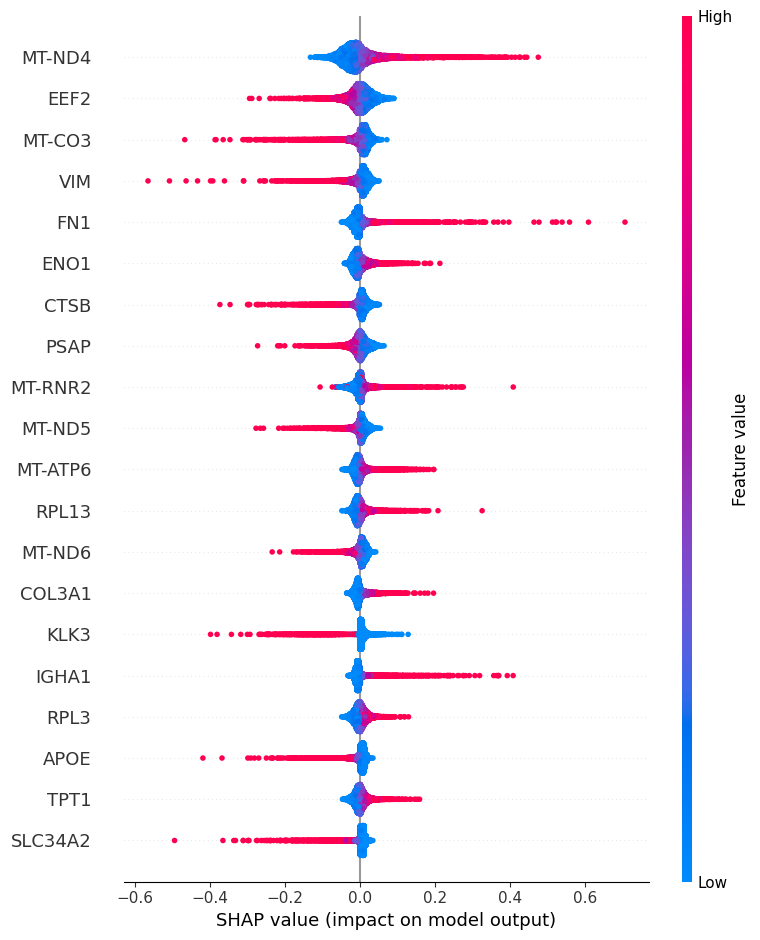

SHAP summary plot generated successfully.


In [27]:
import torch
import shap
from tqdm import tqdm
import numpy as np

# Supongamos que la época 10 es la que te interesa (indexada como 9 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 10
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Convertir los datos de miRNAs a un tensor, pero solo las primeras 100 muestras
X = df.iloc[:, :-2].values  # Usando las primeras 100 filas y todas las columnas excepto las dos últimas
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)

# Asegúrate de que el modelo esté en modo de evaluación
model.eval()

# Crear un modelo combinado que incluya tanto el FeatureExtractor como el LabelPredictor
class CombinedModel(torch.nn.Module):
    def __init__(self, feature_extractor, label_predictor):
        super(CombinedModel, self).__init__()
        self.feature_extractor = feature_extractor
        self.label_predictor = label_predictor

    def forward(self, x):
        features = self.feature_extractor(x)
        output = self.label_predictor(features)
        return output

combined_model = CombinedModel(model.feature_extractor, model.label_predictor)

# Crear un objeto SHAP explainer utilizando GradientExplainer con el modelo combinado
explainer = shap.GradientExplainer(combined_model, X_tensor)

# Calcular los valores SHAP para la salida del LabelPredictor directamente sobre X_tensor
shap_values = []
try:
    for i in tqdm(range(X_tensor.shape[0]), desc="Calculando valores SHAP"):
        shap_value = explainer.shap_values(X_tensor[i:i+1])
        shap_values.append(shap_value)
        print(f"SHAP values for instance {i}: {shap_value}")

    # Convertir la lista de valores SHAP a un numpy array
    shap_values_np = np.vstack(shap_values).squeeze()  # Eliminar la tercera dimensión
    print("Final SHAP values numpy array (shape):", shap_values_np.shape)

    # Usar los nombres de características originales
    feature_names_original = df.iloc[:, :-2].columns

    # Visualización de los valores SHAP para las características originales
    print("Generating SHAP summary plot...")
    shap.summary_plot(shap_values_np, X, feature_names=feature_names_original)
    print("SHAP summary plot generated successfully.")

except Exception as e:
    print(f"An error occurred: {e}")
    print(f"SHAP values calculated so far: {shap_values}")


In [28]:
shap_values_np.shape

(10286, 39979)

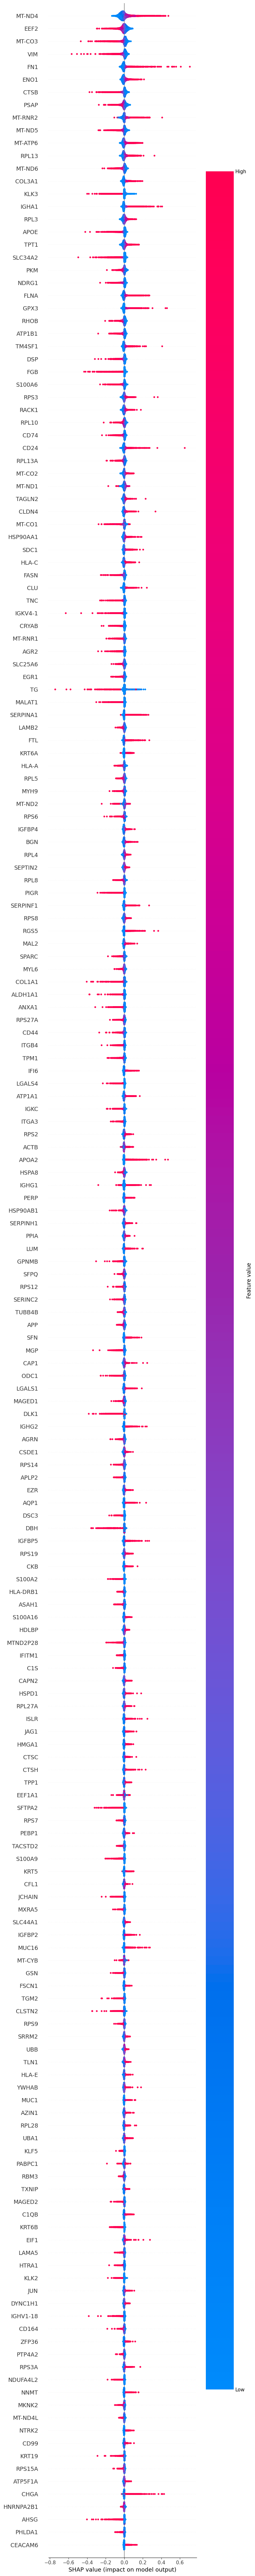

In [32]:
shap.summary_plot(shap_values_np, X, feature_names=feature_names_original, max_display=200)

Fold 1/10
AUC for fold 1: 0.9109
Fold 2/10
AUC for fold 2: 0.9068
Fold 3/10
AUC for fold 3: 0.8944
Fold 4/10
AUC for fold 4: 0.9065
Fold 5/10
AUC for fold 5: 0.9083
Fold 6/10
AUC for fold 6: 0.9095
Fold 7/10
AUC for fold 7: 0.9061
Fold 8/10
AUC for fold 8: 0.9020
Fold 9/10
AUC for fold 9: 0.9091
Fold 10/10
AUC for fold 10: 0.9161


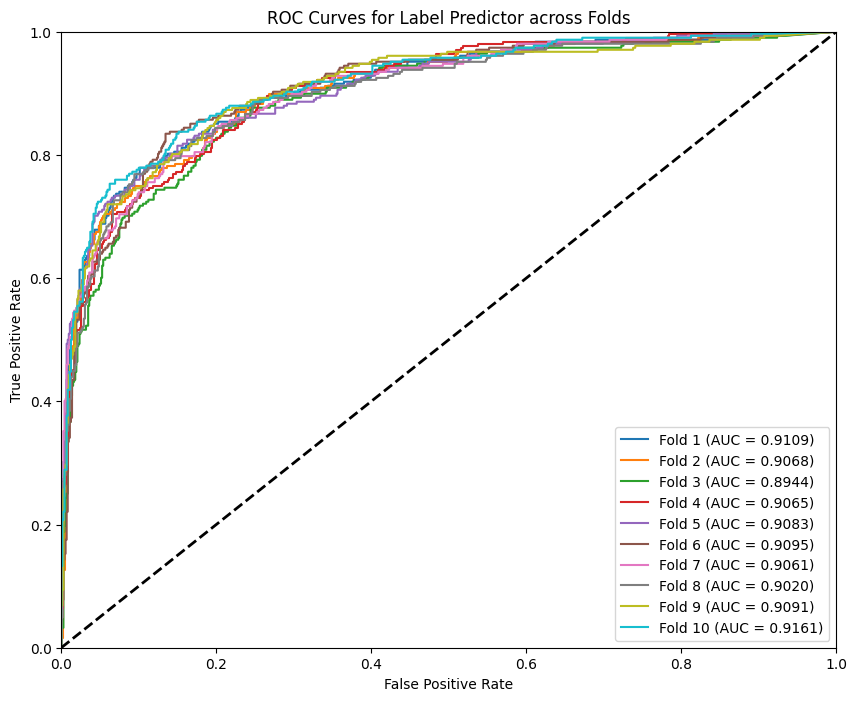

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)
from sklearn.model_selection import train_test_split


# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Definir el número de pliegues
n_splits = 10  # Número de pliegues para la validación cruzada
skf = StratifiedKFold(n_splits=n_splits)

# Listas para almacenar resultados de AUC
auc_scores = []
fpr_list = []
tpr_list = []

# Validación cruzada estratificada
for fold, (train_index, test_index) in enumerate(skf.split(X, Y)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # Convertir a tensores
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32).unsqueeze(1).to(device)

    # Evaluar el modelo en el conjunto de prueba
    model.eval()
    with torch.no_grad():
        label_preds, _, _ = model(X_test_tensor)
        label_preds = label_preds.cpu().numpy()
        Y_test = Y_test_tensor.cpu().numpy()

    # Calcular el AUC
    auc_score = roc_auc_score(Y_test, label_preds)
    auc_scores.append(auc_score)

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(Y_test, label_preds)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

    print(f"AUC for fold {fold + 1}: {auc_score:.4f}")

# Promediar y graficar las curvas ROC
plt.figure(figsize=(10, 8))
for i in range(n_splits):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Fold {i+1} (AUC = {auc_scores[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Label Predictor across Folds')
plt.legend(loc="lower right")
plt.show()


In [ ]:
X_tensor.shape

**Analysis of the Model Outputs:**

The result you obtained confirms that the wrapper (`ModelWrapper`) is functioning correctly to return only the first output of the model, which corresponds to the vital status prediction. Below is the analysis of the results:

1. **Outputs of the model without the wrapper:**
   - **First output:** `tensor([[4.6149e-02], ... , [6.9630e-02]], device='cuda:0')` with dimension `[10286, 1]` corresponds to the vital status prediction (`LabelPredictor`).
   - **Second output:** `tensor([[-0.2760,  0.1515, ...]], device='cuda:0')` with dimension `[10286, 33]` corresponds to the domain prediction (`DomainClassifier`).
   - **Third output:** `tensor([[ 2.3175e-01, ...]], device='cuda:0')` with dimension `[10286, 5000]` corresponds to some intermediate representation or features from the feature extractor (`FeatureExtractor`).

2. **Output of the model with the wrapper:**
   - **Output:** `tensor([[4.6149e-02], ... , [6.9630e-02]], device='cuda:0')` with dimension `[10286, 1]` corresponds to the first output of the model, which is the vital status prediction, as expected.

**Conclusion:**

The wrapper `ModelWrapper` is functioning as intended, returning only the first output of the full model, which is the vital status prediction. This is confirmed by comparing the dimensions:

- **Dimensions of all outputs:**
  - **First output:** `[10286, 1]`
  - **Second output:** `[10286, 33]`
  - **Third output:** `[10286, 5000]`

- **Dimension of the wrapped output:**
  - `[10286, 1]`

The dimension `[10286, 1]` of the wrapped output matches the dimension of the vital status prediction, confirming that the wrapper is correctly returning the first output.

This behavior ensures that when you calculate SHAP values using the wrapper, you are calculating SHAP values with respect to the vital status prediction (and not the other outputs of the model). This is exactly what you need to analyze how the input features influence the vital status prediction in your DANN model.




In [ ]:
asdasdasdasdasdasd

In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)
print(X_tensor.shape)

# Supongamos que la época 10 es la que te interesa (indexada como 9 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Obtener la salida del modelo
output = model(X_tensor)

# Si el modelo devuelve una tupla, selecciona la primera salida
if isinstance(output, tuple):
    output = output[0]

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(model, X_tensor)
shap_values = explainer.shap_values(X_tensor)
print(shap_values.shape)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
import torch
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Paso 1: Crear un objeto DeepExplainer para el modelo
explainer = shap.DeepExplainer(model.label_predictor, X_tensor)

# Paso 2: Calcular los valores SHAP utilizando el tensor de entrada X_tensor
shap_values = explainer.shap_values(X_tensor)

# Paso 3: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Verifica las dimensiones de shap_values para asegurarte de que coincide con lo esperado
print("Dimensión de shap_values:", shap_values_np.shape)

# Paso 4: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
import torch
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Verificar las salidas del modelo sin el wrapper
with torch.no_grad():
    all_outputs = model(X_tensor)
    print("Salidas del modelo (sin wrapper):", all_outputs)
    print("Dimensiones de todas las salidas:", [output.shape for output in all_outputs])

# Crear una clase wrapper para el modelo
# Esta clase `ModelWrapper` envuelve el modelo completo, pero en la función `forward`
# devuelve solo la primera salida del modelo (que corresponde a la predicción del estado vital).
class ModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)[0]  # Retornar solo la primera salida (la predicción de la etiqueta de vitalidad)

# Instanciar la clase wrapper
wrapped_model = ModelWrapper(model)

# Verificar la salida del modelo con el wrapper
with torch.no_grad():
    wrapped_output = wrapped_model(X_tensor)
    print("Salida del modelo (con wrapper):", wrapped_output)
    print("Dimensión de la salida envuelta:", wrapped_output.shape)

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.DeepExplainer(wrapped_model, X_tensor)
shap_values = explainer.shap_values(X_tensor)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Verifica las dimensiones de shap_values para asegurarte de que coincide con lo esperado
print("Dimensión de shap_values:", shap_values_np.shape)

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)



In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)

In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Crear una clase wrapper para el modelo
class ModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)[0]  # Retornar solo la primera salida

# Instanciar la clase wrapper
wrapped_model = ModelWrapper(model)

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(wrapped_model, X_tensor,batch_size = 150)
shap_values = explainer.shap_values(X_tensor)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
sdasdasdasdasdasdasdasd

In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Crear una clase wrapper para el modelo
class ModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)[0]  # Retornar solo la primera salida

# Instanciar la clase wrapper
wrapped_model = ModelWrapper(model)

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(wrapped_model, X_tensor)
shap_values = explainer.shap_values(X_tensor)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
import torch

# Asumiendo que el modelo DANN ya ha sido definido y entrenado

# Instanciar y cargar el modelo como se hace en el código original
input_dim = X.shape[1]
num_domains = len(label_encoder_panel.classes_)
model = DANN(input_dim, num_domains).to(device)

# Cargar el modelo guardado al final de una época en particular
epoch_of_interest = 9  # Ejemplo, puedes ajustar la época de interés
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
model.load_state_dict(model_state_dict)

# Asegurarse de que el modelo esté en modo de evaluación
model.eval()

# Crear una clase wrapper para obtener solo la salida del LabelPredictor
class LabelPredictorWrapper(torch.nn.Module):
    def __init__(self, model):
        super(LabelPredictorWrapper, self).__init__()
        self.label_predictor = model.label_predictor

    def forward(self, x):
        return self.label_predictor(x)

# Instanciar el wrapper
label_predictor_model = LabelPredictorWrapper(model)

# Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(label_predictor_model, X_tensor)
shap_values = explainer.shap_values(X_tensor)

# Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Visualización de SHAP
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:

# Paso 2: Usar GradientExplainer para calcular los valores SHAP
explainer = shap.GradientExplainer(label_predictor_model,X)
shap_values = explainer.shap_values(X)

# Paso 3: Convertir los tensores de entrada y los valores SHAP a numpy para visualización
features_np = X.cpu().numpy()
shap_values_np = np.array(shap_values).squeeze()

# Paso 4: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, features_np, feature_names=df.iloc[:, :-2].columns)

In [ ]:
features_np.shape

In [ ]:
len(df.iloc[:, :-2].columns)

In [ ]:
shap.summary_plot(shap_values_np, features_np, feature_names=df.iloc[:, :-2].columns,max_display=50 )


In [ ]:
shap_values_np.shape

In [ ]:

pd.DataFrame(shap_values_np, columns=df.iloc[:, :-2].columns,index=df.index)